In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# '수주일자'와 '품목종류'로 필터링하여 2022년도 '소스류' 데이터를 선택합니다.
df_2022_sauce = df_booking[(df_booking['수주일자'].dt.year == 2022) & (df_booking['품목종류'] == '소스류')]

# 일자별 '수량' 합계를 계산합니다.
daily_quantity_2022_sauce = df_2022_sauce.groupby('수주일자')['수량'].sum()
ts_quantity_2022_sauce = daily_quantity_2022_sauce.asfreq('D').fillna(0)

# Auto ARIMA 모델로 시계열 분석을 수행합니다.
auto_model_2022_sauce = auto_arima(ts_quantity_2022_sauce, seasonal=True, m=7, stepwise=True,
                                   suppress_warnings=True, error_action="ignore", max_order=None, trace=True)

# 학습된 모델 요약 정보 출력
print(auto_model_2022_sauce.summary())

# 결과를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(ts_quantity_2022_sauce.index, ts_quantity_2022_sauce, label='Actual 2022 Sauce Quantity')

# 예측을 위한 미래 데이터 프레임을 생성합니다.
forecast_steps_sauce = 80  # 다음 달까지의 예측을 가정합니다.
forecast_index_sauce = pd.date_range(start=ts_quantity_2022_sauce.index[-1] + pd.Timedelta(days=1), periods=forecast_steps_sauce, freq='D')

# 미래 값에 대한 예측을 수행합니다.
forecast_quantity_2022_sauce = auto_model_2022_sauce.predict(n_periods=forecast_steps_sauce)

# 결과를 시각화합니다.
# plt.figure(figsize=(10, 6))
# plt.plot(ts_quantity_2022_sauce.index, ts_quantity_2022_sauce, label='Actual 2022 Sauce Quantity')
plt.plot(forecast_index_sauce, forecast_quantity_2022_sauce, color='red', label='Forecast')
plt.title('Auto ARIMA Model - 2022 Daily Sauce Quantity Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 그래프 생성
plt.figure(figsize=(12, 6))

# 2022년 예측 데이터 표시
plt.plot(forecast_index_sauce, forecast_quantity_2022_sauce, color='red', label='Forecast 2022 Sauce Quantity')

# 2022년부터 2023년 3월까지 실제 데이터 표시
plt.plot(ts_quantity_2022_2023_sauce.index, ts_quantity_2022_2023_sauce, label='Actual 2022-2023 Sauce Quantity', color='blue')

# 그래프 제목 및 레이블 설정
plt.title('Comparison of Forecasted and Actual Sauce Quantity (2022 and Jan-Mar 2023)')
plt.xlabel('Date')
plt.ylabel('Quantity')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


In [ ]:
# 프로펫

In [ ]:
from prophet import Prophet

# Prophet 모델을 위해 데이터 프레임을 준비합니다.
df_prophet = pd.DataFrame({
    'ds': ts_quantity_2022_sauce.index,
    'y': ts_quantity_2022_sauce.values
})

# Prophet 모델을 초기화하고, 주간 계절성을 활성화합니다.
model = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)
model.fit(df_prophet)

# 미래 예측을 위한 데이터 프레임을 생성합니다 (2023년 1월 1일부터 3월 31일까지).
future_dates = model.make_future_dataframe(periods=90, freq='D', include_history=False)
future_dates = future_dates[future_dates['ds'] >= '2023-01-01']

# 미래 값에 대한 예측을 수행합니다.
forecast = model.predict(future_dates)

# 예측 결과를 시각화합니다.
fig = model.plot(forecast)
plt.title('Prophet Model - Forecasting 2023 Sauce Quantity with Weekly Seasonality')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()


In [ ]:
# 일자별 '수량' 합계를 계산합니다.
# '수주일자'와 '품목종류'로 필터링하여 2022년부터 2023년 3월까지 '소스류' 데이터를 선택합니다.
df_2022_2023_sauce = df_booking[((df_booking['수주일자'].dt.year == 2022) | 
                                 ((df_booking['수주일자'].dt.year == 2023) & 
                                  (df_booking['수주일자'].dt.month <= 3))) & 
                                (df_booking['품목종류'] == '소스류')]

daily_quantity_2022_2023_sauce = df_2022_2023_sauce.groupby('수주일자')['수량'].sum()
ts_quantity_2022_2023_sauce = daily_quantity_2022_2023_sauce.asfreq('D').fillna(0)


import matplotlib.pyplot as plt

# 실제 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(ts_quantity_2022_2023_sauce.index, ts_quantity_2022_2023_sauce, label='Actual 2022-2023 Sauce Quantity', color='blue')

# Prophet 모델에 의해 예측된 데이터 추가
# 2023년 1월 1일부터 3월 31일까지의 예측 결과만 플롯합니다.
forecast_filtered = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-03-31')]
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label='Forecasted 2023 Sauce Quantity', color='red')

# 그래프 제목 및 레이블 설정
plt.title('Comparison of Actual and Forecasted Sauce Quantity (2022 and Jan-Mar 2023)')
plt.xlabel('Date')
plt.ylabel('Quantity')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 2023년 데이터만 필터링
actual_2023 = ts_quantity_2022_2023_sauce['2023']

# 실제 데이터 시각화 (2023년만)
plt.figure(figsize=(10, 6))
plt.plot(actual_2023.index, actual_2023, label='Actual 2023 Sauce Quantity', color='blue')

# Prophet 모델 예측 결과 필터링 (2023년 1월 1일부터 3월 31일까지)
forecast_filtered = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-03-31')]

# 예측 데이터 시각화
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label='Forecasted 2023 Sauce Quantity', color='red')

# 그래프 제목 및 레이블 설정
plt.title('Actual and Forecasted Sauce Quantity for 2023')
plt.xlabel('Date')
plt.ylabel('Quantity')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
import graphviz

In [2]:
import matplotlib.font_manager as fm
# 그래프 표시
%matplotlib inline
# 한글 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 이름 얻어오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rcParams['font.family'] = font_name
matplotlib.rc('axes', unicode_minus = False)

# Product Name

In [3]:
df_product = pd.read_csv("/home/piai/간편식 생산성/A1_간편식/Product_Name.csv", encoding = "cp949", usecols=lambda column: not column.startswith('Unnamed')) 

df_product.head()

,품목코드,품목명
0,NaN,NaN
1,1.#JE+00,가쓰오다시국물900ml
2,11501122,조미액-갈릭라이스3kg
3,11501131,조미유-쉐프솔루션베이스볶음밥(시즌)
4,11501133,조미액-소불고기볶음밥-JB/이랜드


In [4]:
# df_product 데이터프레임에서 '품목코드'열과 '품목명'열에 결측치가 있는 행을 제거
df_product.dropna(subset=['품목코드', '품목명'], inplace=True)
df_product.isnull().sum()

품목코드    0
품목명     0
dtype: int64

# Booking

In [3]:
df_booking = pd.read_csv("/home/piai/바탕화면/저닌/4주차/A1_간편식/Booking_data.csv", encoding = "euc_kr", usecols=lambda column: not column.startswith('Unnamed')) 

df_booking.head()

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,수주단가,수주금액,부가세금액,출하완료여부,납기일자,생산지시
0,60.0,2021-10-03,115,SI0107,1BA03255,1450.0,237273.0,23727,Y,2021-10-04,N
1,60.0,2021-10-03,116,SI0107,16A02023,3550.0,161364.0,16136,Y,2021-10-06,N
2,60.0,2021-10-03,117,IJ9449,13K02080,7040.0,153600.0,15360,Y,2021-10-04,N
3,60.0,2021-10-03,118,IJ9449,13R01080,8800.0,144000.0,14400,Y,2021-10-04,N
4,60.0,2021-10-03,121,SI0125,13D02212,7480.0,81600.0,8160,Y,2021-10-04,N


In [4]:
df_booking.describe(include='all')

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,수주단가,수주금액,부가세금액,출하완료여부,납기일자,생산지시
count,758505.000000,758508,758508.000000,758492,758483,7.585080e+05,7.585080e+05,7.585080e+05,758508,758508,689687
unique,NaN,1399,NaN,920,3059,NaN,NaN,NaN,2,1443,1
top,NaN,2021-12-31,NaN,IJ2772,16A01062,NaN,NaN,NaN,Y,2023-01-15,N
freq,NaN,2055,NaN,75109,17262,NaN,NaN,NaN,751922,956,689687
mean,28.088547,NaN,263.496305,NaN,NaN,3.541230e+03,6.001607e+05,5.658453e+04,NaN,NaN,NaN
std,16.276934,NaN,226.335569,NaN,NaN,1.286250e+04,2.910749e+06,2.753093e+05,NaN,NaN,NaN
min,1.000000,NaN,0.000000,NaN,NaN,-2.167000e+03,-3.876915e+07,-3.876915e+06,NaN,NaN,NaN
25%,20.000000,NaN,86.000000,NaN,NaN,1.310000e+03,3.800000e+04,3.600000e+03,NaN,NaN,NaN
50%,20.000000,NaN,202.000000,NaN,NaN,2.790000e+03,1.175880e+05,1.161850e+04,NaN,NaN,NaN
75%,20.000000,NaN,392.000000,NaN,NaN,4.400000e+03,3.600000e+05,3.565000e+04,NaN,NaN,NaN


In [5]:
df_booking.info()
# 수주사업장 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758508 entries, 0 to 758507
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   수주사업장   758505 non-null  float64
 1   수주일자    758508 non-null  object 
 2   수주일련번호  758508 non-null  int64  
 3   거래처코드   758492 non-null  object 
 4   수주품목코드  758483 non-null  object 
 5   수주단가    758508 non-null  float64
 6   수주금액    758508 non-null  float64
 7   부가세금액   758508 non-null  int64  
 8   출하완료여부  758508 non-null  object 
 9   납기일자    758508 non-null  object 
 10  생산지시    689687 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 63.7+ MB


In [6]:
#결측치 확인

df_booking.isnull().sum()

수주사업장         3
수주일자          0
수주일련번호        0
거래처코드        16
수주품목코드       25
수주단가          0
수주금액          0
부가세금액         0
출하완료여부        0
납기일자          0
생산지시      68821
dtype: int64

### 결측치 제거

In [7]:
# df_product 데이터프레임에서 '품목코드'열과 '품목명'열에 결측치가 있는 행을 제거
df_booking.dropna(subset=['수주사업장','거래처코드', '수주품목코드'], inplace=True)
df_booking.isnull().sum()

수주사업장         0
수주일자          0
수주일련번호        0
거래처코드         0
수주품목코드        0
수주단가          0
수주금액          0
부가세금액         0
출하완료여부        0
납기일자          0
생산지시      68781
dtype: int64

In [8]:
# 생산지시 결측치 채우기
df_booking['생산지시'].fillna("Y")

0         N
1         N
2         N
3         N
4         N
         ..
758503    N
758504    Y
758505    Y
758506    N
758507    N
Name: 생산지시, Length: 758464, dtype: object

In [9]:
# # '수주일자'를 날짜형으로 변환합니다.
# df_booking['수주일자'] = pd.to_datetime(df_booking['수주일자'])
# df_booking['납기일자'] = pd.to_datetime(df_booking['납기일자'])
# # (납기일자 - 수주일자)를 계산하여 새로운 열을 생성합니다.
# df_booking['납기일수'] = (df_booking['납기일자'] - df_booking['수주일자']).dt.days

# # 결과를 출력합니다.
# df_booking['납기일수'].head()

In [10]:
# print(df_booking.shape)
# df_booking.head()

In [11]:
# df_booking['생산지시'].fillna("Y")

In [12]:
# df_booking[df_booking['수주품목코드']== '23D02080']

### 파생변수 - 
납기일수, 수주일자, 그룹_수주품목코드, 수주단가 그룹화, 품목 그룹화, 연도\
수량은 이상치 제거에 있음

In [13]:
# '수주일자'를 날짜형으로 변환합니다.
df_booking['수주일자'] = pd.to_datetime(df_booking['수주일자'])
df_booking['납기일자'] = pd.to_datetime(df_booking['납기일자'])
# (납기일자 - 수주일자)를 계산하여 새로운 열을 생성합니다.
df_booking['납기일수'] = (df_booking['납기일자'] - df_booking['수주일자']).dt.days

# 결과를 출력합니다.
df_booking['납기일수'].head()

0    1
1    3
2    1
3    1
4    1
Name: 납기일수, dtype: int64

In [14]:
# '품목코드' 열의 앞 두글자만 따와서 그룹화
# '품목코드' 열의 앞 두글자를 추출하여 새로운 열을 만듭니다.
df_booking['그룹_수주품목코드'] = df_booking['수주품목코드'].str[:2]
df_booking.head()

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,수주단가,수주금액,부가세금액,출하완료여부,납기일자,생산지시,납기일수,그룹_수주품목코드
0,60.0,2021-10-03,115,SI0107,1BA03255,1450.0,237273.0,23727,Y,2021-10-04,N,1,1B
1,60.0,2021-10-03,116,SI0107,16A02023,3550.0,161364.0,16136,Y,2021-10-06,N,3,16
2,60.0,2021-10-03,117,IJ9449,13K02080,7040.0,153600.0,15360,Y,2021-10-04,N,1,13
3,60.0,2021-10-03,118,IJ9449,13R01080,8800.0,144000.0,14400,Y,2021-10-04,N,1,13
4,60.0,2021-10-03,121,SI0125,13D02212,7480.0,81600.0,8160,Y,2021-10-04,N,1,13


In [15]:
# 품목 그래프화
# 13-: 소스류, 14: 가루_믹스류, 16A: 샐러드류, 16B: 마요네즈류, 1BA: 쌀류, 1C3: 쌈장류(2개)

def classify_item(code):
    if code.startswith('13'):
        return '소스류'
    elif code.startswith('14'):
        return '가루_믹스류'
    elif code.startswith('16A'):
        return '샐러드류'
    elif code.startswith('16B'):
        return '마요네즈류'
    elif code.startswith('1BA'):
        return '쌀류'
    elif code.startswith('1C3'):
        return '쌈장류'
    else:
        return '기타'

# '품목종류' 열을 생성하고 classify_item 함수를 적용하여 분류합니다.
df_booking['품목종류'] = df_booking['수주품목코드'].apply(classify_item)

df_booking.head()

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,수주단가,수주금액,부가세금액,출하완료여부,납기일자,생산지시,납기일수,그룹_수주품목코드,품목종류
0,60.0,2021-10-03,115,SI0107,1BA03255,1450.0,237273.0,23727,Y,2021-10-04,N,1,1B,쌀류
1,60.0,2021-10-03,116,SI0107,16A02023,3550.0,161364.0,16136,Y,2021-10-06,N,3,16,샐러드류
2,60.0,2021-10-03,117,IJ9449,13K02080,7040.0,153600.0,15360,Y,2021-10-04,N,1,13,소스류
3,60.0,2021-10-03,118,IJ9449,13R01080,8800.0,144000.0,14400,Y,2021-10-04,N,1,13,소스류
4,60.0,2021-10-03,121,SI0125,13D02212,7480.0,81600.0,8160,Y,2021-10-04,N,1,13,소스류


In [16]:
# 납기일수를 사용자 정의 구간으로 분류하는 함수
def categorize_delivery_days(x):
    if x == 0:
        return '0일'
    elif x <= 4:
        return '4일 이하'
    elif x <= 7:
        return '7일 이하'
    elif x <= 14:
        return '2주 이하'
    elif x <= 30:
        return '한달 이하'
    elif x <= 60:
        return '두달 이하'
    elif x <= 100:
        return '300일 이하'
    else:
        return '301일 이상'

# 납기일수 구간화 적용
df_booking['납기일수_구간'] = df_booking['납기일수'].apply(categorize_delivery_days)

In [17]:
df_booking['수량'] = (df_booking['수주금액']+df_booking['부가세금액'])/df_booking['수주단가']

In [18]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758464 entries, 0 to 758507
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   수주사업장      758464 non-null  float64       
 1   수주일자       758464 non-null  datetime64[ns]
 2   수주일련번호     758464 non-null  int64         
 3   거래처코드      758464 non-null  object        
 4   수주품목코드     758464 non-null  object        
 5   수주단가       758464 non-null  float64       
 6   수주금액       758464 non-null  float64       
 7   부가세금액      758464 non-null  int64         
 8   출하완료여부     758464 non-null  object        
 9   납기일자       758464 non-null  datetime64[ns]
 10  생산지시       689683 non-null  object        
 11  납기일수       758464 non-null  int64         
 12  그룹_수주품목코드  758464 non-null  object        
 13  품목종류       758464 non-null  object        
 14  납기일수_구간    758464 non-null  object        
 15  수량         730409 non-null  float64       
dtypes: datetime64[ns](2)

In [19]:
df_booking.head()

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,수주단가,수주금액,부가세금액,출하완료여부,납기일자,생산지시,납기일수,그룹_수주품목코드,품목종류,납기일수_구간,수량
0,60.0,2021-10-03,115,SI0107,1BA03255,1450.0,237273.0,23727,Y,2021-10-04,N,1,1B,쌀류,4일 이하,180.0
1,60.0,2021-10-03,116,SI0107,16A02023,3550.0,161364.0,16136,Y,2021-10-06,N,3,16,샐러드류,4일 이하,50.0
2,60.0,2021-10-03,117,IJ9449,13K02080,7040.0,153600.0,15360,Y,2021-10-04,N,1,13,소스류,4일 이하,24.0
3,60.0,2021-10-03,118,IJ9449,13R01080,8800.0,144000.0,14400,Y,2021-10-04,N,1,13,소스류,4일 이하,18.0
4,60.0,2021-10-03,121,SI0125,13D02212,7480.0,81600.0,8160,Y,2021-10-04,N,1,13,소스류,4일 이하,12.0


### 이상치 제거

In [20]:
df_booking[df_booking['수주금액'] <= 0]

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,수주단가,수주금액,부가세금액,출하완료여부,납기일자,생산지시,납기일수,그룹_수주품목코드,품목종류,납기일수_구간,수량
14,60.0,2021-10-03,133,SI0275,18A03051,0.0,0.0,0,Y,2021-10-05,N,2,18,기타,4일 이하,NaN
15,20.0,2021-10-03,243,KK2123,13A00622,0.0,0.0,0,Y,2021-10-10,NaN,7,13,소스류,7일 이하,NaN
19,20.0,2021-10-03,247,IO507,13G02079,0.0,0.0,0,N,2021-10-05,NaN,2,13,소스류,4일 이하,NaN
20,20.0,2021-10-03,248,IO507,13A00896,0.0,0.0,0,N,2021-10-06,NaN,3,13,소스류,4일 이하,NaN
89,20.0,2021-10-03,301,IJ9455,18A03051,0.0,0.0,0,Y,2021-10-06,N,3,18,기타,4일 이하,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758423,20.0,2023-03-17,372,IJ2766,16A01063,0.0,0.0,0,N,2023-03-18,N,1,16,샐러드류,4일 이하,NaN
758424,20.0,2023-03-17,373,IJ2766,16A02038,0.0,0.0,0,N,2023-03-20,N,3,16,샐러드류,4일 이하,NaN
758450,60.0,2023-03-16,226,SI327,1BA03594,0.0,0.0,0,Y,2023-03-17,N,1,1B,쌀류,4일 이하,NaN
758451,20.0,2023-03-17,356,ZA1646,1BA03600,0.0,0.0,0,N,2023-03-19,NaN,2,1B,쌀류,4일 이하,NaN


In [21]:
# 수주금액 0이하 제거- 약 3만개
df_booking = df_booking.drop(df_booking[df_booking['수주금액'] <= 0].index)
df_booking = df_booking.drop(df_booking[df_booking['수주단가'] <= 0].index)

# 부가세금액 0이하 제거- 약 3만개
df_booking = df_booking.drop(df_booking[df_booking['부가세금액'] <0].index) 

# 수주금액 이상치 제거, 4개
df_booking = df_booking[df_booking['수주금액'] <= 400000000]

# 수주금액 이상치 제거, 4개
df_booking = df_booking[df_booking['수주단가'] <= 200000]

# 수주단가 0이하 제거- 약 3만개
df_booking = df_booking.drop(df_booking[df_booking['수주단가'] <=0].index)

# 수주단가 20만원 이상 제거- 59개, 너무 비싸고 product_Name에 수주품목코드 같은거 없어서 지웠음
df_booking = df_booking.drop(df_booking[df_booking['수주단가'] >=200000].index)
df_booking['수량'] = (df_booking['수주금액']+df_booking['부가세금액'])/df_booking['수주단가']
df_booking.head()

# 수주금액 이상치 제거, 4개
df_booking = df_booking[df_booking['납기일수'] >= 0]

# '출하여부'가 'N'이고 납기일자가 결측값이 아닌 행을 필터링하여 개수를 세기
count_non_na_delivery_date = df_booking[(df_booking['출하완료여부'] == 'N') & (~df_booking['납기일자'].isna())].shape[0]
print("납기일자가 결측값이 아닌 행의 개수:", count_non_na_delivery_date)

납기일자가 결측값이 아닌 행의 개수: 4697


In [22]:
# '연도' 열을 추가하여 연도 데이터를 저장
df_booking['연도'] = df_booking['수주일자'].dt.year

In [23]:
# '연도'와 '분기' 열을 추가하여 연도와 분기 데이터를 저장
df_booking['연도'] = df_booking['수주일자'].dt.year
df_booking['분기'] = df_booking['수주일자'].dt.quarter

# EDA

### 연도별 매출액 확인

In [26]:
df_booking['매출액'] = df_booking['수주금액']+ df_booking['부가세금액']

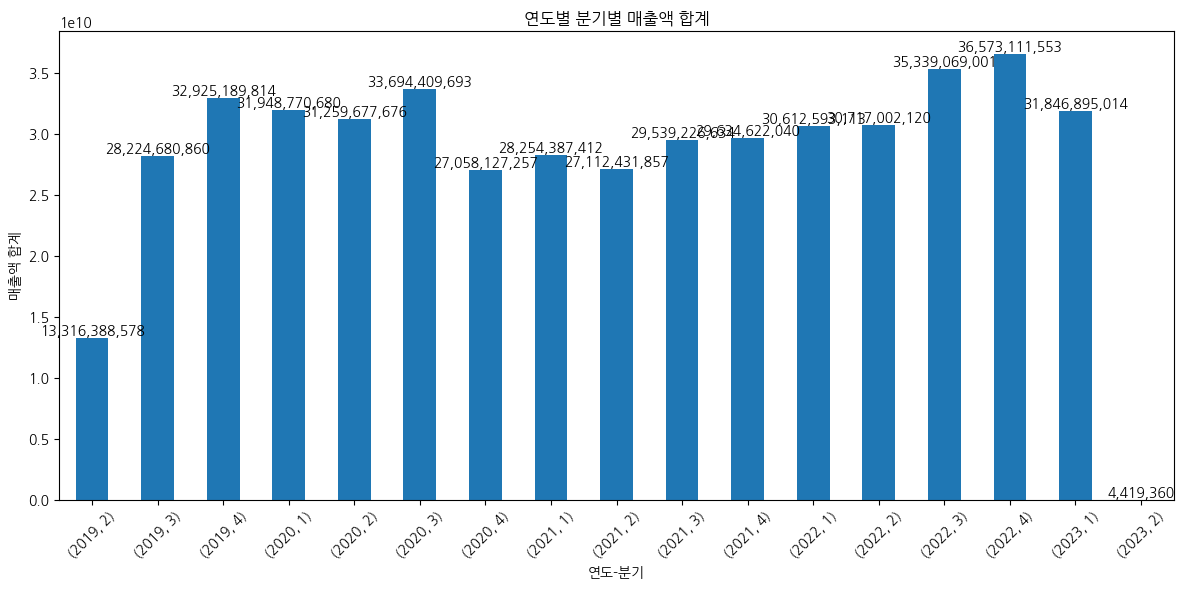

In [27]:


# 연도와 분기별 매출액의 합 계산
sales_by_year_quarter = df_booking.groupby(['연도', '분기'])['매출액'].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))
sales_by_year_quarter.plot(kind='bar')

# 그래프 제목과 축 레이블 설정
plt.title('연도별 분기별 매출액 합계')
plt.xlabel('연도-분기')
plt.ylabel('매출액 합계')

# 각 막대 위에 매출액 표시
for index, value in enumerate(sales_by_year_quarter):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

# 그래프 보여주기
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
### 납기일수별 빈도수

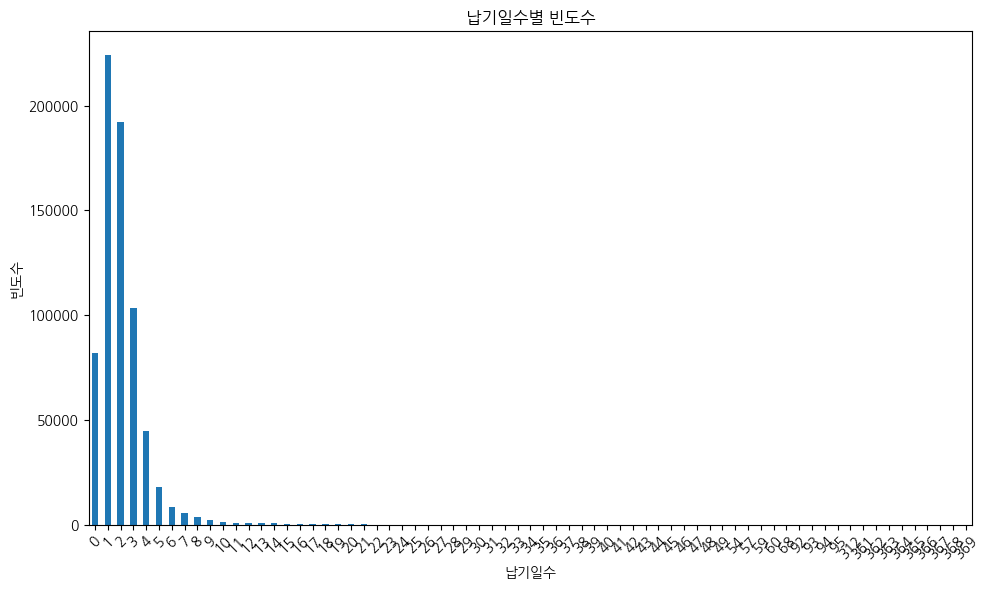

In [29]:

# '납기일자'의 빈도수를 계산하고, 납기일자 순으로 정렬합니다.
date_counts = df_booking['납기일수'].value_counts().sort_index()

# 납기일자별 빈도수를 바 그래프로 표현합니다.
plt.figure(figsize=(10, 6))
date_counts.plot(kind='bar')
plt.title('납기일수별 빈도수')
plt.xlabel('납기일수')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.tight_layout()  # 레이아웃 조정
plt.show()


In [30]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691396 entries, 0 to 758507
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   수주사업장      691396 non-null  float64       
 1   수주일자       691396 non-null  datetime64[ns]
 2   수주일련번호     691396 non-null  int64         
 3   거래처코드      691396 non-null  object        
 4   수주품목코드     691396 non-null  object        
 5   수주단가       691396 non-null  float64       
 6   수주금액       691396 non-null  float64       
 7   부가세금액      691396 non-null  int64         
 8   출하완료여부     691396 non-null  object        
 9   납기일자       691396 non-null  datetime64[ns]
 10  생산지시       635506 non-null  object        
 11  납기일수       691396 non-null  int64         
 12  그룹_수주품목코드  691396 non-null  object        
 13  품목종류       691396 non-null  object        
 14  납기일수_구간    691396 non-null  object        
 15  수량         691396 non-null  float64       
 16  연도         691396 no

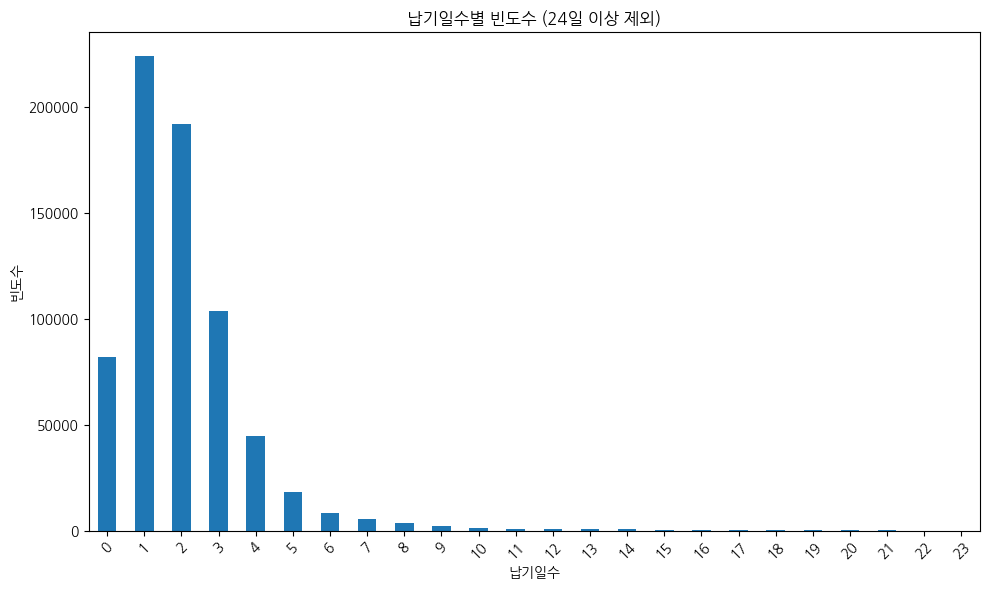

In [31]:
import matplotlib.pyplot as plt

# 납기일수가 23 이하인 데이터만 선택합니다.
date_counts_filtered = df_booking['납기일수'].value_counts().sort_index()
date_counts_filtered = date_counts_filtered[date_counts_filtered.index <= 23]

# 납기일수별(23 이하) 빈도수를 바 그래프로 표현합니다.
plt.figure(figsize=(10, 6))
date_counts_filtered.plot(kind='bar')
plt.title('납기일수별 빈도수 (24일 이상 제외)')
plt.xlabel('납기일수')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.tight_layout()  # 레이아웃 조정
plt.show()


In [32]:
df_booking['납기일수'].sort_values(ascending=False).head(10)

422386    369
422378    368
422377    368
422401    368
422376    367
422405    367
224073    367
422400    367
422402    367
422404    366
Name: 납기일수, dtype: int64

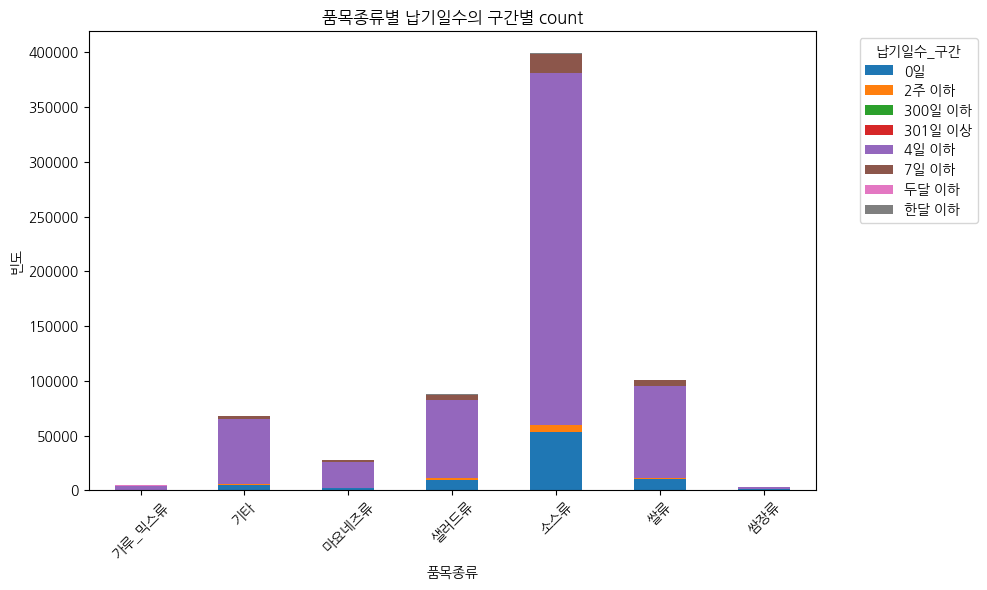

In [33]:
# # 납기일수를 사용자 정의 구간으로 분류하는 함수
# def categorize_delivery_days(x):
#     if x == 0:
#         return '0일'
#     elif x <= 4:
#         return '1-4일'
#     elif x <= 7:
#         return '5-7일'
#     elif x <= 14:
#         return '8-14일'
#     elif x <= 30:
#         return '15-30일'
#     elif x <= 60:
#         return '31-60일'
#     elif x <= 100:
#         return '61-300일'
#     else:
#         return '301일 이상'

# # 납기일수 구간화 적용
# df_booking['납기일수_구간'] = df_booking['납기일수'].apply(categorize_delivery_days)

# '그룹_수주품목코드'별 '납기일수_구간' 빈도 계산
grouped = df_booking.groupby('품목종류')['납기일수_구간'].value_counts()

# 빈도를 바 그래프로 시각화
grouped.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))

# 그래프 제목과 축 레이블 설정
plt.title('품목종류별 납기일수의 구간별 count')
plt.xlabel('품목종류')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.legend(title='납기일수_구간', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 그래프 보여주기
plt.show()


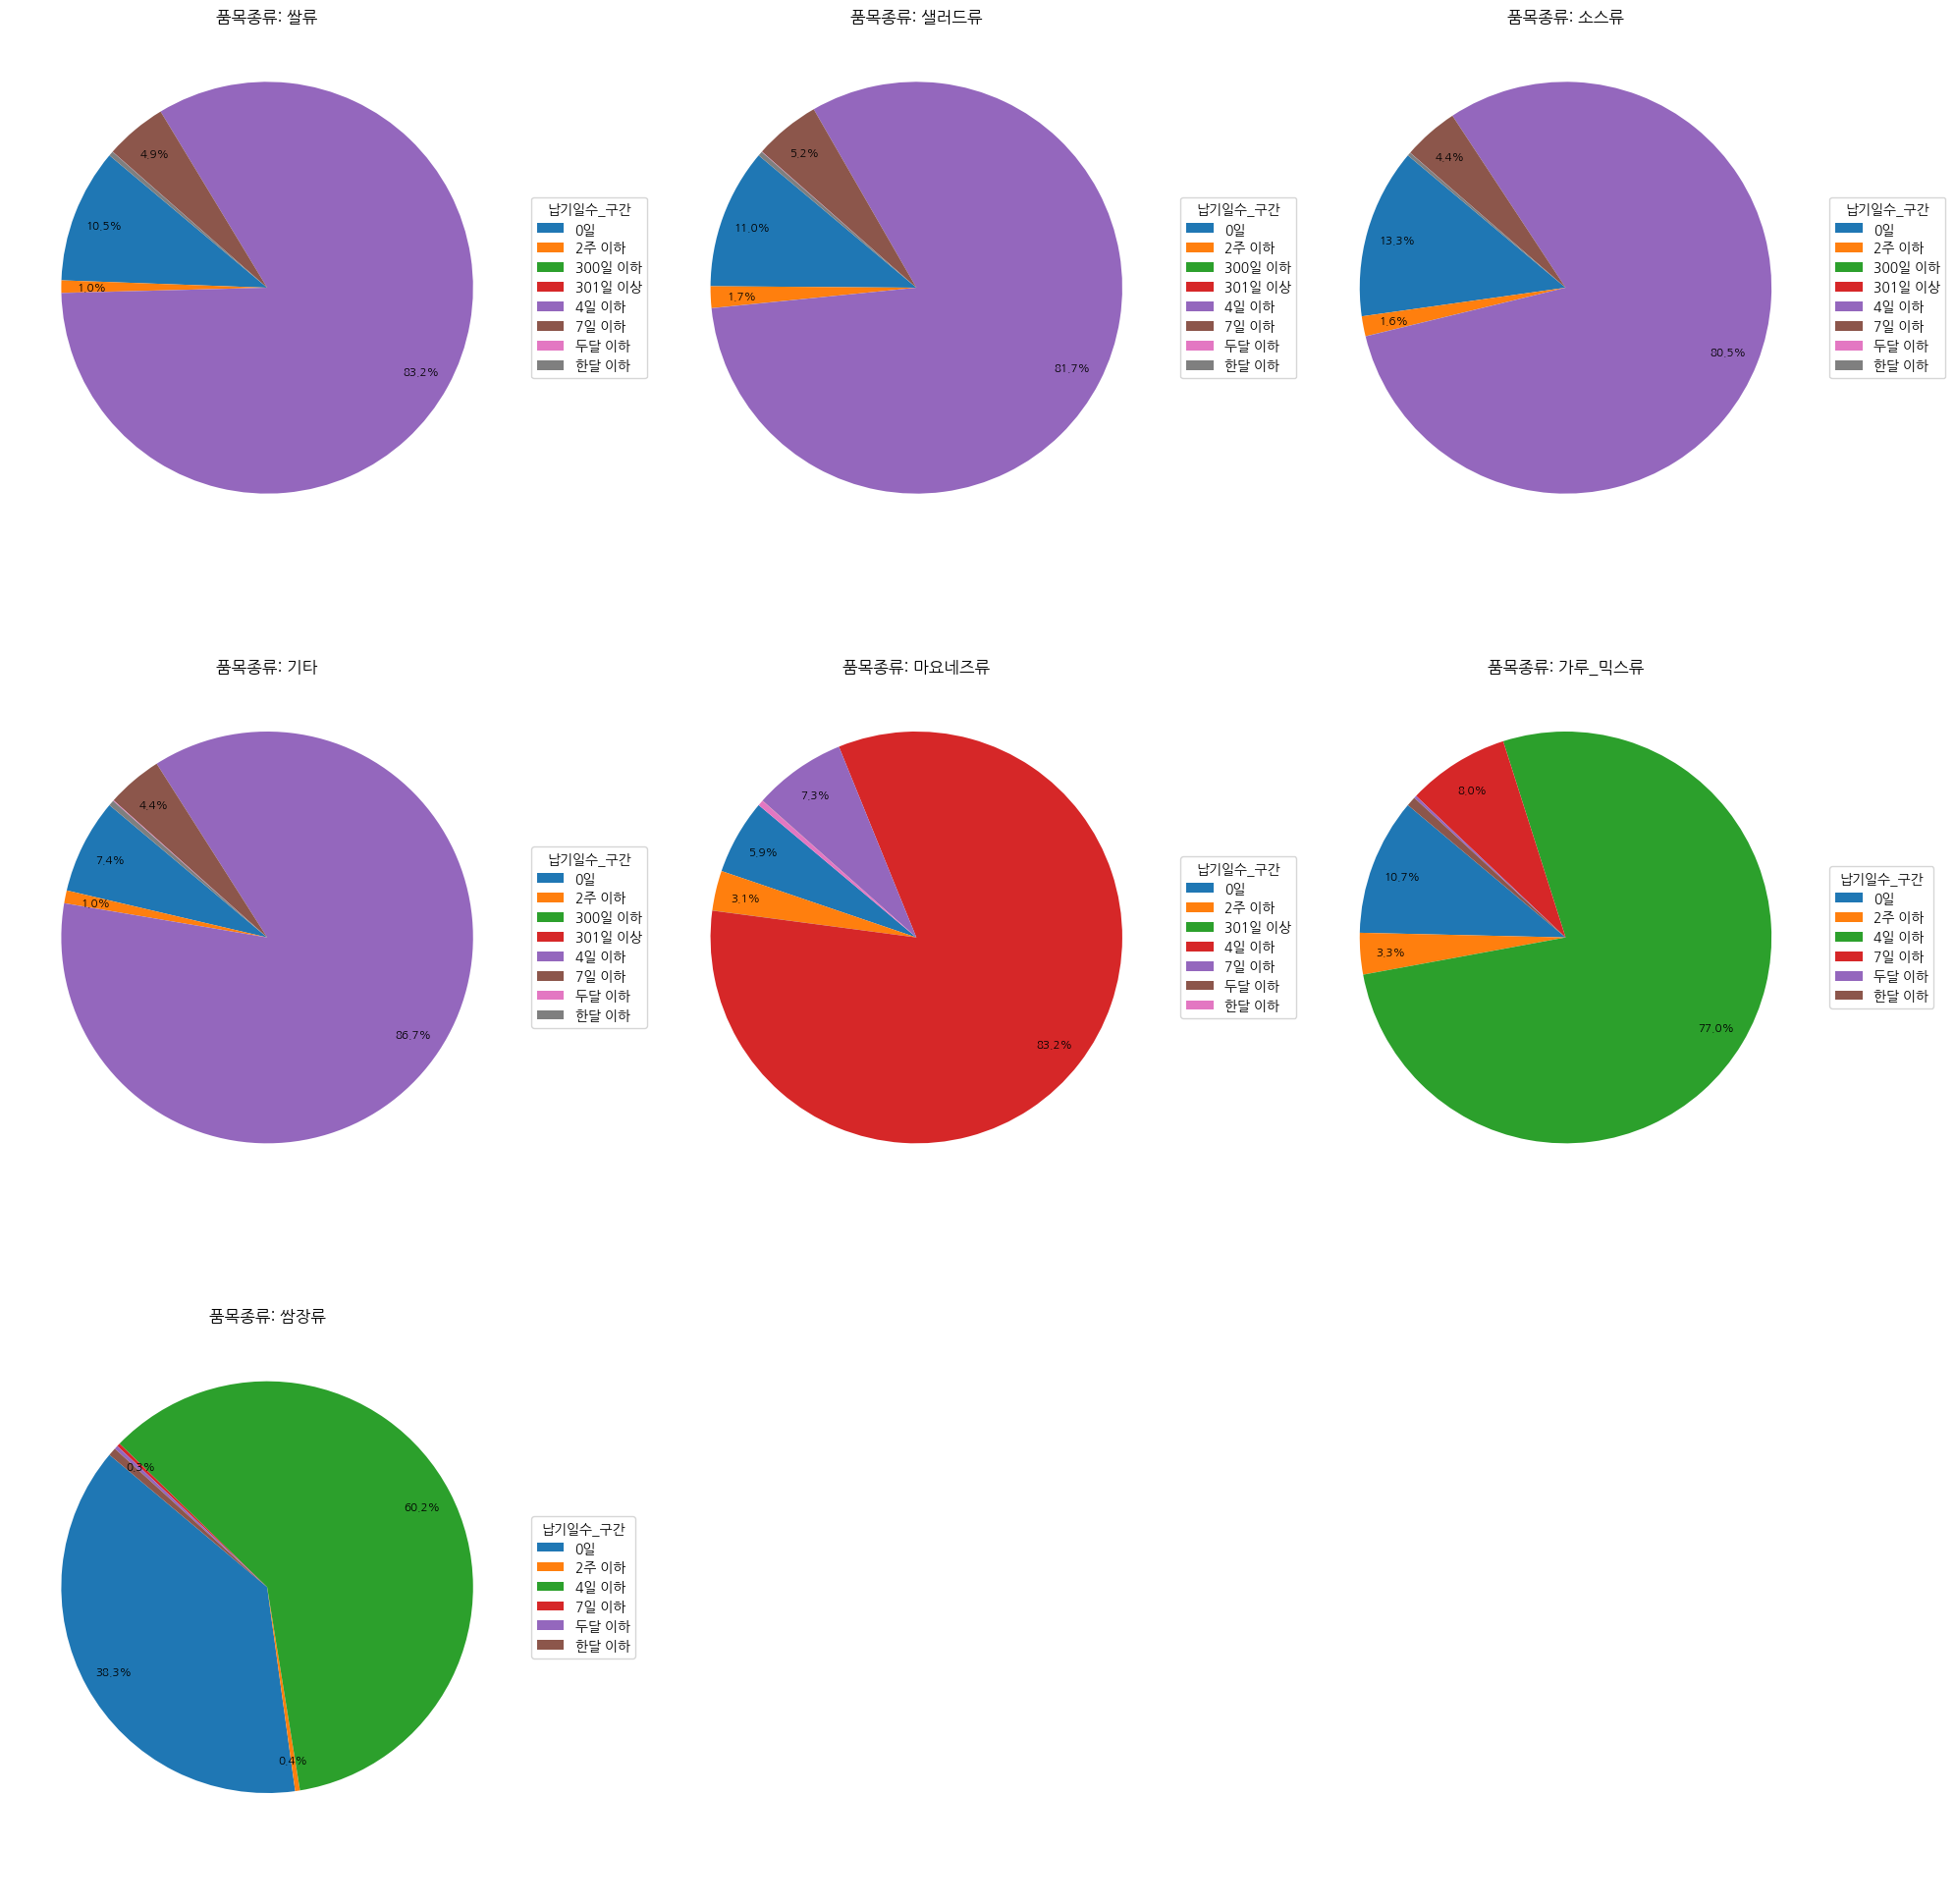

In [34]:
# 고유한 품목종류 리스트 생성
unique_item_types = df_booking['품목종류'].unique()

# 서브플롯 생성 (3행 3열, 7개의 그래프와 2개는 숨길 예정)
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

# 주어진 납기일수_구간에 대한 퍼센트를 표시하는 함수 정의
def autopct_generator(counts):
    def autopct(pct):
        total = sum(counts)
        val = int(round(pct*total/100.0))
        key_index = counts.index[val == counts.values]
        if key_index in ['0일', '4일 이하', '7일 이하', '2주 이하']:
            return "{:.1f}%".format(pct)
        else:
            return ''
    return autopct

# 각 품목종류별로 서브플롯에 원 그래프 그리기
for i, item_type in enumerate(unique_item_types[:7]):  # 첫 7개 품목종류만 사용
    ax = axs[i // 3, i % 3]  # 행과 열 위치 결정
    filtered_df = df_booking[df_booking['품목종류'] == item_type]
    counts = filtered_df['납기일수_구간'].value_counts().sort_index()
    
    # 원 그래프 그리기, 특정 구간에 대한 퍼센트만 표시
    wedges, texts, autotexts = ax.pie(counts, autopct=autopct_generator(counts), startangle=140, pctdistance=0.85)
    
    # 범례 추가
    ax.legend(wedges, counts.index, title="납기일수_구간", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    # 제목 설정
    ax.set_title(f'품목종류: {item_type}')

    # 퍼센트 스타일 조정
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_size('small')

# 나머지 빈 서브플롯 숨기기
for j in range(7, 9):
    axs[j // 3, j % 3].axis('off')

plt.tight_layout()
plt.show()


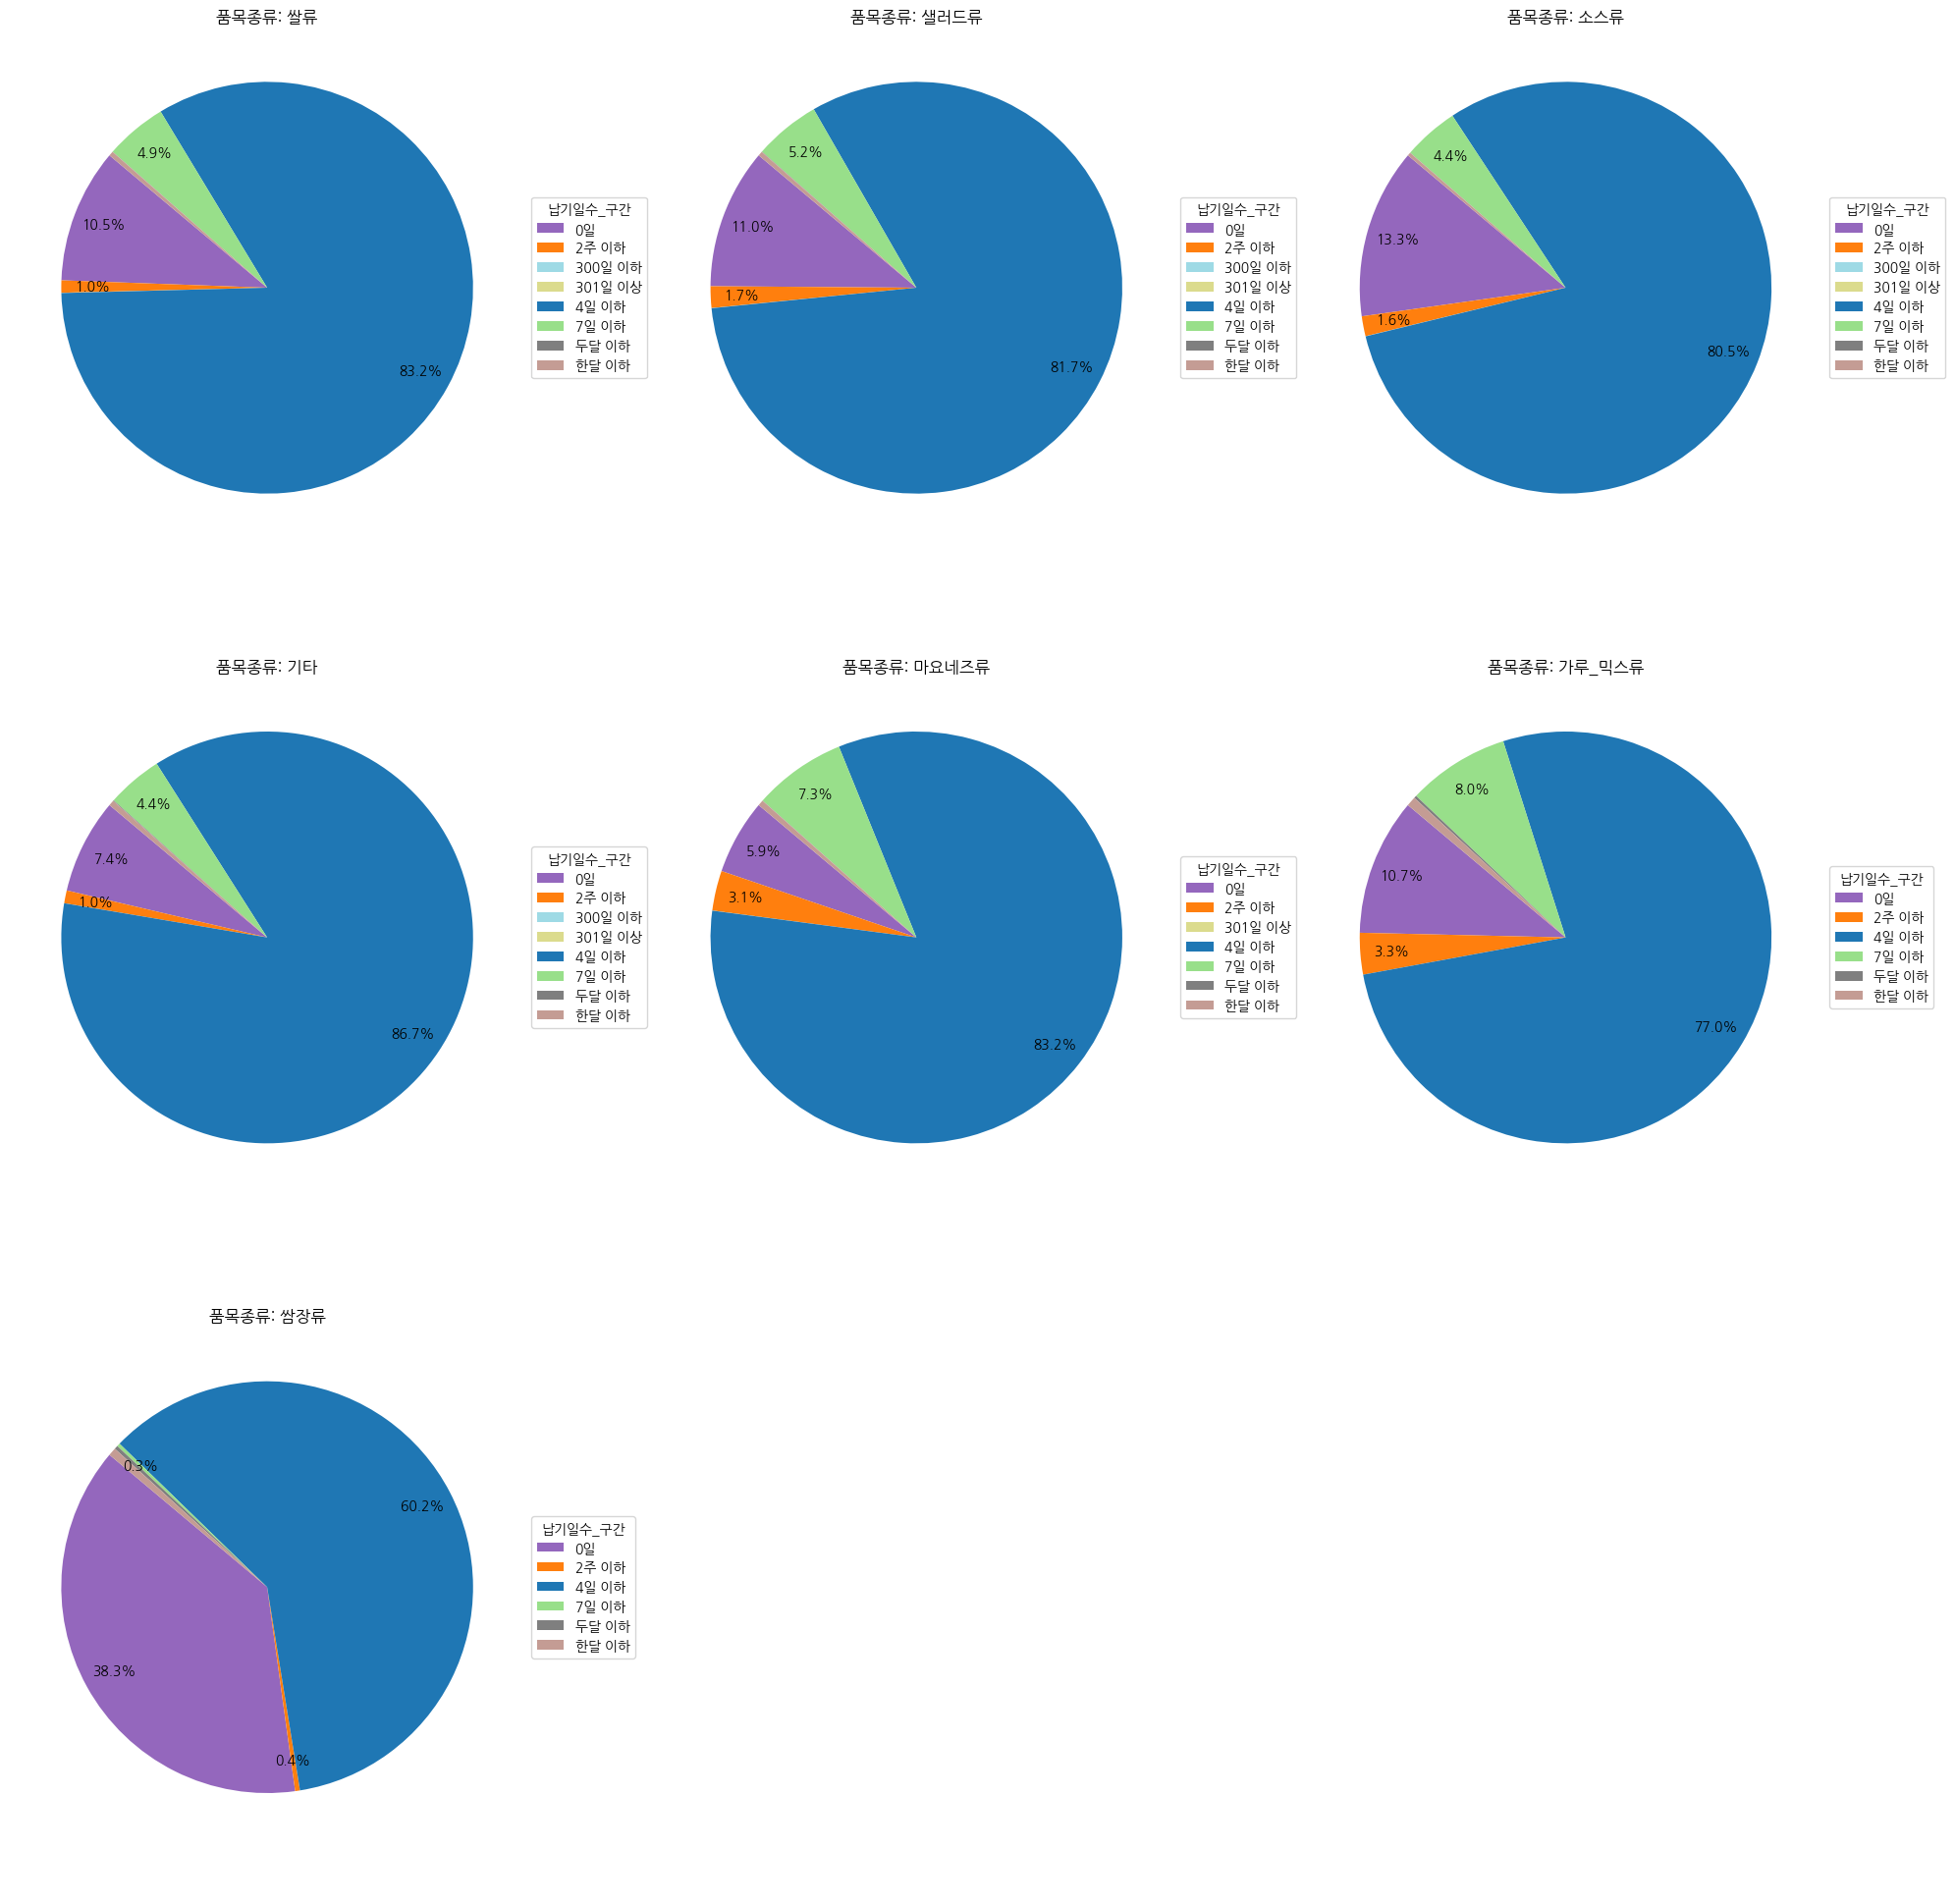

In [35]:
import matplotlib.pyplot as plt

# 고유한 품목종류 리스트 생성
unique_item_types = df_booking['품목종류'].unique()

# 서브플롯 생성 (3행 3열, 7개의 그래프와 2개는 숨길 예정)
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

# 고유한 납기일수_구간 리스트 생성
unique_intervals = df_booking['납기일수_구간'].unique()

# 납기일수_구간에 대한 색상 사전 생성
color_map = plt.get_cmap('tab20')
colors = color_map(np.linspace(0, 1, len(unique_intervals)))
interval_color_dict = {interval: color for interval, color in zip(unique_intervals, colors)}

# 주어진 납기일수_구간에 대한 퍼센트를 표시하는 함수 정의
def autopct_generator(counts):
    def autopct(pct):
        total = sum(counts)
        val = int(round(pct*total/100.0))
        key_index = counts.index[val == counts.values]
        if key_index in ['0일', '4일 이하', '7일 이하', '2주 이하']:
            return "{:.1f}%".format(pct)
        else:
            return ''
    return autopct

# 각 품목종류별로 서브플롯에 원 그래프 그리기
for i, item_type in enumerate(unique_item_types[:7]):
    ax = axs[i // 3, i % 3]  # 행과 열 위치 결정
    filtered_df = df_booking[df_booking['품목종류'] == item_type]
    counts = filtered_df['납기일수_구간'].value_counts().sort_index()

    # 각 납기일수_구간의 색상을 지정하여 원 그래프 그리기
    colors = [interval_color_dict[interval] for interval in counts.index]
    wedges, texts, autotexts = ax.pie(counts, autopct=autopct_generator(counts), startangle=140, pctdistance=0.85, colors=colors)

    # 범례 추가
    ax.legend(wedges, counts.index, title="납기일수_구간", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    # 제목 설정
    ax.set_title(f'품목종류: {item_type}')

# 나머지 빈 서브플롯 숨기기
for j in range(7, 9):
    axs[j // 3, j % 3].axis('off')

plt.tight_layout()
plt.show()


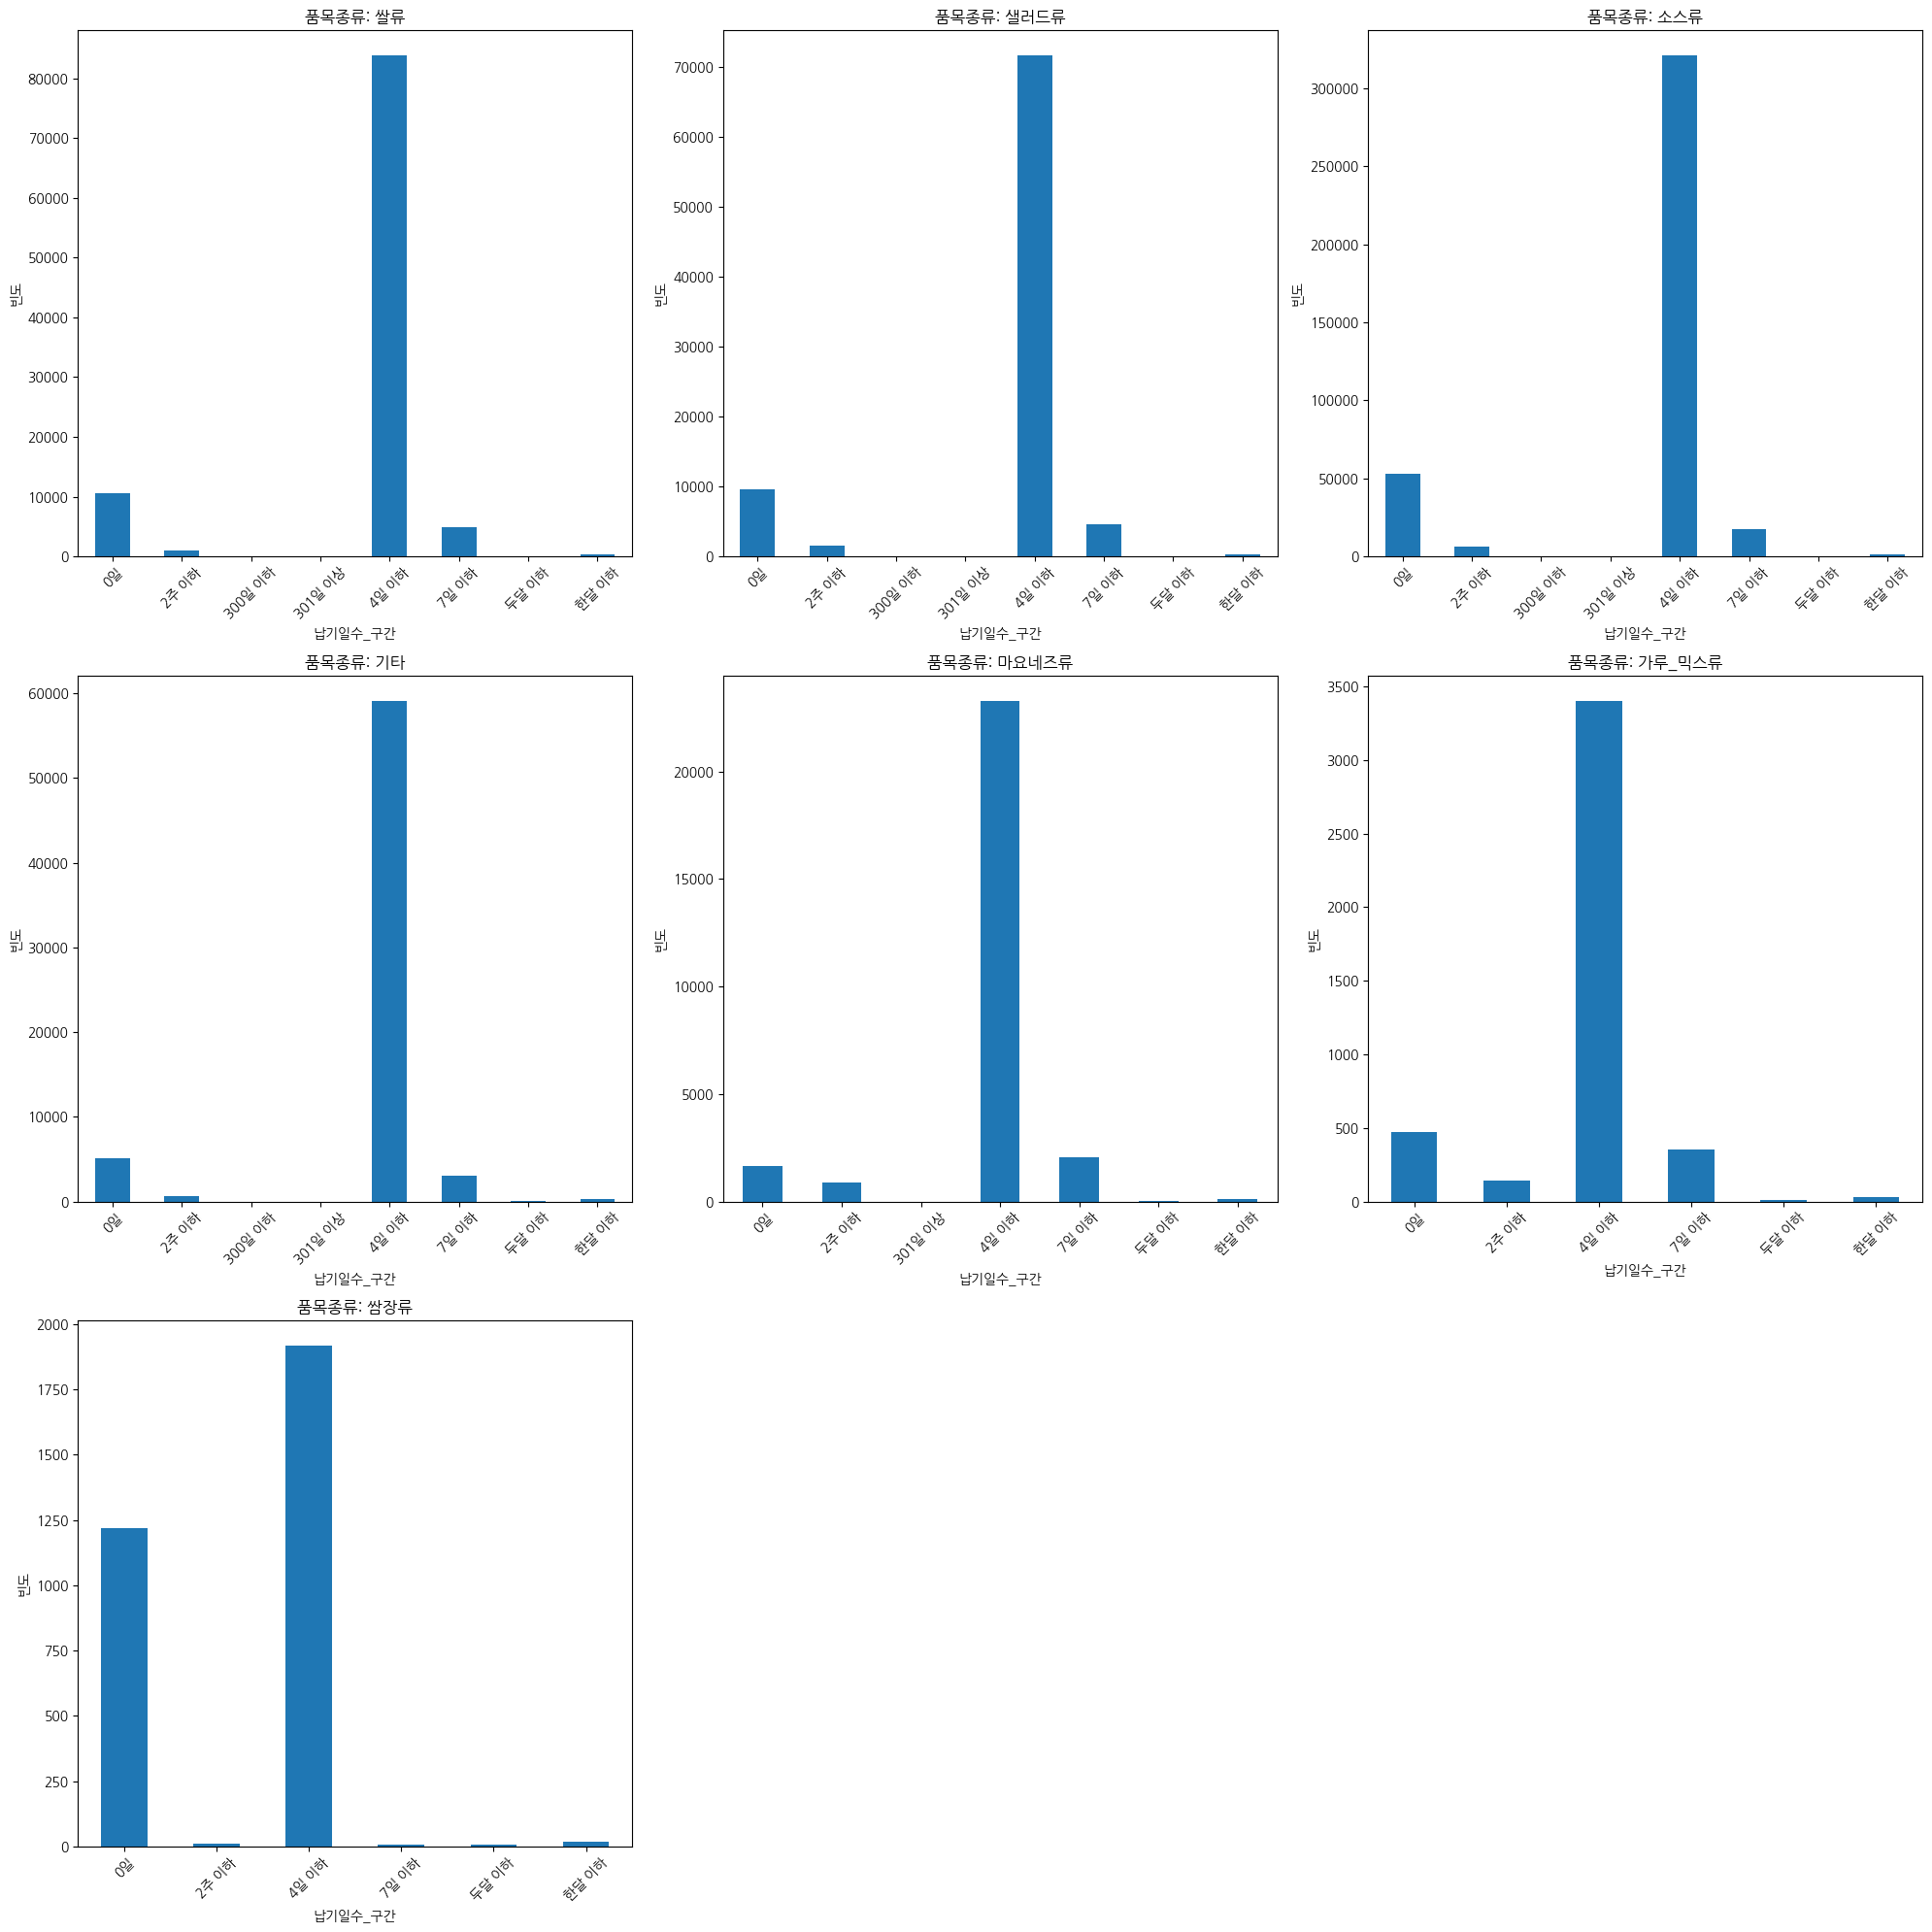

In [36]:

# 고유한 품목종류 리스트 생성
unique_item_types = df_booking['품목종류'].unique()

# 서브플롯 생성 (3행 3열, 7개의 그래프와 2개는 숨길 예정)
fig, axs = plt.subplots(3, 3, figsize=(20, 20))  # 세로 길이를 조정합니다.

# 각 품목종류별로 서브플롯에 그래프 그리기
for i, item_type in enumerate(unique_item_types[:7]):  # 첫 7개 품목종류만 사용
    ax = axs[i // 3, i % 3]  # 행과 열 위치 결정
    filtered_df = df_booking[df_booking['품목종류'] == item_type]
    counts = filtered_df['납기일수_구간'].value_counts().sort_index()
    
    counts.plot(kind='bar', ax=ax)
    ax.set_title(f'품목종류: {item_type}')
    ax.set_xlabel('납기일수_구간')
    ax.set_ylabel('빈도')
    ax.tick_params(axis='x', rotation=45)

# 나머지 빈 서브플롯 숨기기
for j in range(7, 9):
    axs[j // 3, j % 3].axis('off')

plt.tight_layout()
plt.show()


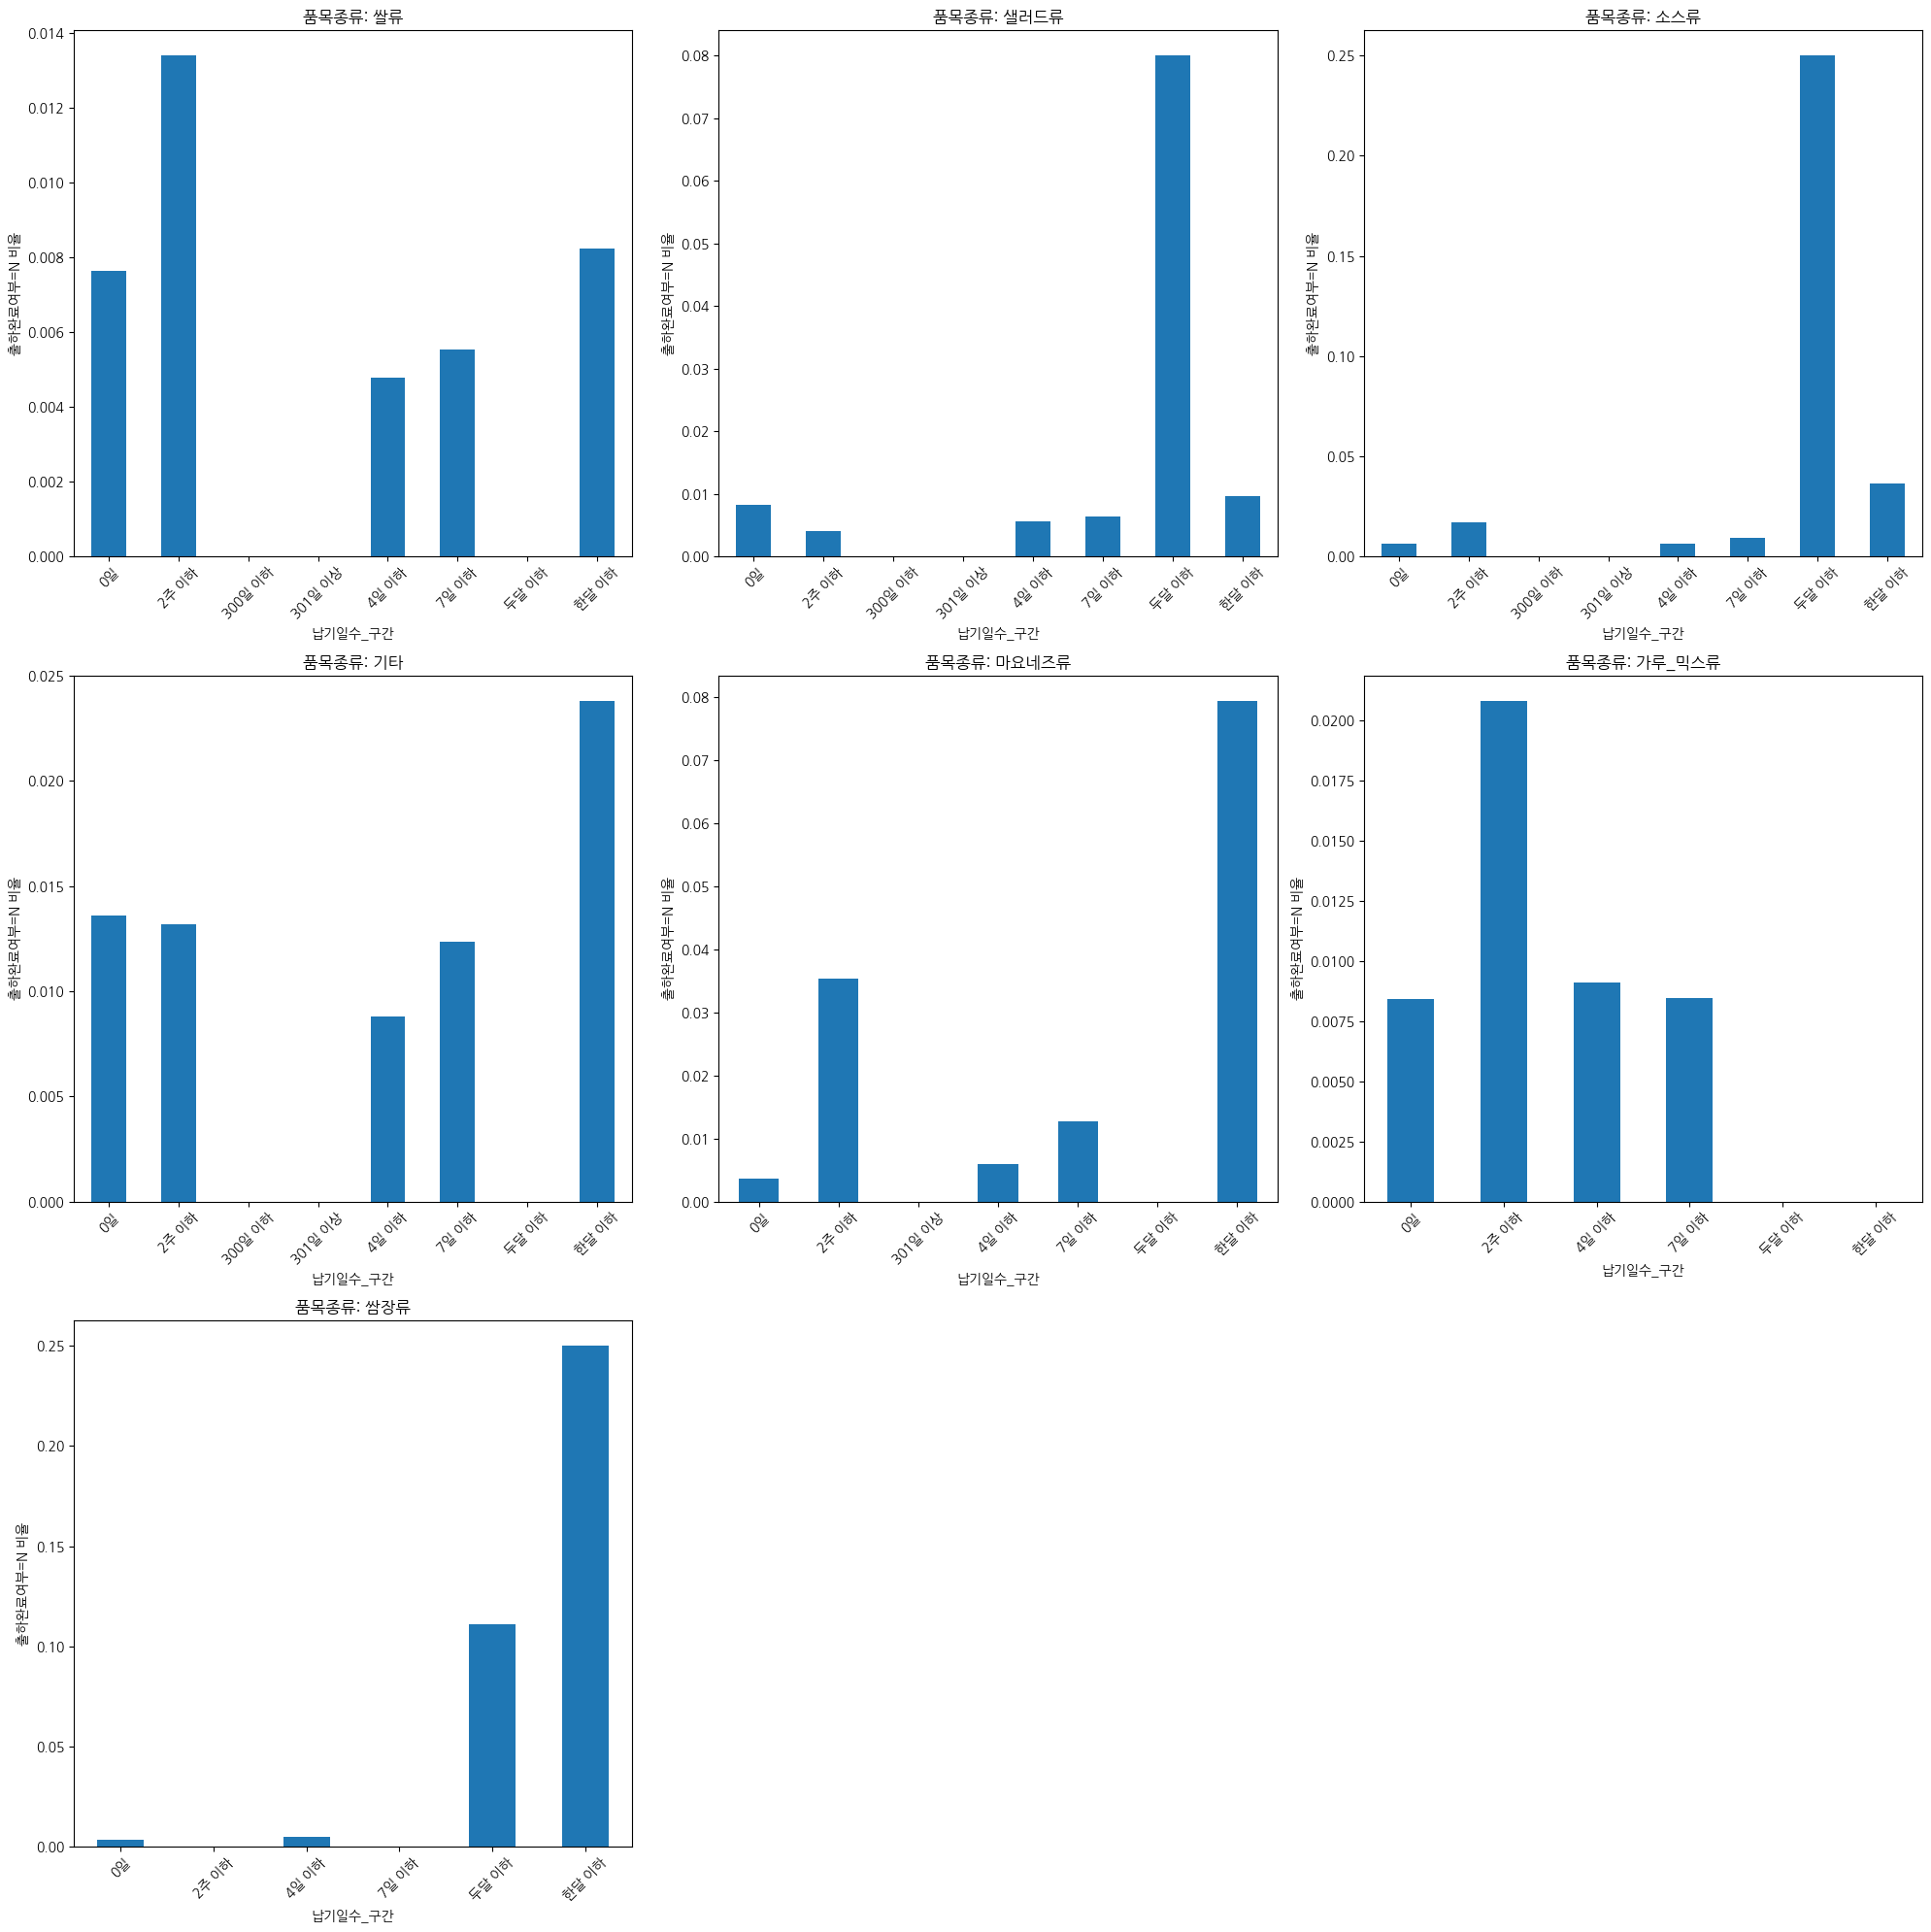

In [37]:
# 고유한 품목종류 리스트 생성
unique_item_types = df_booking['품목종류'].unique()

# 서브플롯 생성 (3행 3열, 7개의 그래프와 2개는 숨길 예정)
fig, axs = plt.subplots(3, 3, figsize=(20, 20))  # 세로 길이를 조정합니다.

# 각 품목종류별로 서브플롯에 그래프 그리기
for i, item_type in enumerate(unique_item_types[:7]):  # 첫 7개 품목종류만 사용
    ax = axs[i // 3, i % 3]  # 행과 열 위치 결정
    filtered_df = df_booking[df_booking['품목종류'] == item_type]
    counts_total = filtered_df['납기일수_구간'].value_counts().sort_index()
    
    # '출하완료여부'가 'N'인 행만 필터링하여 빈도 계산
    filtered_df_n = filtered_df[filtered_df['출하완료여부'] == 'N']
    counts_n = filtered_df_n['납기일수_구간'].value_counts().sort_index()
    
    # 비율 계산
    ratio_n = counts_n / counts_total
    
    ratio_n.plot(kind='bar', ax=ax)
    ax.set_title(f'품목종류: {item_type}')
    ax.set_xlabel('납기일수_구간')
    ax.set_ylabel('출하완료여부=N 비율')
    ax.tick_params(axis='x', rotation=45)

# 나머지 빈 서브플롯 숨기기
for j in range(7, 9):
    axs[j // 3, j % 3].axis('off')

plt.tight_layout()
plt.show()

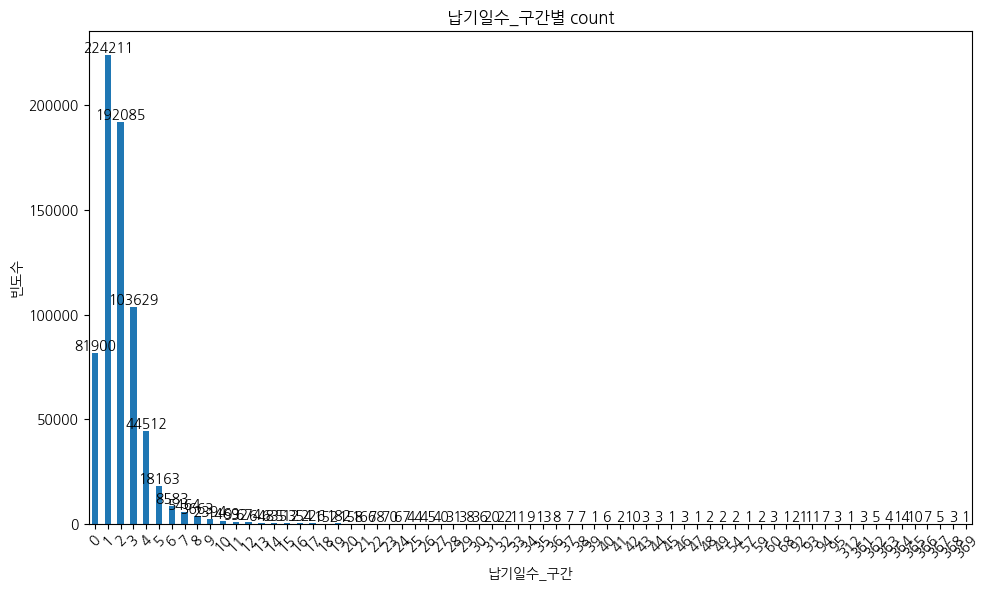

In [38]:
# 납기일수_구간별 빈도수를 바 그래프로 표현합니다.
plt.figure(figsize=(10, 6))
ax = date_counts.plot(kind='bar')
plt.title('납기일수_구간별 count')
plt.xlabel('납기일수_구간')
plt.ylabel('빈도수')
plt.xticks(rotation=45)

# 각 막대 위에 빈도 표시
for i, v in enumerate(date_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()  # 레이아웃 조정
plt.show()


### 납기건수 별 기간 그래프

In [39]:
df_booking['납기건수'] = (df_booking['수주금액']+df_booking['부가세금액'])/df_booking['수주단가']
df_booking.head()

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,수주단가,수주금액,부가세금액,출하완료여부,납기일자,생산지시,납기일수,그룹_수주품목코드,품목종류,납기일수_구간,수량,연도,분기,매출액,납기건수
0,60.0,2021-10-03,115,SI0107,1BA03255,1450.0,237273.0,23727,Y,2021-10-04,N,1,1B,쌀류,4일 이하,180.0,2021,4,261000.0,180.0
1,60.0,2021-10-03,116,SI0107,16A02023,3550.0,161364.0,16136,Y,2021-10-06,N,3,16,샐러드류,4일 이하,50.0,2021,4,177500.0,50.0
2,60.0,2021-10-03,117,IJ9449,13K02080,7040.0,153600.0,15360,Y,2021-10-04,N,1,13,소스류,4일 이하,24.0,2021,4,168960.0,24.0
3,60.0,2021-10-03,118,IJ9449,13R01080,8800.0,144000.0,14400,Y,2021-10-04,N,1,13,소스류,4일 이하,18.0,2021,4,158400.0,18.0
4,60.0,2021-10-03,121,SI0125,13D02212,7480.0,81600.0,8160,Y,2021-10-04,N,1,13,소스류,4일 이하,12.0,2021,4,89760.0,12.0


In [40]:
# counts = df_booking[df_booking['출하완료여부'] == 'Y']['납기일수'].value_counts()
# plt.bar(counts.index, counts.values, label="준수", alpha=0.5)  # heights are the counts
# plt.xlabel('납기일수')

# # plt.bar(df_booking[df_booking['출하완료여부'] == 'Y']['납기일수'], label = "준수", alpha = 1)
# plt.xlim(-10, 40)
# plt.ylabel('Count')     
# plt.legend()       
# plt.title('납기일수에 따른 준수 여부')
# plt.show()

In [41]:
# df_booking[['수주금액']].boxplot(figsize=(10,4))
# plt.show()

In [42]:
# # 수주 출하완료여부 비율 계산
# plt.figure(figsize=(10, 6))
# df_booking['출하완료여부'].value_counts().plot(kind='bar', color=['blue', 'red'])
# plt.title('출하완료여부')
# plt.xlabel('출하완료여부')
# plt.ylabel('개수')
# plt.xticks(rotation=0)  # x축 레이블의 각도를 조정합니다.
# plt.show()

In [43]:
df_booking['수주일자'] = pd.to_datetime(df_booking.수주일자,format = '%d%m%y')
df_booking['납기일자'] = pd.to_datetime(df_booking.납기일자,format = '%d%m%y')

# df_booking.info()

In [44]:
# 계절 추출 함수 정의
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 주말여부 추출 함수 정의
def is_weekend(day):
    if day.weekday() in [5, 6]:
        return '주말'
    else:
        return '평일'

# 수주월, 수주일, 수주요일, 계절, 주말여부 열 추가
df_booking['수주월'] = df_booking['수주일자'].dt.month
df_booking['수주일'] = df_booking['수주일자'].dt.day
df_booking['수주요일'] = df_booking['수주일자'].dt.dayofweek
df_booking['계절'] = df_booking['수주월'].apply(get_season)
df_booking['주말여부'] = df_booking['수주일자'].apply(is_weekend)

In [45]:
df_booking.head()

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,수주단가,수주금액,부가세금액,출하완료여부,납기일자,...,수량,연도,분기,매출액,납기건수,수주월,수주일,수주요일,계절,주말여부
0,60.0,2021-10-03,115,SI0107,1BA03255,1450.0,237273.0,23727,Y,2021-10-04,...,180.0,2021,4,261000.0,180.0,10,3,6,가을,주말
1,60.0,2021-10-03,116,SI0107,16A02023,3550.0,161364.0,16136,Y,2021-10-06,...,50.0,2021,4,177500.0,50.0,10,3,6,가을,주말
2,60.0,2021-10-03,117,IJ9449,13K02080,7040.0,153600.0,15360,Y,2021-10-04,...,24.0,2021,4,168960.0,24.0,10,3,6,가을,주말
3,60.0,2021-10-03,118,IJ9449,13R01080,8800.0,144000.0,14400,Y,2021-10-04,...,18.0,2021,4,158400.0,18.0,10,3,6,가을,주말
4,60.0,2021-10-03,121,SI0125,13D02212,7480.0,81600.0,8160,Y,2021-10-04,...,12.0,2021,4,89760.0,12.0,10,3,6,가을,주말


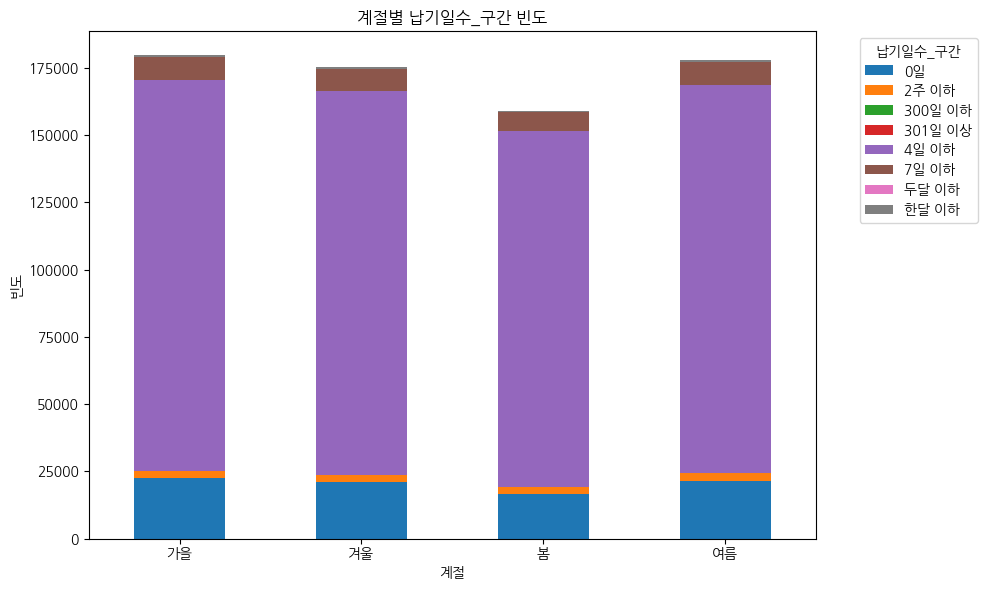

In [46]:
# '계절'별 '납기일수_구간' 빈도 계산
grouped = df_booking.groupby('계절')['납기일수_구간'].value_counts().unstack(fill_value=0)

# 빈도를 바 그래프로 시각화
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# 그래프 제목과 축 레이블 설정
plt.title('계절별 납기일수_구간 빈도')
plt.xlabel('계절')
plt.ylabel('빈도')
plt.xticks(rotation=0)  # 계절 레이블이 잘 보이도록 회전 없음
plt.legend(title='납기일수_구간', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 보여주기
plt.tight_layout()
plt.show()

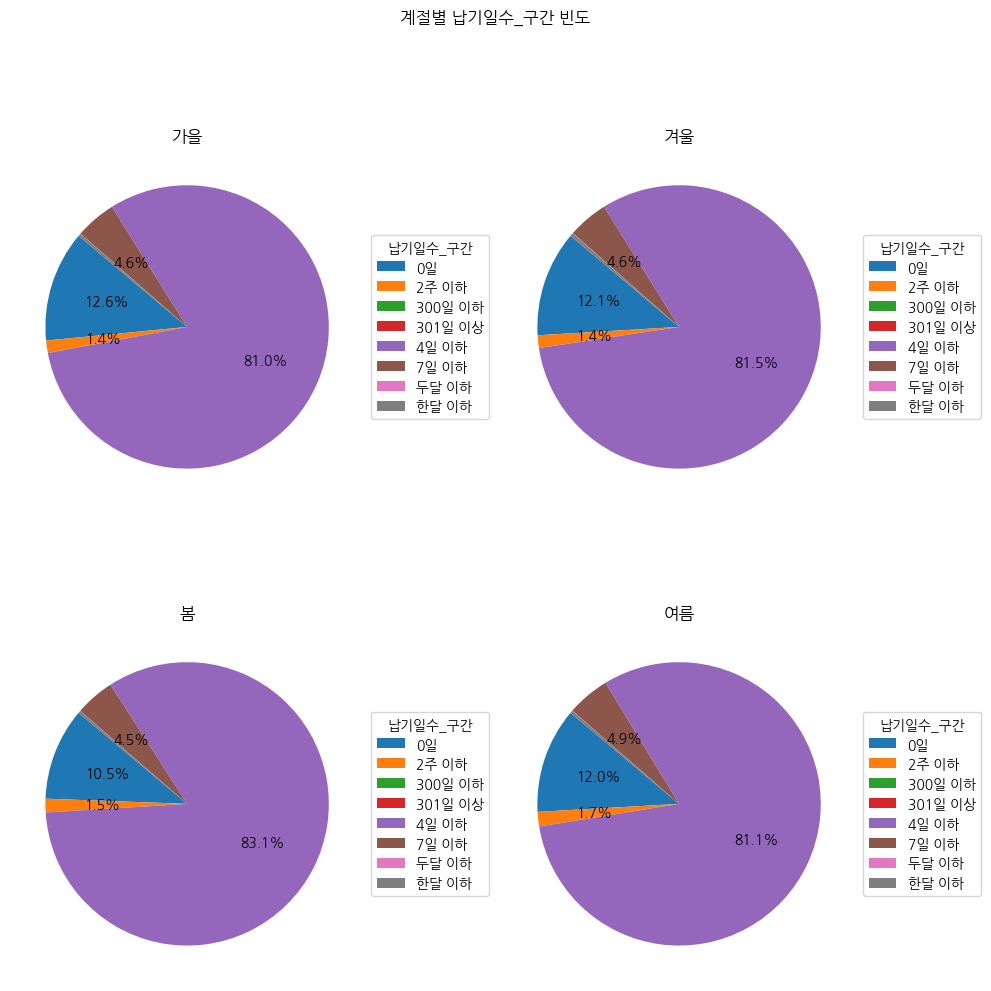

In [47]:
import matplotlib.pyplot as plt

# '계절'별 '납기일수_구간' 빈도 계산
grouped = df_booking.groupby('계절')['납기일수_구간'].value_counts().unstack(fill_value=0)

# 서브플롯 생성 (2행 2열)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# 표시할 납기일수_구간 레이블
display_labels = ['0일', '4일 이하', '7일 이하', '2주 이하']

# 각 계절별로 원 그래프 그리기
for i, (season, counts) in enumerate(grouped.iterrows()):
    ax = axs[i // 2, i % 2]  # 행과 열 위치 결정
    
    # 퍼센트 표시를 위한 커스텀 함수
    def custom_autopct(pct):
        total = sum(counts)
        val = int(round(pct*total/100.0))
        for count, index in zip(counts, counts.index):
            if count == val and index in display_labels:
                return '{:.1f}%'.format(pct)
        return ''
    
    # 원 그래프 그리기, 레이블 없이, 범례와 퍼센트 표시
    wedges, texts, autotexts = ax.pie(counts, autopct=custom_autopct, startangle=140)
    
    # 범례 추가
    ax.legend(wedges, counts.index, title="납기일수_구간", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    # 제목 설정
    ax.set_title(season)

# 전체 그래프 제목 설정 및 레이아웃 조정
plt.suptitle('계절별 납기일수_구간 빈도', y=1.03)
plt.tight_layout()

# 그래프 보여주기
plt.show()


In [48]:
# 출하완료여부 Y:686699
# 출하완료여부 N:4697

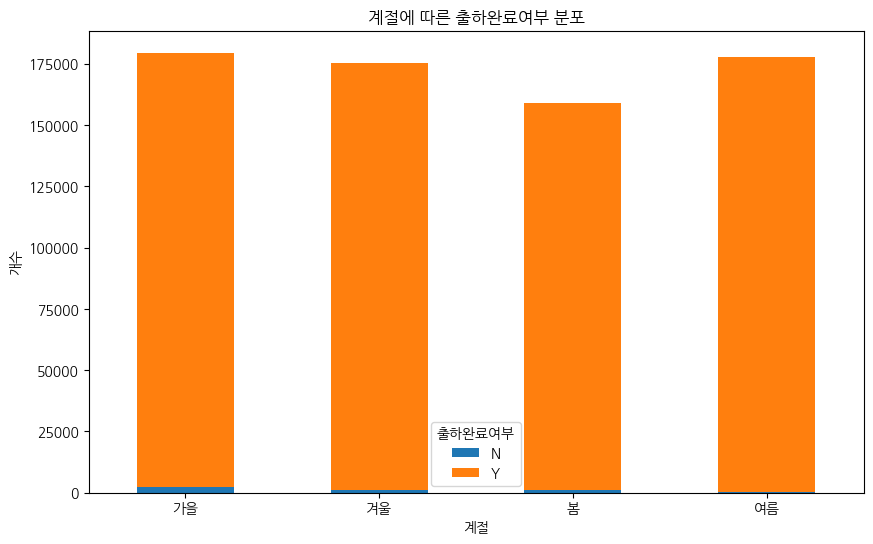

In [49]:
# '계절'과 '출하완료여부'로 그룹화하고 크기를 계산하여 집계
grouped = df_booking.groupby(['계절', '출하완료여부']).size().unstack()

# 집계 결과를 바 그래프로 시각화
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# 그래프 제목과 축 레이블 설정
plt.title('계절에 따른 출하완료여부 분포')
plt.xlabel('계절')
plt.ylabel('개수')
plt.xticks(rotation=0)  # 계절명은 보통 회전 없이 잘 보입니다.

# 그래프 표시
plt.show()

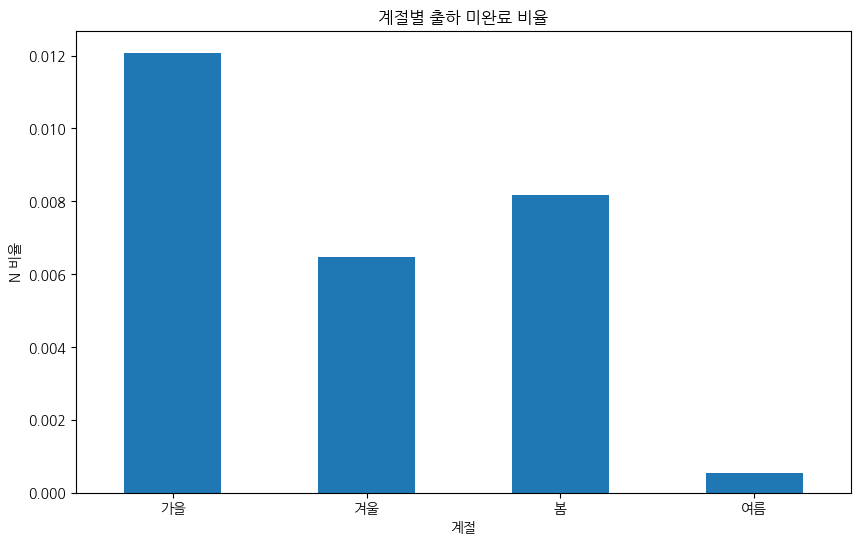

In [50]:
# '계절'별로 그룹화하고, '출하완료여부'가 'N'인 경우의 수를 셉니다.
grouped_n = df_booking[df_booking['출하완료여부'] == 'N'].groupby('계절').count()['출하완료여부']

# '계절'별 전체 수를 셉니다.
grouped_total = df_booking.groupby('계절').count()['출하완료여부']

# 'N'의 비율을 계산합니다.
n_ratio = grouped_n / grouped_total

# 비율을 바 그래프로 시각화합니다.
n_ratio.plot(kind='bar', figsize=(10, 6))

# 그래프 제목과 축 레이블 설정합니다.
plt.title('계절별 출하 미완료 비율')
plt.xlabel('계절')
plt.ylabel('N 비율')
plt.xticks(rotation=0)

# 그래프를 보여줍니다.
plt.show()


In [51]:
# df_cooking = pd.read_csv("/home/piai/간편식 생산성/A1_간편식/Cooking_data_set.csv", encoding = "cp949") 

# df_cooking.head()

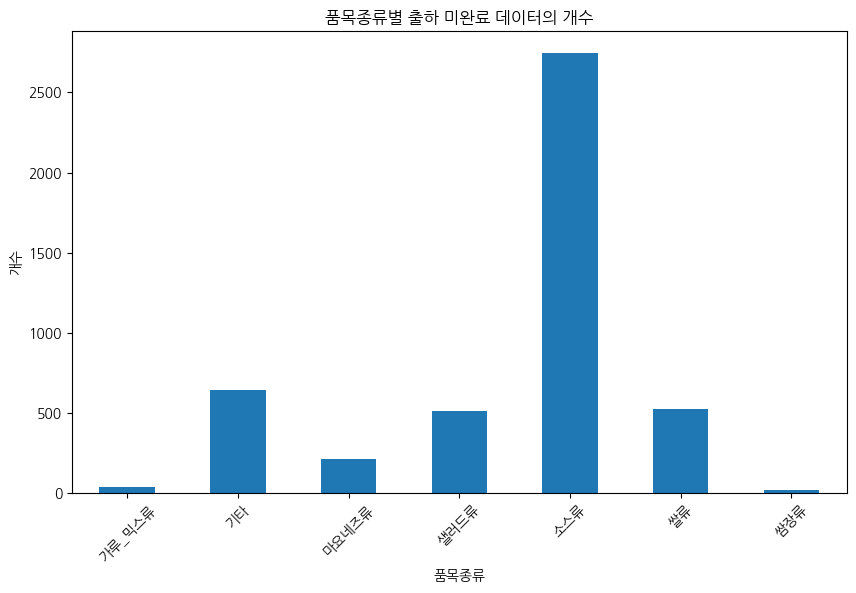

In [52]:
# '그룹_수주품목코드'별로 그룹화하고, 각 그룹별 '출하완료여부'의 전체 개수를 셉니다.
grouped_total = df_booking.groupby('품목종류').count()['출하완료여부']

# '그룹_수주품목코드'별로 그룹화하고, '출하완료여부'가 'N'인 경우의 수를 셉니다.
grouped_n = df_booking[df_booking['출하완료여부'] == 'N'].groupby('품목종류').count()['출하완료여부']

# 비율을 바 그래프로 시각화합니다.
grouped_n.plot(kind='bar', figsize=(10, 6))

# 그래프 제목과 축 레이블 설정합니다.
plt.title('품목종류별 출하 미완료 데이터의 개수')
plt.xlabel('품목종류')
plt.ylabel('개수')
plt.xticks(rotation=45)

# 그래프를 보여줍니다.
plt.show()


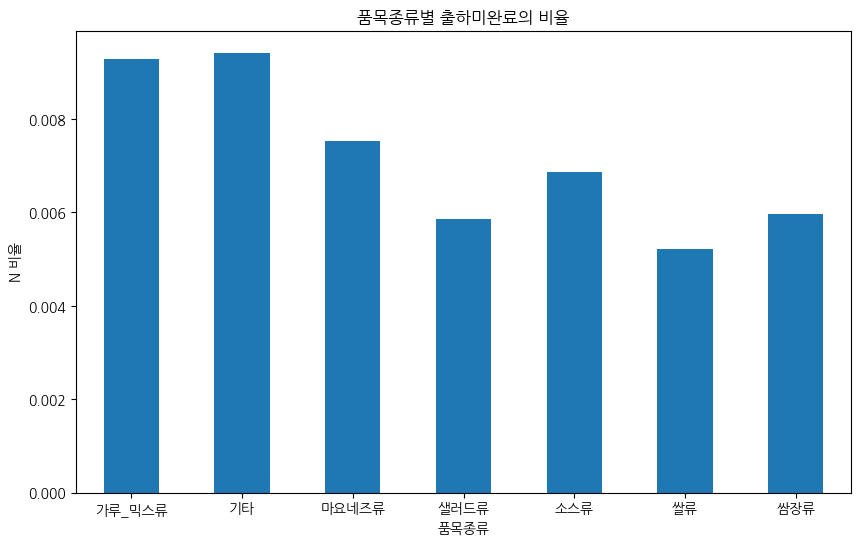

In [53]:
# 품목코드 별 출하완료비율

# '계절'별로 그룹화하고, '출하완료여부'가 'N'인 경우의 수를 셉니다.
grouped_n1 = df_booking[df_booking['출하완료여부'] == 'N'].groupby('품목종류').count()['출하완료여부']

# '계절'별 전체 수를 셉니다.
grouped_total_1 = df_booking.groupby('품목종류').count()['출하완료여부']

# 'N'의 비율을 계산합니다.
n_ratio1 = grouped_n1 / grouped_total_1

# 비율을 바 그래프로 시각화합니다.
n_ratio1.plot(kind='bar', figsize=(10, 6))

# 그래프 제목과 축 레이블 설정합니다.
plt.title('품목종류별 출하미완료의 비율')
plt.xlabel('품목종류')
plt.ylabel('N 비율')
plt.xticks(rotation=0)

# 그래프를 보여줍니다.
plt.show()

In [54]:
df_booking.head()

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,수주단가,수주금액,부가세금액,출하완료여부,납기일자,...,수량,연도,분기,매출액,납기건수,수주월,수주일,수주요일,계절,주말여부
0,60.0,2021-10-03,115,SI0107,1BA03255,1450.0,237273.0,23727,Y,2021-10-04,...,180.0,2021,4,261000.0,180.0,10,3,6,가을,주말
1,60.0,2021-10-03,116,SI0107,16A02023,3550.0,161364.0,16136,Y,2021-10-06,...,50.0,2021,4,177500.0,50.0,10,3,6,가을,주말
2,60.0,2021-10-03,117,IJ9449,13K02080,7040.0,153600.0,15360,Y,2021-10-04,...,24.0,2021,4,168960.0,24.0,10,3,6,가을,주말
3,60.0,2021-10-03,118,IJ9449,13R01080,8800.0,144000.0,14400,Y,2021-10-04,...,18.0,2021,4,158400.0,18.0,10,3,6,가을,주말
4,60.0,2021-10-03,121,SI0125,13D02212,7480.0,81600.0,8160,Y,2021-10-04,...,12.0,2021,4,89760.0,12.0,10,3,6,가을,주말


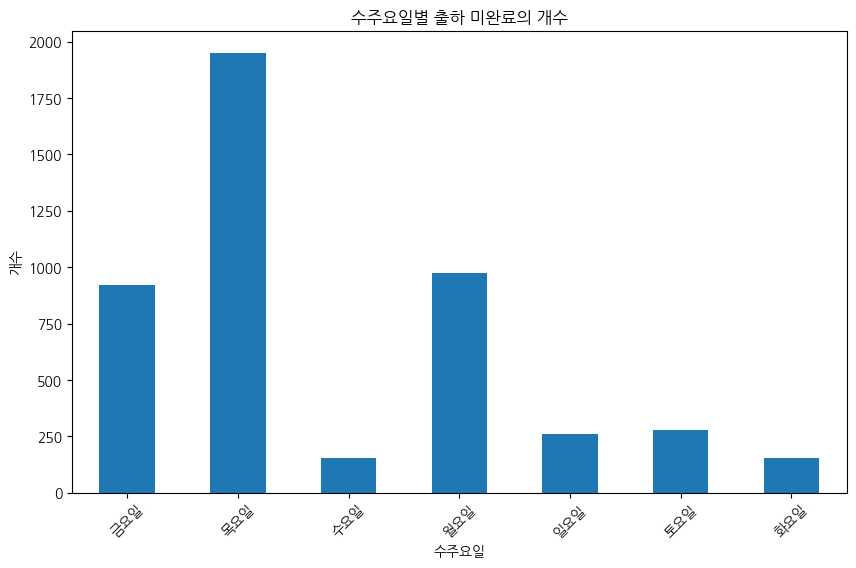

In [55]:
# 요일 매핑을 위한 딕셔너리 정의
weekday_map = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}

# '수주요일' 칼럼을 요일명으로 매핑
df_booking['수주요일명'] = df_booking['수주요일'].map(weekday_map)

# '수주요일명'별로 그룹화하고, '출하완료여부'가 'N'인 경우의 수를 셉니다.
grouped_n = df_booking[df_booking['출하완료여부'] == 'N'].groupby('수주요일명').count()['출하완료여부']

# 비율을 바 그래프로 시각화합니다.
grouped_n.plot(kind='bar', figsize=(10, 6))

# 그래프 제목과 축 레이블 설정합니다.
plt.title('수주요일별 출하 미완료의 개수')
plt.xlabel('수주요일')
plt.ylabel('개수')
plt.xticks(rotation=45)

# 그래프를 보여줍니다.
plt.show()


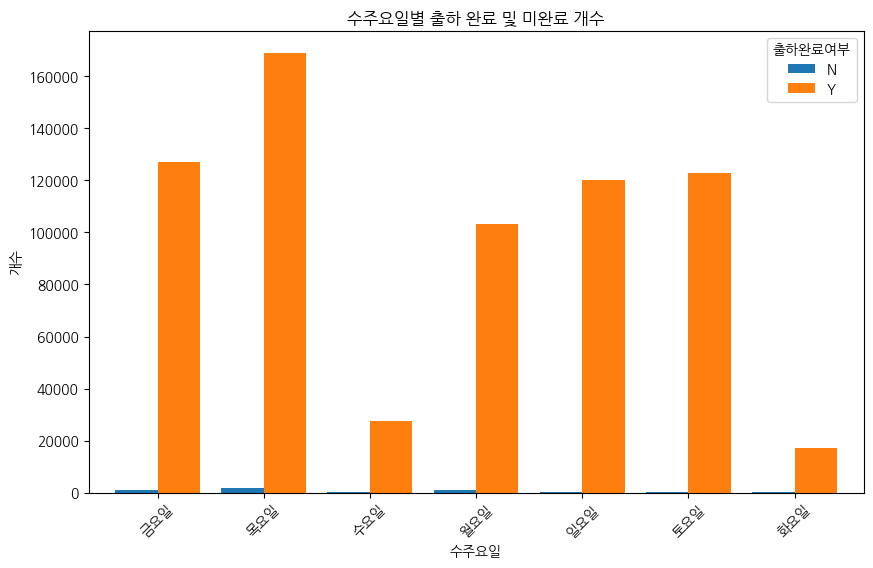

In [56]:
import matplotlib.pyplot as plt

# 요일 매핑을 위한 딕셔너리 정의
weekday_map = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}

# '수주요일' 칼럼을 요일명으로 매핑
df_booking['수주요일명'] = df_booking['수주요일'].map(weekday_map)

# '수주요일명'과 '출하완료여부'별로 그룹화하고 개수를 셉니다.
grouped = df_booking.groupby(['수주요일명', '출하완료여부']).size().unstack(fill_value=0)

# 'Y'와 'N' 값에 대한 막대 그래프를 나란히 표시
grouped.plot(kind='bar', figsize=(10, 6), width=0.8)

# 그래프 제목과 축 레이블 설정
plt.title('수주요일별 출하 완료 및 미완료 개수')
plt.xlabel('수주요일')
plt.ylabel('개수')
plt.xticks(rotation=45)

# 범례 설정
plt.legend(title='출하완료여부')

# 그래프 보여주기
plt.show()


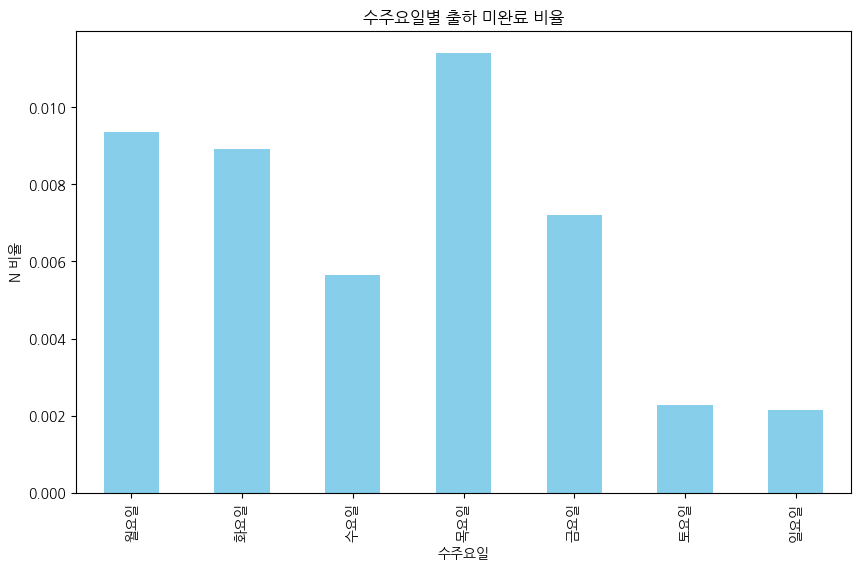

In [57]:
# 요일 매핑을 위한 딕셔너리 정의
weekday_map = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}
# '수주요일' 칼럼을 요일명으로 매핑
df_booking['수주요일명'] = df_booking['수주요일'].map(weekday_map)
# '수주요일명'별로 그룹화하고, 각 그룹별 '출하완료여부'의 전체 개수를 셉니다.
grouped_total = df_booking.groupby('수주요일명').count()['출하완료여부']
# '수주요일명'별로 그룹화하고, '출하완료여부'가 'N'인 경우의 수를 셉니다.
grouped_n = df_booking[df_booking['출하완료여부'] == 'N'].groupby('수주요일명').count()['출하완료여부']
# 데이터프레임으로 합칩니다.
df_grouped = pd.DataFrame({'전체': grouped_total, 'N': grouped_n}).fillna(0)
# N의 비율을 계산합니다.
df_grouped['N 비율'] = df_grouped['N'] / df_grouped['전체']
# 요일 순서대로 데이터 정렬
df_grouped = df_grouped.reindex(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])
# 비율을 바 그래프로 시각화합니다.
df_grouped['N 비율'].plot(kind='bar', figsize=(10, 6), color='skyblue')
# 그래프 제목과 축 레이블 설정합니다.
plt.title('수주요일별 출하 미완료 비율')
plt.xlabel('수주요일')
plt.ylabel('N 비율')
# 그래프를 보여줍니다.
plt.show()

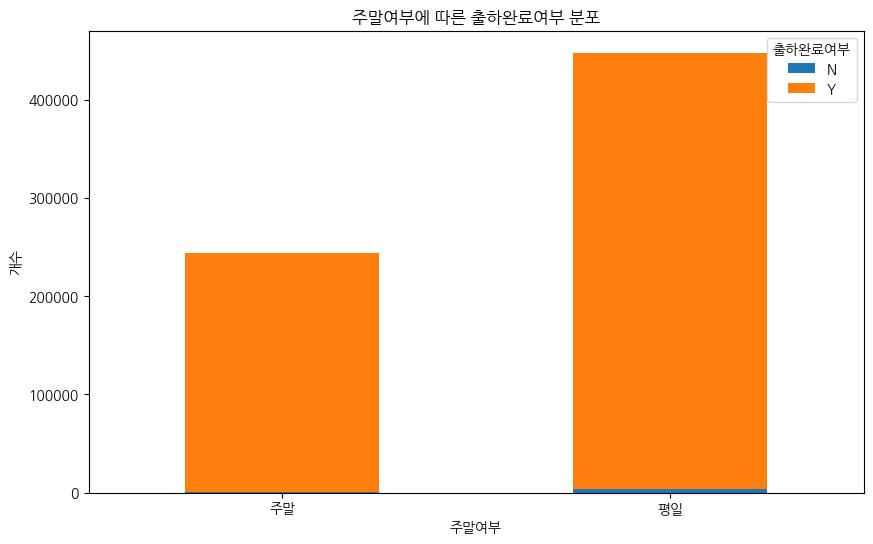

In [58]:
# '계절'과 '출하완료여부'로 그룹화하고 크기를 계산하여 집계
grouped = df_booking.groupby(['주말여부', '출하완료여부']).size().unstack()

# 집계 결과를 바 그래프로 시각화
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# 그래프 제목과 축 레이블 설정
plt.title('주말여부에 따른 출하완료여부 분포')
plt.xlabel('주말여부')
plt.ylabel('개수')
plt.xticks(rotation=0)  # 계절명은 보통 회전 없이 잘 보입니다.

# 그래프 표시
plt.show()

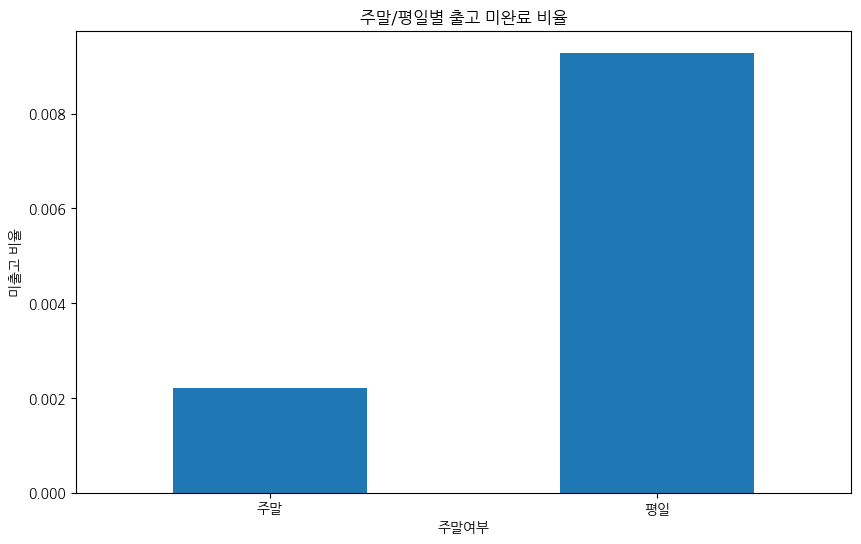

In [59]:
# '주말여부'별로 그룹화하고, '출하완료여부'가 'N'인 경우의 수를 셉니다.
grouped_n = df_booking[df_booking['출하완료여부'] == 'N'].groupby('주말여부').count()['출하완료여부']

# '# '부'별로 그룹화하고, '출하완료여부'가 'N'인 경우의 수를 셉니다.'별 전체 수를 셉니다.
grouped_total = df_booking.groupby('주말여부').count()['출하완료여부']

# 'N'의 비율을 계산합니다.
n_ratio = grouped_n / grouped_total

# 비율을 바 그래프로 시각화합니다.
n_ratio.plot(kind='bar', figsize=(10, 6))

# 그래프 제목과 축 레이블 설정합니다.
plt.title('주말/평일별 출고 미완료 비율')
plt.xlabel('주말여부')
plt.ylabel('미출고 비율')
plt.xticks(rotation=0)

# 그래프를 보여줍니다.
plt.show()


In [60]:
# 평일에 출하가 안된 비율이 더 높음
# 쿠킹에서는 주말에 기계 고장률이 많았음 => 주말에 기계 고장 많아서 평일에 출하될 가능성이 높다고 판단.
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691396 entries, 0 to 758507
Data columns (total 26 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   수주사업장      691396 non-null  float64       
 1   수주일자       691396 non-null  datetime64[ns]
 2   수주일련번호     691396 non-null  int64         
 3   거래처코드      691396 non-null  object        
 4   수주품목코드     691396 non-null  object        
 5   수주단가       691396 non-null  float64       
 6   수주금액       691396 non-null  float64       
 7   부가세금액      691396 non-null  int64         
 8   출하완료여부     691396 non-null  object        
 9   납기일자       691396 non-null  datetime64[ns]
 10  생산지시       635506 non-null  object        
 11  납기일수       691396 non-null  int64         
 12  그룹_수주품목코드  691396 non-null  object        
 13  품목종류       691396 non-null  object        
 14  납기일수_구간    691396 non-null  object        
 15  수량         691396 non-null  float64       
 16  연도         691396 no

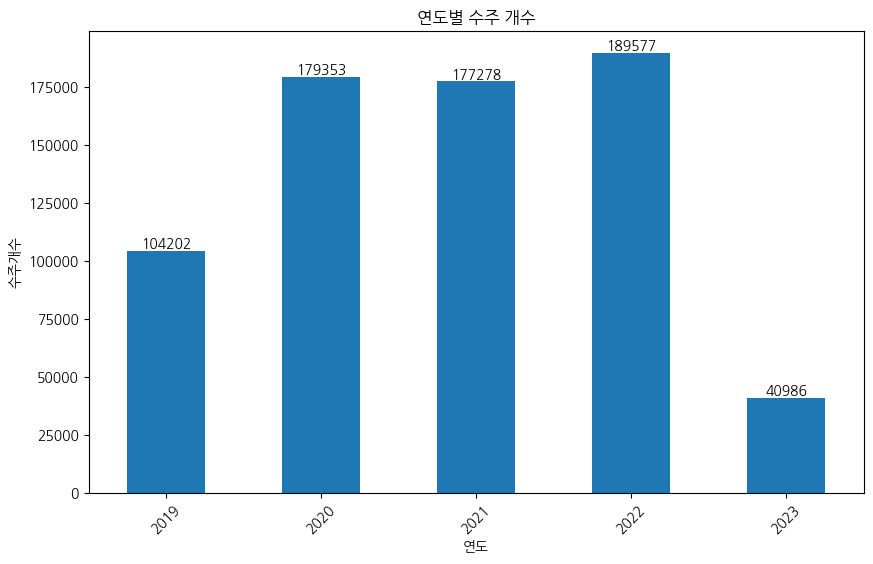

In [61]:
import matplotlib.pyplot as plt
# '연도' 열을 추가하여 연도 데이터를 저장
df_booking['연도'] = df_booking['수주일자'].dt.year
# '연도'별로 그룹화하고 각 그룹별 데이터 개수를 셉니다.
grouped_yearly = df_booking.groupby('연도').size()

# 바 그래프 시각화
grouped_yearly.plot(kind='bar', figsize=(10, 6))

# 그래프 제목과 축 레이블 설정
plt.title('연도별 수주 개수')
plt.xlabel('연도')
plt.ylabel('수주개수')
plt.xticks(rotation=45)  # 연도 레이블이 잘 보이도록 회전

# 각 막대 위에 개수 표시
for index, value in enumerate(grouped_yearly):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
# 그래프 보여주기
plt.show()


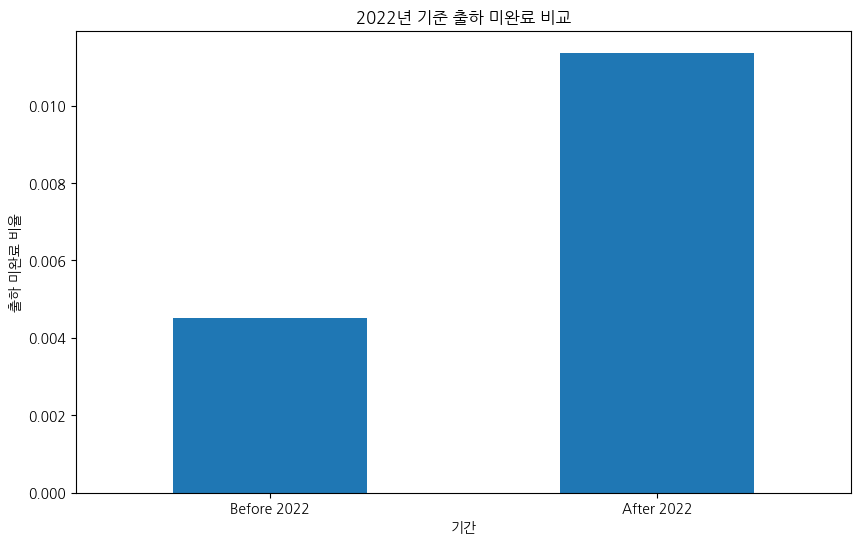

In [62]:
#다시 한번봐야함

# 2021년 이전 및 이후의 데이터를 분리합니다.
before_2022 = df_booking[df_booking['연도'] < 2022]
after_2022 = df_booking[df_booking['연도'] >= 2022]

# '수주완료여부'가 'N'인 데이터의 개수를 계산합니다.
n_before_2022 = before_2022[before_2022['출하완료여부'] == 'N'].shape[0]
n_after_2022 = after_2022[after_2022['출하완료여부'] == 'N'].shape[0]

# 각 기간의 전체 데이터 개수를 계산합니다.
total_before_2022 = before_2022.shape[0]
total_after_2022 = after_2022.shape[0]

# 불량률을 계산합니다.
n_ratio_before_2022 = n_before_2022 / total_before_2022 if total_before_2022 else 0
n_ratio_after_2022 = n_after_2022 / total_after_2022 if total_after_2022 else 0

# 불량률 데이터를 데이터프레임으로 구성합니다.
df_n_ratios = pd.DataFrame({
    'Period': ['Before 2022', 'After 2022'],
    'Fault Rate': [n_ratio_before_2022, n_ratio_after_2022]
})

# 비율을 바 그래프로 시각화합니다.
df_n_ratios.plot(x='Period', y='Fault Rate', kind='bar', legend=False, figsize=(10, 6))

# 그래프 제목과 축 레이블 설정합니다.
plt.title('2022년 기준 출하 미완료 비교')
plt.xlabel('기간')
plt.ylabel('출하 미완료 비율')
plt.xticks(rotation=0)

# 그래프를 보여줍니다.
plt.show()


### cooking_data와 merge

In [63]:
df_cooking = pd.read_csv("/home/piai/간편식 생산성/A1_간편식/Cooking_data_set.csv", encoding = "cp949") 

df_cooking.head()

,Unnamed: 0.1,Unnamed: 0,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,ID,오류발생여부
0,0,0,3,C001,쿠커 #1,2012-05-17,23K01312,서비스면양념장(재),W003,73.669853,100.769853,138.742003,25.315,204.844,70.37,2012-05-1723K01312C0013,정상
1,1,1,1,C002,쿠커 #2,2012-05-17,23V00019,고구마샐러드믹스베이스(재),W003,72.386480,111.086480,140.926080,25.226,213.043,70.83,2012-05-1723V00019C0021,정상
2,2,2,13,C003,쿠커 #3,2012-05-17,1.#JE+00,이마트가쓰오다시국물(재),W003,73.206130,115.306130,154.579680,24.516,210.781,73.55,2012-05-171.#JE+00C00313,정상
3,3,3,7,C005,2동 쿠커 #4,2012-05-17,26A01006,고구마샐러드바145g(재),W003,72.430565,101.030565,135.569165,23.692,210.269,74.81,2012-05-1726A01006C0057,정상
4,4,4,2,C007,프리머 #1,2012-05-17,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,118.079318,149.928068,23.899,214.625,73.40,2012-05-1726B06024C0072,정상


In [64]:
# 결측치 확인
df_cooking.isnull().sum()


Unnamed: 0.1       0
Unnamed: 0         0
순번                 0
생산라인코드             0
생산라인명              0
생산일자               0
품목코드              76
품목명               95
작업장코드              0
충전실온도              0
실링온도              28
쿠킹온도              28
쿠킹스팀압력             0
실링압력               0
생산시간            1078
ID                76
오류발생여부             0
dtype: int64

In [65]:
# '품목코드' 열에서 결측치가 있는 행을 제거합니다.
df_cooking = df_cooking.dropna(subset=['품목코드'])
df_cooking.isnull().sum()

Unnamed: 0.1       0
Unnamed: 0         0
순번                 0
생산라인코드             0
생산라인명              0
생산일자               0
품목코드               0
품목명               19
작업장코드              0
충전실온도              0
실링온도              28
쿠킹온도              28
쿠킹스팀압력             0
실링압력               0
생산시간            1074
ID                 0
오류발생여부             0
dtype: int64

In [66]:
df_cooking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24033 entries, 0 to 24108
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  24033 non-null  int64  
 1   Unnamed: 0    24033 non-null  int64  
 2   순번            24033 non-null  int64  
 3   생산라인코드        24033 non-null  object 
 4   생산라인명         24033 non-null  object 
 5   생산일자          24033 non-null  object 
 6   품목코드          24033 non-null  object 
 7   품목명           24014 non-null  object 
 8   작업장코드         24033 non-null  object 
 9   충전실온도         24033 non-null  float64
 10  실링온도          24005 non-null  float64
 11  쿠킹온도          24005 non-null  float64
 12  쿠킹스팀압력        24033 non-null  float64
 13  실링압력          24033 non-null  float64
 14  생산시간          22959 non-null  float64
 15  ID            24033 non-null  object 
 16  오류발생여부        24033 non-null  object 
dtypes: float64(6), int64(3), object(8)
memory usage: 3.3+ MB


### 품목 종류 분류

In [67]:
# 품목 종류
# 13-: 소스류, 14: 가루_믹스류, 16A: 샐러드류, 16B: 마요네즈류, 1BA: 쌀류, 1C3: 쌈장류(2개)

def classify_item1(code):
    if code.startswith('13'):
        return '소스류'
    elif code.startswith('14'):
        return '가루_믹스류'
    elif code.startswith('16A'):
        return '샐러드류'
    elif code.startswith('16B'):
        return '마요네즈류'
    elif code.startswith('1BA'):
        return '쌀류'
    elif code.startswith('1C3'):
        return '쌈장류'
    elif code.startswith('2'):
        return '시생산'
        
    else:
        return '기타'

# '품목종류' 열을 생성하고 classify_item 함수를 적용하여 분류합니다.
df_cooking['품목종류'] = df_cooking['품목코드'].apply(classify_item1)

df_cooking.head()

,Unnamed: 0.1,Unnamed: 0,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,ID,오류발생여부,품목종류
0,0,0,3,C001,쿠커 #1,2012-05-17,23K01312,서비스면양념장(재),W003,73.669853,100.769853,138.742003,25.315,204.844,70.37,2012-05-1723K01312C0013,정상,시생산
1,1,1,1,C002,쿠커 #2,2012-05-17,23V00019,고구마샐러드믹스베이스(재),W003,72.386480,111.086480,140.926080,25.226,213.043,70.83,2012-05-1723V00019C0021,정상,시생산
2,2,2,13,C003,쿠커 #3,2012-05-17,1.#JE+00,이마트가쓰오다시국물(재),W003,73.206130,115.306130,154.579680,24.516,210.781,73.55,2012-05-171.#JE+00C00313,정상,기타
3,3,3,7,C005,2동 쿠커 #4,2012-05-17,26A01006,고구마샐러드바145g(재),W003,72.430565,101.030565,135.569165,23.692,210.269,74.81,2012-05-1726A01006C0057,정상,시생산
4,4,4,2,C007,프리머 #1,2012-05-17,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,118.079318,149.928068,23.899,214.625,73.40,2012-05-1726B06024C0072,정상,시생산


In [68]:
# # df_booking1의 '수주품목코드'에서 유니크한 값만 추출
# booking_unique_item_codes = df_booking['수주품목코드'].unique()

# # df_booking1에서 유니크한 '수주품목코드'가 df_cooking의 '품목코드' 리스트에 포함되는 개수를 계산
# count_matching_codes = sum(code in cooking_item_codes for code in booking_unique_item_codes)

# # 결과 출력
# print(count_matching_codes)

### 파레토 차트 - 품목별 수주 누적 비율

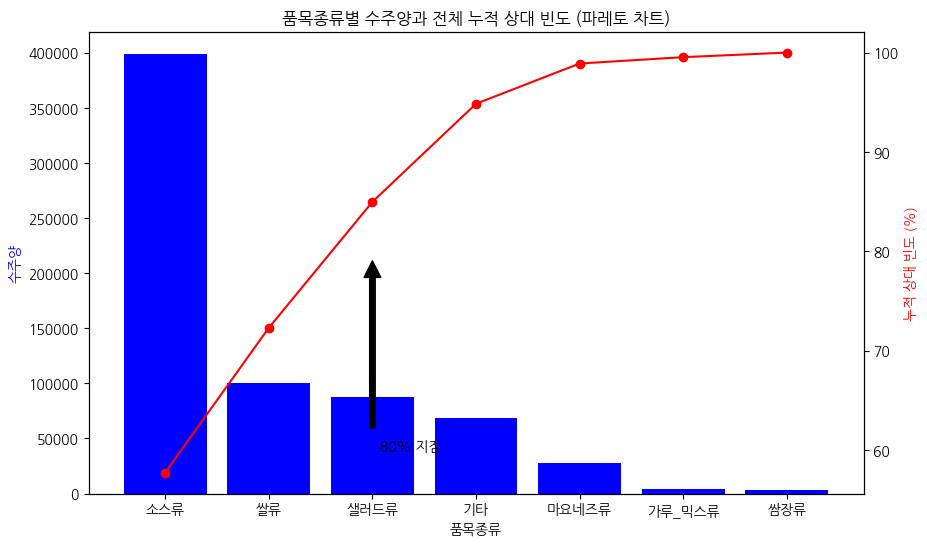

In [69]:
# 품목별 수주양 계산
item_counts = df_booking['품목종류'].value_counts()

# 파레토 차트를 그리기 위해 품목별 수주양을 내림차순으로 정렬
sorted_item_counts = item_counts.sort_values(ascending=False)

# 누적 상대 빈도 계산
cumulative_percentage = sorted_item_counts.cumsum() / sorted_item_counts.sum() * 100

# 파레토 차트 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대 그래프
ax1.bar(sorted_item_counts.index, sorted_item_counts, color='b')

# 누적 상대 빈도 라인 그래프
ax2 = ax1.twinx()
ax2.plot(sorted_item_counts.index, cumulative_percentage, color='r', marker='o', linestyle='-')

# 축 설정
ax1.set_xlabel('품목종류')
ax1.set_ylabel('수주양', color='b')
ax2.set_ylabel('누적 상대 빈도 (%)', color='r')

# 그래프 타이틀 설정
plt.title('품목종류별 수주양과 전체 누적 상대 빈도 (파레토 차트)')

# 누적 상대 빈도가 80% 이상인 지점을 찾아서 화살표로 표시
index_80 = cumulative_percentage[cumulative_percentage >= 80].index[0]
ax2.annotate('  80% 지점', xy=(index_80, 80), xytext=(index_80, 60),
             arrowprops=dict(facecolor='black', shrink=0.05))

# x축 라벨 회전
plt.xticks(rotation=45)

plt.show()


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 프레임 df_booking이 주어진 상태에서 연도별 파레토 차트 데이터를 준비합니다.

# 2열 5행의 서브플롯을 위한 준비입니다만, 실제 그래프는 그리지 않고 데이터만 준비합니다.
for year in range(2019, 2024):
    # 현재 연도 데이터 필터링
    df_year = df_booking[df_booking['연도'] == year]
    
    # 전체 수주양 계산
    total_item_counts = df_year['품목종류'].value_counts().sort_values(ascending=False)
    cumulative_total_percentage = total_item_counts.cumsum() / total_item_counts.sum() * 100

    # 출하완료되지 않은 품목별 수주양 계산
    item_counts_n = df_year[df_year['출하완료여부'] == 'N']['품목종류'].value_counts().sort_values(ascending=False)
    cumulative_percentage_n = item_counts_n.cumsum() / item_counts_n.sum() * 100

    # 출하미완료 수주양과 전체 수주양의 비율 계산
    ratio_n = (item_counts_n / total_item_counts).fillna(0) * 100
    cumulative_ratio_n = ratio_n.sort_values(ascending=False).cumsum()

    # 연도별 결과 출력 (실제 환경에서는 이 데이터를 저장하거나 다른 분석에 사용합니다.)
    print(f"{year}년 데이터:")
    print("전체 수주양:")
    print(cumulative_total_percentage)
    print("출하미완료 수주양:")
    print(cumulative_percentage_n)
    print("출하미완료/전체 비율:")
    print(cumulative_ratio_n)
    print("\n")


2019년 데이터:
전체 수주양:
소스류        60.476766
쌀류         76.359379
샐러드류       88.426326
기타         95.526957
마요네즈류      99.714977
가루_믹스류     99.996161
쌈장류       100.000000
Name: 품목종류, dtype: float64
출하미완료 수주양:
Series([], Name: 품목종류, dtype: float64)
출하미완료/전체 비율:
소스류       0.0
쌀류        0.0
샐러드류      0.0
기타        0.0
마요네즈류     0.0
가루_믹스류    0.0
쌈장류       0.0
Name: 품목종류, dtype: float64


2020년 데이터:
전체 수주양:
소스류        58.198079
쌀류         74.939365
샐러드류       87.782752
기타         95.300887
마요네즈류      99.813218
가루_믹스류     99.997770
쌈장류       100.000000
Name: 품목종류, dtype: float64
출하미완료 수주양:
Series([], Name: 품목종류, dtype: float64)
출하미완료/전체 비율:
소스류       0.0
쌀류        0.0
샐러드류      0.0
기타        0.0
마요네즈류     0.0
가루_믹스류    0.0
쌈장류       0.0
Name: 품목종류, dtype: float64


2021년 데이터:
전체 수주양:
소스류        57.527161
쌀류         72.856756
샐러드류       85.024651
기타         94.405961
마요네즈류      98.416611
가루_믹스류     99.216485
쌈장류       100.000000
Name: 품목종류, dtype: float64
출하미완료 수주양:
소스류        64.564275
샐러드류     

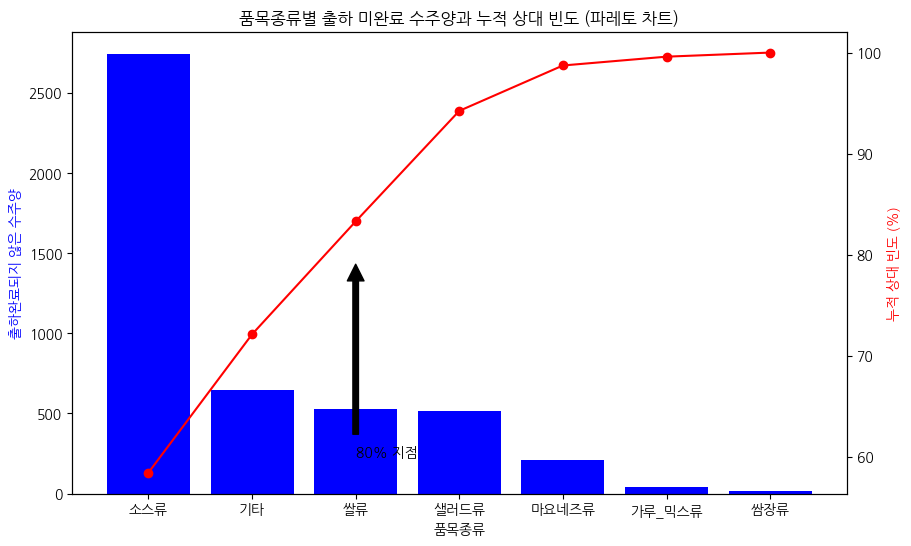

In [71]:
# 품목별 출하 미완료 빈도의 파레토 차트

# '출하완료여부'가 'N'인 품목별 수주양 계산
item_counts_n = df_booking[df_booking['출하완료여부'] == 'N']['품목종류'].value_counts()

# 품목별 수주양을 내림차순으로 정렬
sorted_item_counts_n = item_counts_n.sort_values(ascending=False)

# 누적 상대 빈도 계산
cumulative_percentage_n = sorted_item_counts_n.cumsum() / sorted_item_counts_n.sum() * 100

# 파레토 차트 그리기 준비
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대 그래프 - 출하완료되지 않은 품목별 수주양
ax1.bar(sorted_item_counts_n.index, sorted_item_counts_n, color='b')
ax1.set_xlabel('품목종류')
ax1.set_ylabel('출하완료되지 않은 수주양', color='b')

# 라인 그래프 - 누적 상대 빈도
ax2 = ax1.twinx()
ax2.plot(sorted_item_counts_n.index, cumulative_percentage_n, color='r', marker='o', linestyle='-')
ax2.set_ylabel('누적 상대 빈도 (%)', color='r')

# 그래프 타이틀 및 기타 설정
plt.title('품목종류별 출하 미완료 수주양과 누적 상대 빈도 (파레토 차트)')
plt.xticks(rotation=45)

# 누적 상대 빈도가 80% 이상인 지점 표시
index_80_n = cumulative_percentage_n[cumulative_percentage_n >= 80].index[0]
ax2.annotate('80% 지점', xy=(index_80_n, 80), xytext=(index_80_n, 60),
             arrowprops=dict(facecolor='black', shrink=0.05))

# 차트 표시
plt.show()


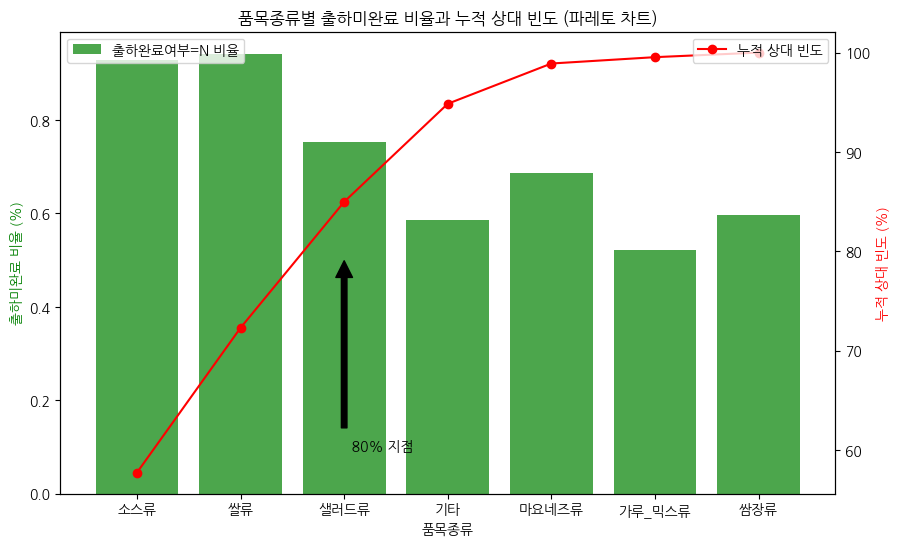

In [72]:
# 품목별 수주양 계산
item_counts = df_booking['품목종류'].value_counts()

# 파레토 차트를 그리기 위해 품목별 수주양을 내림차순으로 정렬
sorted_item_counts = item_counts.sort_values(ascending=False)

# '출하완료여부'가 'N'인 수주 양 계산
item_counts_n = df_booking[df_booking['출하완료여부'] == 'N']['품목종류'].value_counts()

# 전체 수주 양 계산
total_item_counts = df_booking['품목종류'].value_counts()

# '출하완료여부'가 'N'인 수주 비율 계산
ratio_n = (item_counts_n / total_item_counts) * 100

# 누적 상대 빈도 계산
cumulative_percentage = sorted_item_counts.cumsum() / sorted_item_counts.sum() * 100

# 파레토 차트 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대 그래프
ax1.bar(sorted_item_counts.index, ratio_n, color='g', alpha=0.7, label='출하완료여부=N 비율')

# 누적 상대 빈도 라인 그래프
ax2 = ax1.twinx()
ax2.plot(sorted_item_counts.index, cumulative_percentage, color='r', marker='o', linestyle='-', label='누적 상대 빈도')

# 축 설정
ax1.set_xlabel('품목종류')
ax1.set_ylabel('출하미완료 비율 (%)', color='g')
ax2.set_ylabel('누적 상대 빈도 (%)', color='r')

# 그래프 타이틀 설정
plt.title('품목종류별 출하미완료 비율과 누적 상대 빈도 (파레토 차트)')

# 누적 상대 빈도가 80% 이상인 지점을 찾아서 화살표로 표시
index_80 = cumulative_percentage[cumulative_percentage >= 80].index[0]
ax2.annotate('  80% 지점', xy=(index_80, 80), xytext=(index_80, 60),
             arrowprops=dict(facecolor='black', shrink=0.05))

# 범례 표시
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# x축 라벨 회전
plt.xticks(rotation=45)

plt.show()


In [ ]:
# 2022-2023에 대해서만



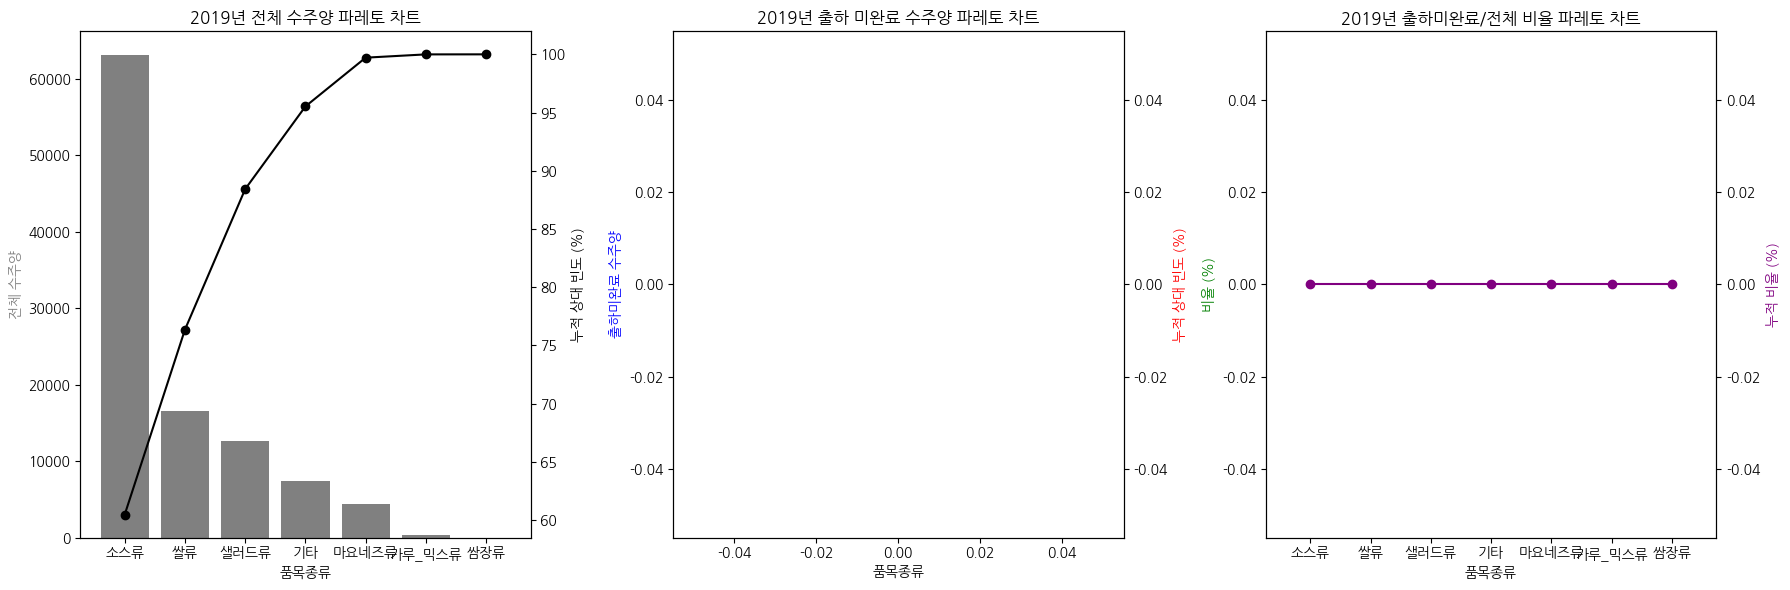

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# 2019년 데이터 필터링
df_2019 = df_booking[df_booking['연도'] == 2019]

# 전체 품목별 수주양 계산
total_item_counts_2019 = df_2019['품목종류'].value_counts().sort_values(ascending=False)
cumulative_total_percentage_2019 = total_item_counts_2019.cumsum() / total_item_counts_2019.sum() * 100

# 출하완료되지 않은 품목별 수주양 계산
item_counts_n_2019 = df_2019[df_2019['출하완료여부'] == 'N']['품목종류'].value_counts().sort_values(ascending=False)
cumulative_percentage_n_2019 = item_counts_n_2019.cumsum() / item_counts_n_2019.sum() * 100

# 비율 계산
ratio_n_2019 = (item_counts_n_2019 / total_item_counts_2019).fillna(0) * 100
sorted_ratio_n_2019 = ratio_n_2019.sort_values(ascending=False)
cumulative_ratio_n_2019 = sorted_ratio_n_2019.cumsum()

# 그래프 그리기
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# 전체 수주양 파레토 차트
ax1.bar(total_item_counts_2019.index, total_item_counts_2019, color='gray')
ax1_twin = ax1.twinx()
ax1_twin.plot(total_item_counts_2019.index, cumulative_total_percentage_2019, color='black', marker='o', linestyle='-')
ax1.set_title('2019년 전체 수주양 파레토 차트')
ax1.set_xlabel('품목종류')
ax1.set_ylabel('전체 수주양', color='gray')
ax1_twin.set_ylabel('누적 상대 빈도 (%)', color='black')

# 출하미완료 수주양 파레토 차트
ax2.bar(item_counts_n_2019.index, item_counts_n_2019, color='b')
ax2_twin = ax2.twinx()
ax2_twin.plot(item_counts_n_2019.index, cumulative_percentage_n_2019, color='r', marker='o', linestyle='-')
ax2.set_title('2019년 출하 미완료 수주양 파레토 차트')
ax2.set_xlabel('품목종류')
ax2.set_ylabel('출하미완료 수주양', color='b')
ax2_twin.set_ylabel('누적 상대 빈도 (%)', color='r')

# 출하미완료/전체 비율 파레토 차트
ax3.bar(sorted_ratio_n_2019.index, sorted_ratio_n_2019, color='g')
ax3_twin = ax3.twinx()
ax3_twin.plot(sorted_ratio_n_2019.index, cumulative_ratio_n_2019, color='purple', marker='o', linestyle='-')
ax3.set_title('2019년 출하미완료/전체 비율 파레토 차트')
ax3.set_xlabel('품목종류')
ax3.set_ylabel('비율 (%)', color='g')
ax3_twin.set_ylabel('누적 비율 (%)', color='purple')

plt.tight_layout()
plt.show()


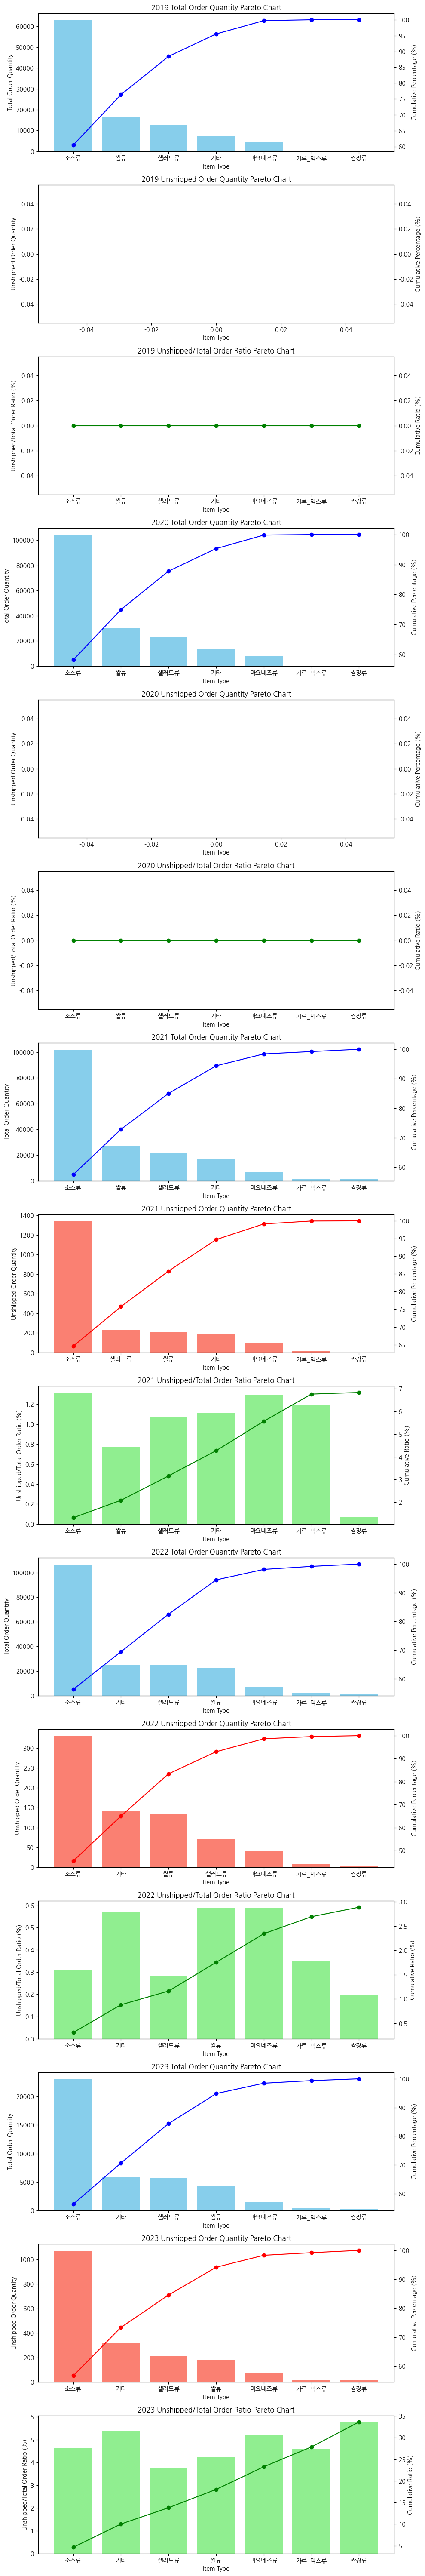

In [74]:
import matplotlib.pyplot as plt

# 5년 간의 데이터에 대해 각각의 파레토 차트를 그립니다.
fig, axs = plt.subplots(15, 1, figsize=(10, 60))  # 5년 * 3종류 데이터 = 15개 차트

for i, year in enumerate(range(2019, 2024)):
    df_year = df_booking[df_booking['연도'] == year]

    # 전체 품목별 수주양 계산 및 정렬
    total_item_counts_year = df_year['품목종류'].value_counts().sort_values(ascending=False)
    cumulative_total_percentage_year = total_item_counts_year.cumsum() / total_item_counts_year.sum() * 100

    # 출하미완료 품목별 수주양 계산 및 정렬
    item_counts_n_year = df_year[df_year['출하완료여부'] == 'N']['품목종류'].value_counts().sort_values(ascending=False)
    cumulative_percentage_n_year = item_counts_n_year.cumsum() / item_counts_n_year.sum() * 100

    # 출하미완료 비율 계산
    ratio_n_year = (item_counts_n_year.reindex(total_item_counts_year.index).fillna(0) / total_item_counts_year) * 100
    cumulative_ratio_n_year = ratio_n_year.cumsum()

    # 전체 수주양 파레토 차트
    ax = axs[i * 3]
    ax.bar(total_item_counts_year.index, total_item_counts_year, color='skyblue')
    ax.set_title(f'{year} Total Order Quantity Pareto Chart')
    ax.set_xlabel('Item Type')
    ax.set_ylabel('Total Order Quantity')
    ax2 = ax.twinx()
    ax2.plot(total_item_counts_year.index, cumulative_total_percentage_year, color='blue', marker='o', linestyle='-')
    ax2.set_ylabel('Cumulative Percentage (%)')

    # 출하미완료 수주양 파레토 차트
    ax = axs[i * 3 + 1]
    ax.bar(item_counts_n_year.index, item_counts_n_year, color='salmon')
    ax.set_title(f'{year} Unshipped Order Quantity Pareto Chart')
    ax.set_xlabel('Item Type')
    ax.set_ylabel('Unshipped Order Quantity')
    ax2 = ax.twinx()
    ax2.plot(item_counts_n_year.index, cumulative_percentage_n_year, color='red', marker='o', linestyle='-')
    ax2.set_ylabel('Cumulative Percentage (%)')

    # 출하미완료/전체 비율 파레토 차트
    ax = axs[i * 3 + 2]
    ax.bar(ratio_n_year.index, ratio_n_year, color='lightgreen')
    ax.set_title(f'{year} Unshipped/Total Order Ratio Pareto Chart')
    ax.set_xlabel('Item Type')
    ax.set_ylabel('Unshipped/Total Order Ratio (%)')
    ax2 = ax.twinx()
    ax2.plot(ratio_n_year.index, cumulative_ratio_n_year, color='green', marker='o', linestyle='-')
    ax2.set_ylabel('Cumulative Ratio (%)')

plt.tight_layout()
plt.show()


2019,2020년에는 미출하완료된 제품이 없다. 수주양은 소스, 쌀류, 샐러드류 순으로 2021년까지 많다. \
2021년 전체 수주양은 소스류, 쌀류, 샐러드류 순이었지만 수주미출하수는 소스류, 마요네즈류, 쌀류 순으로 많다. \
2022년 전체 수주양은 소스류, 기타, 샐러드류 순이었지만 수주미출하수는 소스류, 기타, 쌀류 순으로 많다. \
2023년 전체 수주양은 소스류, 기타, 샐러드류 순이었지만 수주미출하수는 소스류, 기타, 샐러드류 순으로 많다.\
-> 2022년 이후 기타의 수출미출하수의 순위가 증가했다. -> 기존 수주 제품과 다른 기타 제품 생산이 증가하면서 해당 기타 제품에서의 수주미출하수가 증가했다고 추정.\
기존 0.6% 미만이었던 2022년의 수주미출하율과 비교했을 때, 2023년 수주미출하율은 모두 4% 이상인 것을 확인할 수 있었다.

In [76]:
other_item_codes = df_booking[df_booking['품목종류'] == '기타']['수주품목코드'].nunique()
print(other_item_codes)


607


/tmp/ipykernel_13291/625151397.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_item_counts_year = total_item_counts_year.drop('기타', errors='ignore').append(total_item_counts_year.filter(items=['기타']))
/tmp/ipykernel_13291/625151397.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  item_counts_n_year = item_counts_n_year.drop('기타', errors='ignore').append(item_counts_n_year.filter(items=['기타']))
/tmp/ipykernel_13291/625151397.py:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_ratio_n_year = sorted_ratio_n_year.drop('기타', errors='ignore').append(sorted_ratio_n_year.filter(items=['기타']))
/tmp/ipykernel_13291/625151397.py:12: FutureWarning: The series.append method is deprecated and will be removed fro

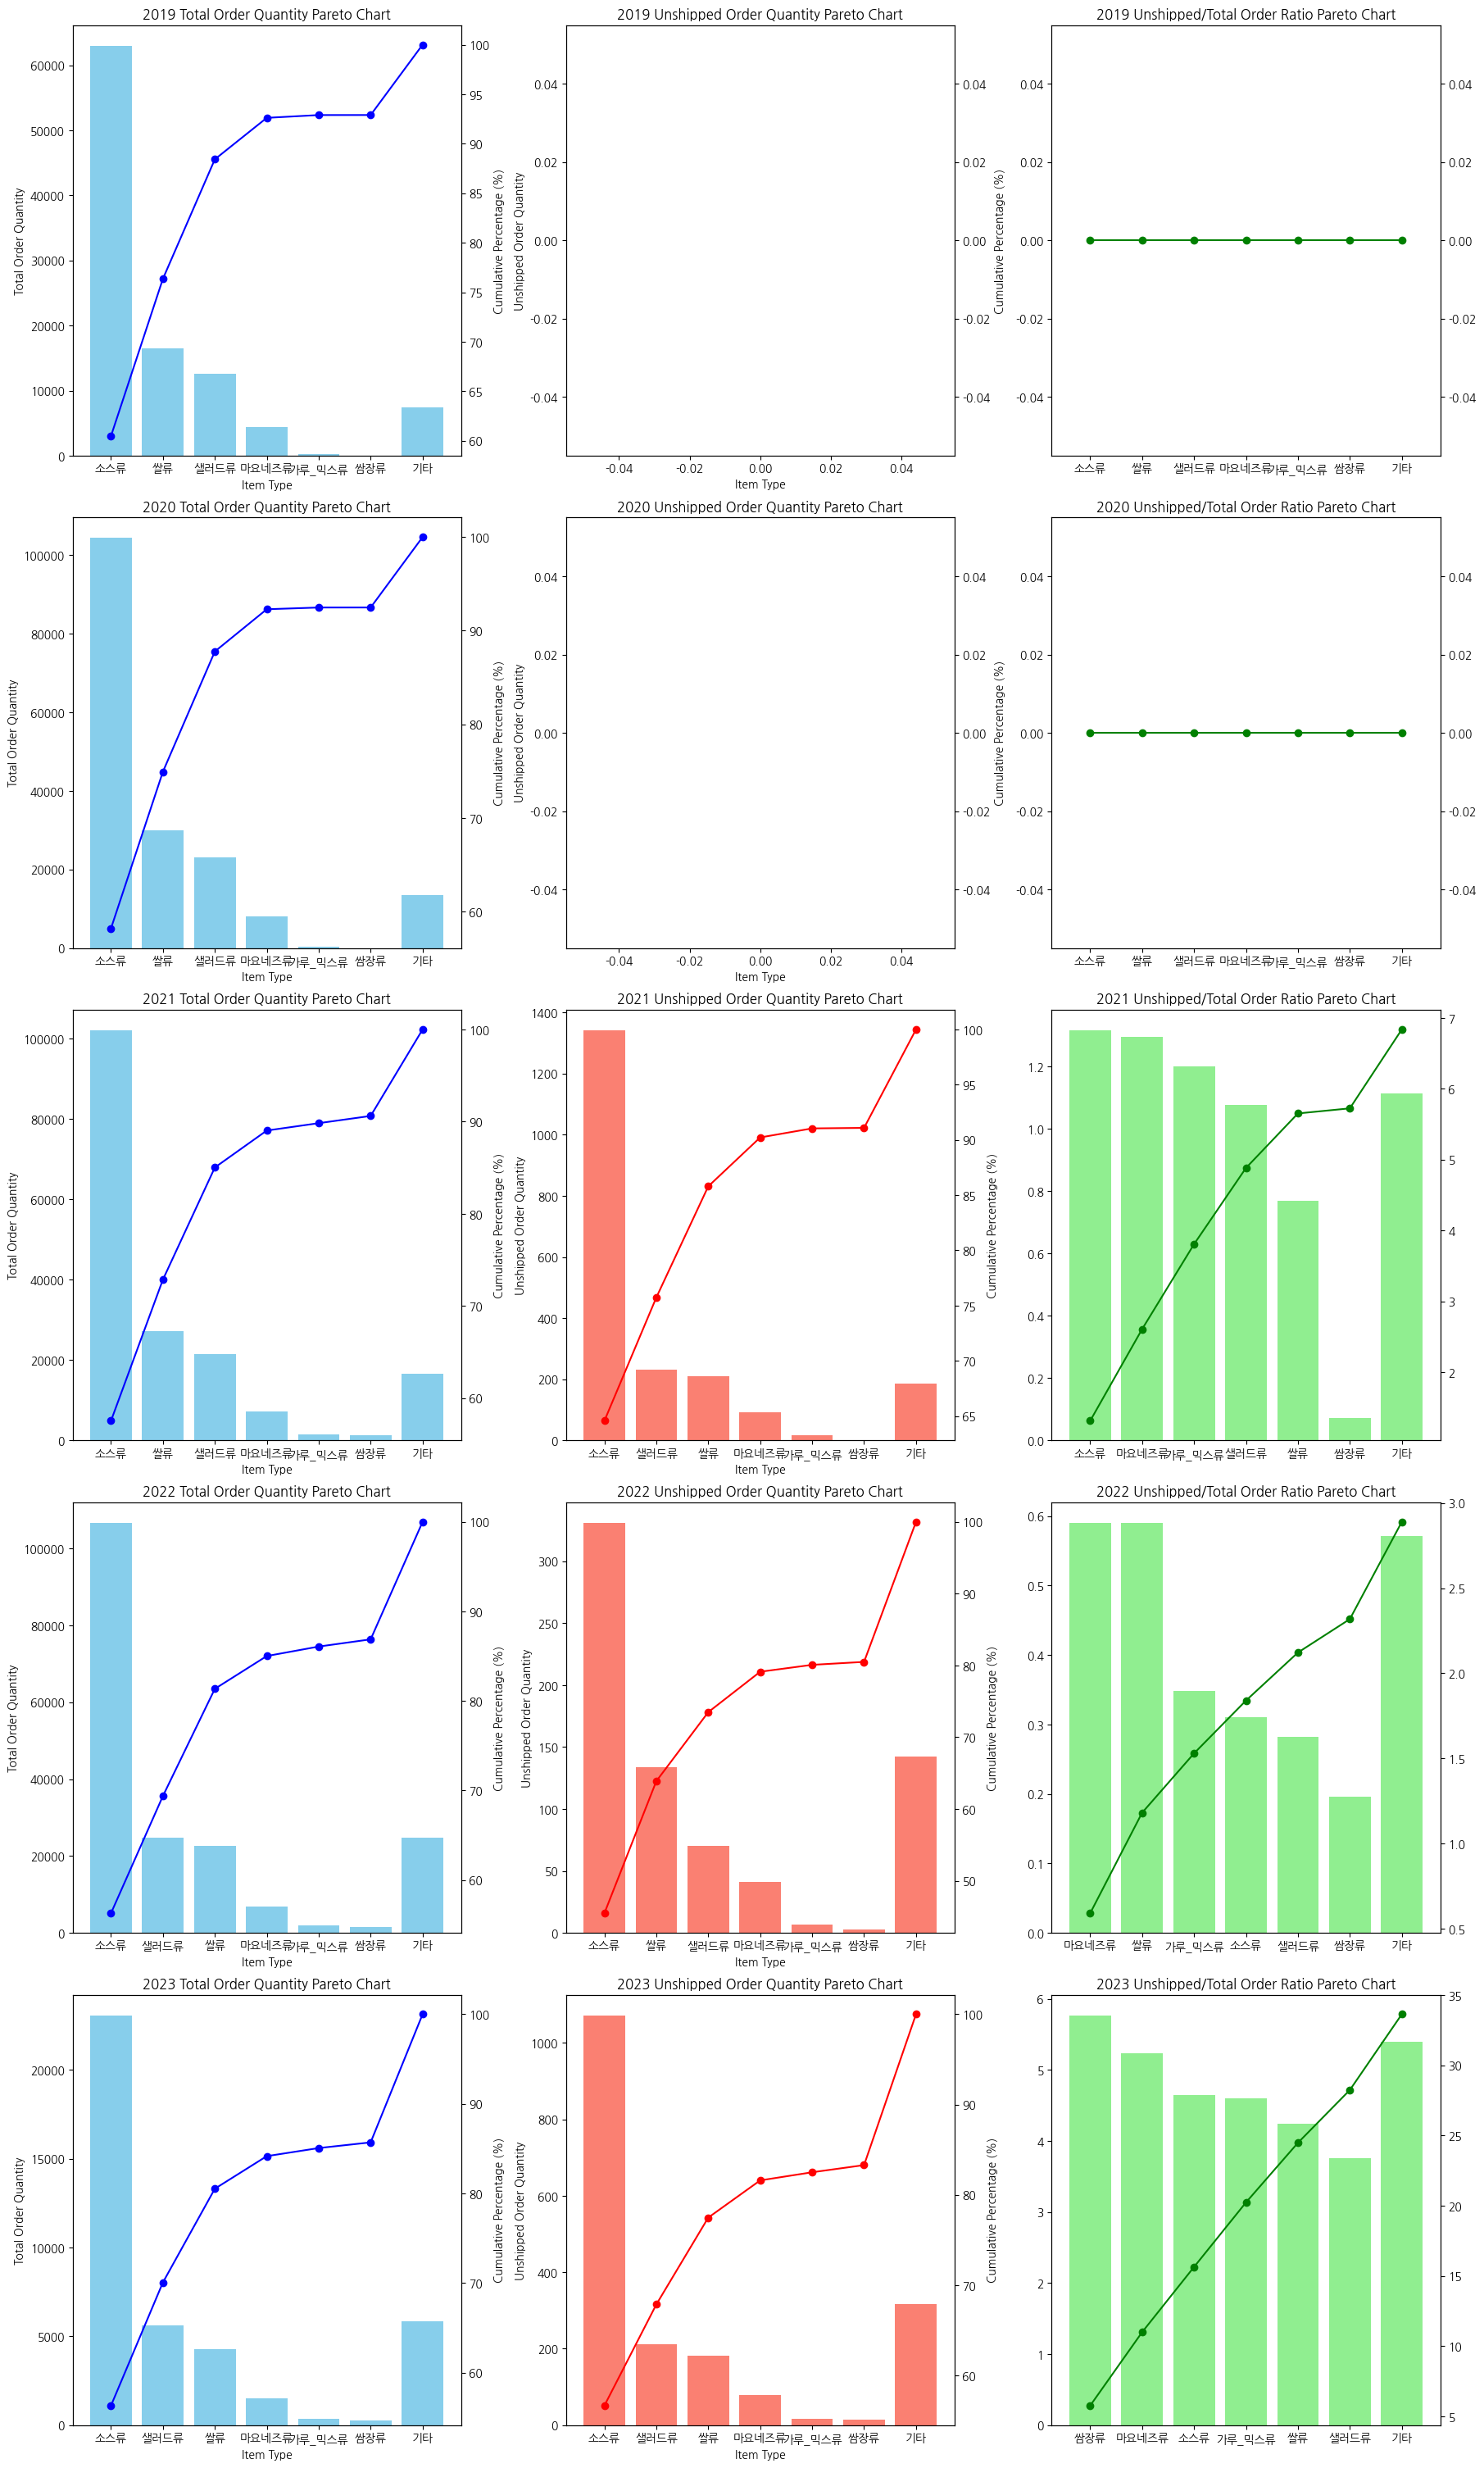

In [91]:
import matplotlib.pyplot as plt

# 5년 간의 데이터에 대해 각각의 파레토 차트를 그립니다. 이번에는 5행 3열로 구성합니다.
fig, axs = plt.subplots(5, 3, figsize=(18, 30), constrained_layout=True)

for i, year in enumerate(range(2019, 2024)):
    df_year = df_booking[df_booking['연도'] == year]

    # 전체 품목별 수주양 계산 및 정렬
    total_item_counts_year = df_year['품목종류'].value_counts().sort_values(ascending=False)
    # '기타'를 마지막으로 배치
    total_item_counts_year = total_item_counts_year.drop('기타', errors='ignore').append(total_item_counts_year.filter(items=['기타']))

    cumulative_total_percentage_year = total_item_counts_year.cumsum() / total_item_counts_year.sum() * 100

    # 출하미완료 품목별 수주양 계산 및 정렬
    item_counts_n_year = df_year[df_year['출하완료여부'] == 'N']['품목종류'].value_counts().sort_values(ascending=False)
    # '기타'를 마지막으로 배치
    item_counts_n_year = item_counts_n_year.drop('기타', errors='ignore').append(item_counts_n_year.filter(items=['기타']))

    cumulative_percentage_n_year = item_counts_n_year.cumsum() / item_counts_n_year.sum() * 100

    # 출하미완료 대비 전체 수주양의 비율 계산 및 정렬
    ratio_n_year = (item_counts_n_year.reindex(total_item_counts_year.index).fillna(0) / total_item_counts_year) * 100
    # 비율을 내림차순으로 정렬하지만 '기타'는 마지막에 배치
    sorted_ratio_n_year = ratio_n_year.sort_values(ascending=False)
    sorted_ratio_n_year = sorted_ratio_n_year.drop('기타', errors='ignore').append(sorted_ratio_n_year.filter(items=['기타']))
    cumulative_ratio_n_sorted = sorted_ratio_n_year.cumsum()

    # 각 파레토 차트에 대한 그래프 생성
    ax1 = axs[i, 0]
    ax1.bar(total_item_counts_year.index, total_item_counts_year, color='skyblue')
    ax1_twin = ax1.twinx()
    ax1_twin.plot(total_item_counts_year.index, cumulative_total_percentage_year, color='blue', marker='o', linestyle='-')
    ax1.set_title(f'{year} Total Order Quantity Pareto Chart')
    ax1.set_xlabel('Item Type')
    ax1.set_ylabel('Total Order Quantity')
    ax1_twin.set_ylabel('Cumulative Percentage (%)')

    ax2 = axs[i, 1]
    ax2.bar(item_counts_n_year.index, item_counts_n_year, color='salmon')
    ax2_twin = ax2.twinx()
    ax2_twin.plot(item_counts_n_year.index, cumulative_percentage_n_year, color='red', marker='o', linestyle='-')
    ax2.set_title(f'{year} Unshipped Order Quantity Pareto Chart')
    ax2.set_xlabel('Item Type')
    ax2.set_ylabel('Unshipped Order Quantity')
    ax2_twin.set_ylabel('Cumulative Percentage (%)')

    ax3 = axs[i, 2]
    ax3.bar(sorted_ratio_n_year.index, sorted_ratio_n_year, color='lightgreen')
    ax3_twin = ax3.twinx()
    ax3_twin.plot(sorted_ratio_n_year.index, cumulative_ratio_n_sorted, color='green', marker='o', linestyle='-')
    ax3.set_title(f'{year} Unshipped/Total Order Ratio Pareto Chart')


In [77]:
df_booking[df_booking['품목종류']=='기타']

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,수주단가,수주금액,부가세금액,출하완료여부,납기일자,...,연도,분기,매출액,납기건수,수주월,수주일,수주요일,계절,주말여부,수주요일명
5,20.0,2021-09-30,957,IK0160,57101182,4350.0,348000.0,0,Y,2021-10-01,...,2021,3,348000.0,80.0,9,30,3,가을,평일,목요일
9,60.0,2021-10-03,125,SI0307,59101001,3300.0,120000.0,12000,Y,2021-10-04,...,2021,4,132000.0,40.0,10,3,6,가을,주말,일요일
12,60.0,2021-10-03,130,SI3051,18A03029,6050.0,660000.0,66000,Y,2021-10-04,...,2021,4,726000.0,120.0,10,3,6,가을,주말,일요일
13,60.0,2021-10-03,131,SI3051,18A03002,148500.0,270000.0,27000,Y,2021-10-04,...,2021,4,297000.0,2.0,10,3,6,가을,주말,일요일
18,1.0,2021-10-08,1,IK2137,16D01029,4240.0,4070400.0,407040,Y,2021-10-10,...,2021,4,4477440.0,1056.0,10,8,4,가을,평일,금요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758459,60.0,2023-03-17,117,SI0015,1BS01030,726.0,126720.0,12672,N,2023-03-19,...,2023,1,139392.0,192.0,3,17,4,봄,평일,금요일
758471,60.0,2023-03-17,124,SI0307,59101001,3597.0,26160.0,2616,N,2023-03-19,...,2023,1,28776.0,8.0,3,17,4,봄,평일,금요일
758478,60.0,2023-03-17,129,SI0125,18A03029,7040.0,1920000.0,192000,N,2023-03-20,...,2023,1,2112000.0,300.0,3,17,4,봄,평일,금요일
758481,60.0,2023-03-17,135,SI0125,59101001,3960.0,144000.0,14400,N,2023-03-22,...,2023,1,158400.0,40.0,3,17,4,봄,평일,금요일


In [78]:
# import matplotlib.pyplot as plt

# # 5개 연도에 대한 파레토 차트 생성
# fig, axs = plt.subplots(5, 1, figsize=(10, 30), constrained_layout=True)

# for i, year in enumerate(range(2019, 2024)):
#     # 연도별 데이터 필터링
#     df_year = df_booking[df_booking['연도'] == year]

#     # 품목별 전체 수주양 계산 및 정렬
#     item_counts_year = df_year['품목종류'].value_counts().sort_values(ascending=False)

#     # 누적 상대 빈도 계산
#     cumulative_percentage_year = item_counts_year.cumsum() / item_counts_year.sum() * 100

#     # 파레토 차트 그리기: 막대 그래프
#     ax1 = axs[i]
#     ax1.bar(item_counts_year.index, item_counts_year, color='b', label='전체 수주양')
#     ax1.set_title(f"{year}년 품목종류별 전체 수주양")
#     ax1.set_xlabel("품목종류")
#     ax1.set_ylabel("전체 수주양")

#     # 누적 상대 빈도 라인 그래프
#     ax2 = ax1.twinx()
#     ax2.plot(item_counts_year.index, cumulative_percentage_year, color='r', linestyle='-', marker='o', label='누적 상대 빈도 (%)')
#     ax2.set_ylabel("누적 상대 빈도 (%)")

# plt.show()


In [79]:
# import matplotlib.pyplot as plt

# # 5개 연도에 대한 '수주완료여부'가 'N'인 품목별 수주양 파레토 차트 생성
# fig, axs = plt.subplots(5, 1, figsize=(10, 30), constrained_layout=True)

# for i, year in enumerate(range(2019, 2024)):
#     # 연도별 데이터 필터링 및 '수주완료여부'가 'N'인 데이터 필터링
#     df_year_n = df_booking[(df_booking['연도'] == year) & (df_booking['출하완료여부'] == 'N')]

#     # 품목별 수주양 계산 및 정렬
#     item_counts_n_year = df_year_n['품목종류'].value_counts().sort_values(ascending=False)

#     # 누적 상대 빈도 계산
#     cumulative_percentage_n_year = item_counts_n_year.cumsum() / item_counts_n_year.sum() * 100

#     # 파레토 차트 그리기 준비: 막대 그래프
#     axs[i].bar(item_counts_n_year.index, item_counts_n_year, color='g', label='출하미완료수주양')
#     axs[i].set_title(f"{year}년 품목종류별 출하미완료 수주양")
#     axs[i].set_xlabel("품목종류")
#     axs[i].set_ylabel("수주양")

#     # 누적 상대 빈도 라인 그래프
#     ax2 = axs[i].twinx()
#     ax2.plot(item_counts_n_year.index, cumulative_percentage_n_year, color='r', linestyle='-', marker='o', label='누적 상대 빈도 (%)')
#     ax2.set_ylabel("누적 상대 빈도 (%)")

# plt.tight_layout()
# plt.show()

In [80]:
# booking 2019, 2020의 출하미완료 개수 확인
print(df_booking[(df_booking['연도'] == 2019) & (df_booking['출하완료여부'] == 'N')].count())


print(df_booking[(df_booking['연도'] == 2012) & (df_booking['출하완료여부'] == 'N')].count())


수주사업장        0
수주일자         0
수주일련번호       0
거래처코드        0
수주품목코드       0
수주단가         0
수주금액         0
부가세금액        0
출하완료여부       0
납기일자         0
생산지시         0
납기일수         0
그룹_수주품목코드    0
품목종류         0
납기일수_구간      0
수량           0
연도           0
분기           0
매출액          0
납기건수         0
수주월          0
수주일          0
수주요일         0
계절           0
주말여부         0
수주요일명        0
dtype: int64
수주사업장        0
수주일자         0
수주일련번호       0
거래처코드        0
수주품목코드       0
수주단가         0
수주금액         0
부가세금액        0
출하완료여부       0
납기일자         0
생산지시         0
납기일수         0
그룹_수주품목코드    0
품목종류         0
납기일수_구간      0
수량           0
연도           0
분기           0
매출액          0
납기건수         0
수주월          0
수주일          0
수주요일         0
계절           0
주말여부         0
수주요일명        0
dtype: int64


In [81]:
### 시계열 분석 - df_booking['납기건수']별 수주 주기 예측

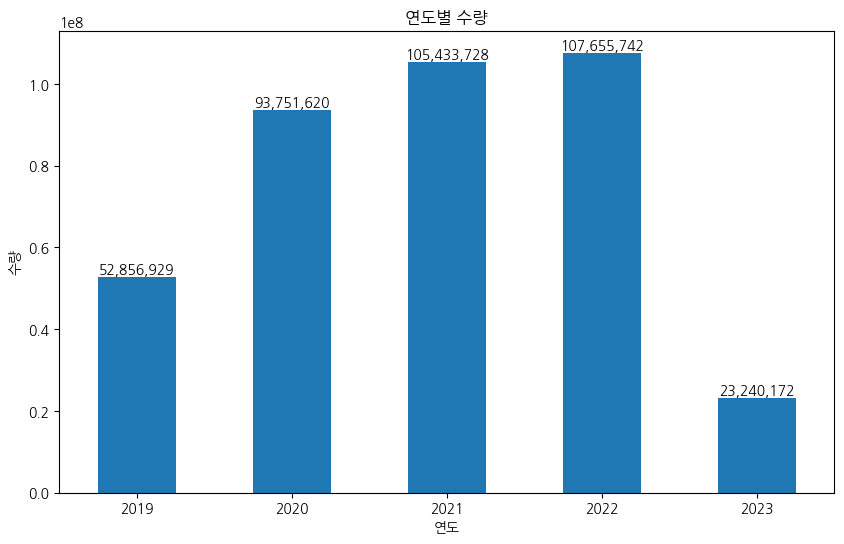

In [82]:
import matplotlib.ticker as ticker

# '연도'별로 그룹화하고 각 그룹별 데이터 개수를 셉니다.
grouped_yearly_count = df_booking.groupby('연도')['수량'].sum()

# 바 그래프 시각화
grouped_yearly_count.plot(kind='bar', figsize=(10, 6))

# 그래프 제목과 축 레이블 설정
plt.title('연도별 수량')
plt.xlabel('연도')
plt.ylabel('수량')

# 각 막대 위에 수량 표시
for index, value in enumerate(grouped_yearly_count):
    plt.text(index, value, format(int(value), ','), ha='center', va='bottom')

# 연도 레이블이 잘 보이도록 회전
plt.xticks(rotation=0)


# 그래프 보여주기
plt.show()


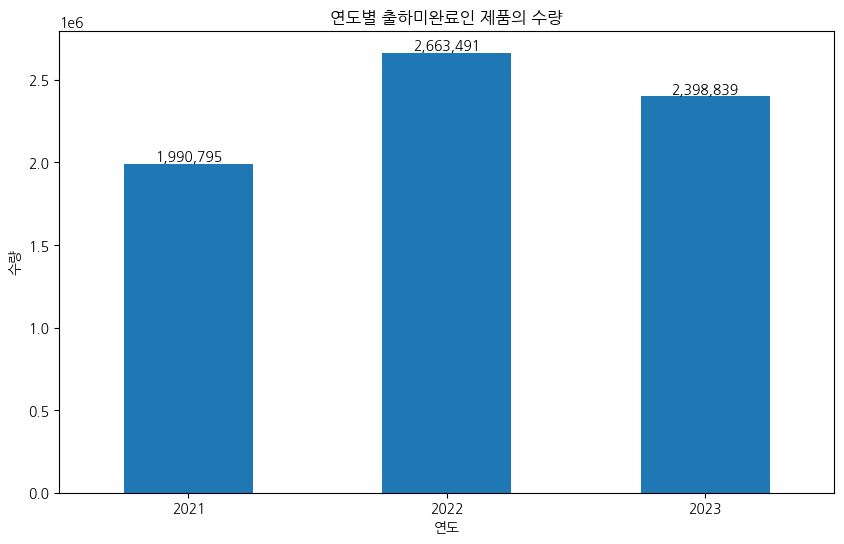

In [83]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# '연도'별로 그룹화하고 '출하완료여부'가 'N'인 각 그룹별 데이터의 수량을 셉니다.
grouped_yearly_n_count = df_booking[df_booking['출하완료여부'] == 'N'].groupby('연도')['수량'].sum()

# 바 그래프 시각화
grouped_yearly_n_count.plot(kind='bar', figsize=(10, 6))

# 그래프 제목과 축 레이블 설정
plt.title('연도별 출하미완료인 제품의 수량')
plt.xlabel('연도')
plt.ylabel('수량')

# 각 막대 위에 수량 표시, 천 단위 구분
for index, value in enumerate(grouped_yearly_n_count):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

# 연도 레이블이 잘 보이도록 회전
plt.xticks(rotation=0)

# 그래프 보여주기
plt.show()


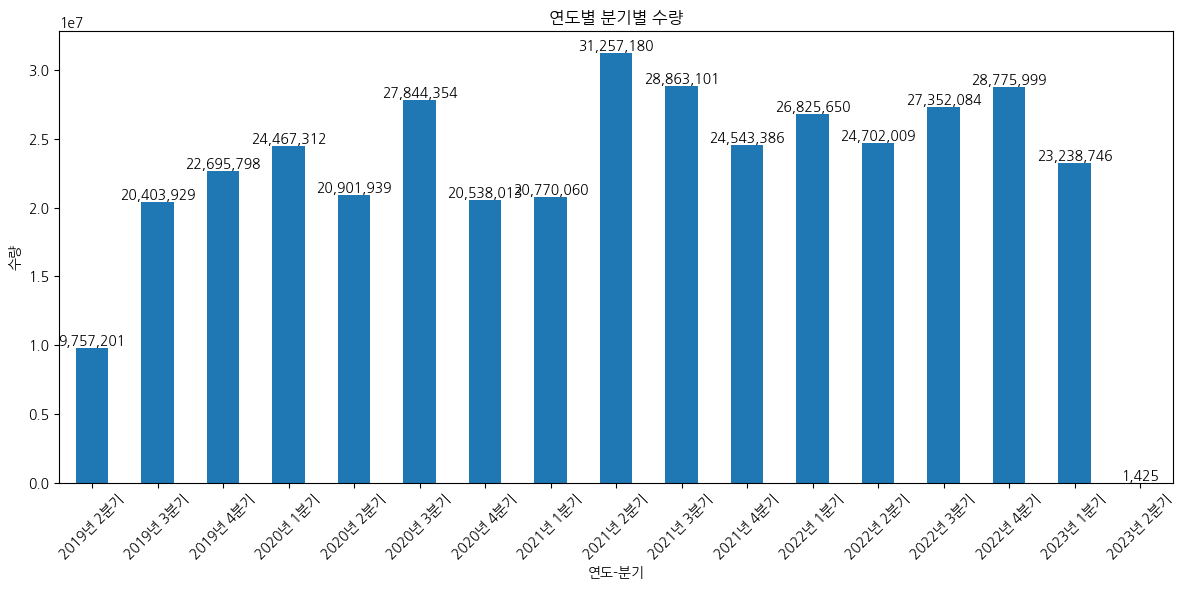

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# 연도와 분기별로 그룹화하고 각 그룹별 데이터 개수를 셉니다.
grouped_quarterly_count = df_booking.groupby(['연도', '분기'])['수량'].sum()

# 바 그래프 시각화
grouped_quarterly_count.plot(kind='bar', figsize=(12, 6))

# 각 막대 위에 수량 표시
for index, value in enumerate(grouped_quarterly_count):
    plt.text(index, value, format(int(value), ','), ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('연도별 분기별 수량')
plt.xlabel('연도-분기')
plt.ylabel('수량')

# x 축 레이블 설정
xticks_labels = [f'{year}년 {quarter}분기' for year, quarter in grouped_quarterly_count.index]
plt.xticks(range(len(xticks_labels)), xticks_labels, rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()


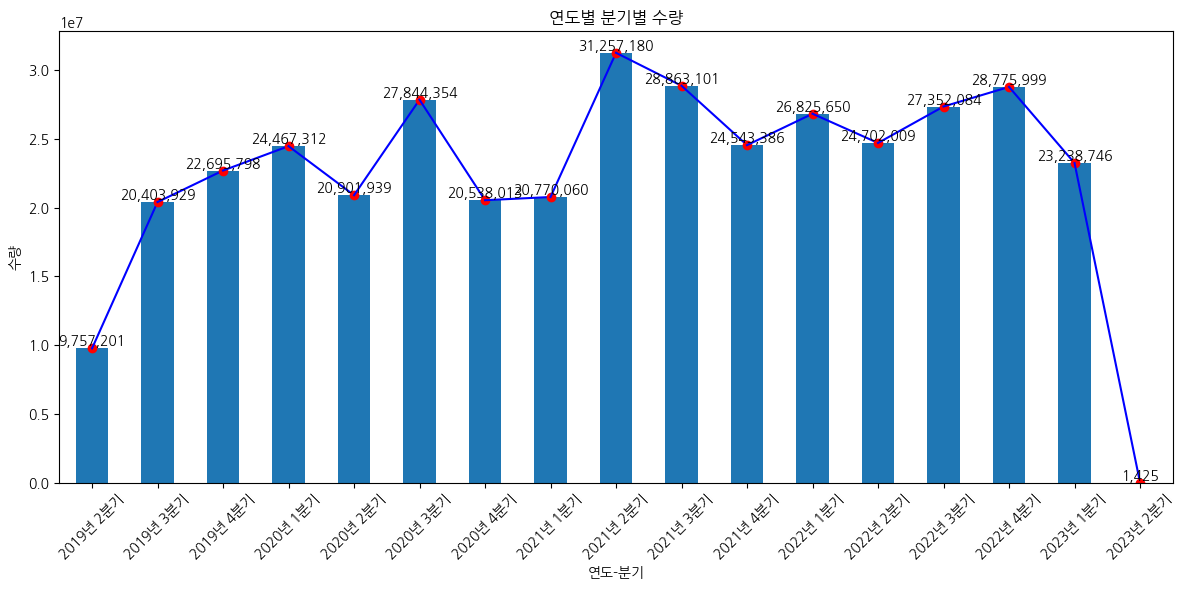

In [85]:
# 연도와 분기별로 그룹화하고 각 그룹별 데이터 개수를 셉니다.
grouped_quarterly_count = df_booking.groupby(['연도', '분기'])['수량'].sum()

# 바 그래프 시각화
grouped_quarterly_count.plot(kind='bar', figsize=(12, 6))

# 각 막대 위에 수량 표시
for index, value in enumerate(grouped_quarterly_count):
    plt.text(index, value, format(int(value), ','), ha='center', va='bottom')

# 각 바의 상단 중앙에 점 찍기 및 연결하는 선 그리기
for index, (label, value) in enumerate(grouped_quarterly_count.items()):
    plt.plot(index, value, 'o', color='red')  # 바의 상단 중앙에 점 찍기
    if index < len(grouped_quarterly_count) - 1:
        plt.plot([index, index + 1], [value, grouped_quarterly_count.iloc[index + 1]], color='blue')  # 선 그리기

# 그래프 제목과 축 레이블 설정
plt.title('연도별 분기별 수량')
plt.xlabel('연도-분기')
plt.ylabel('수량')

# x 축 레이블 설정
xticks_labels = [f'{year}년 {quarter}분기' for year, quarter in grouped_quarterly_count.index]
plt.xticks(range(len(xticks_labels)), xticks_labels, rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [86]:
# 나중에 시계열 분석

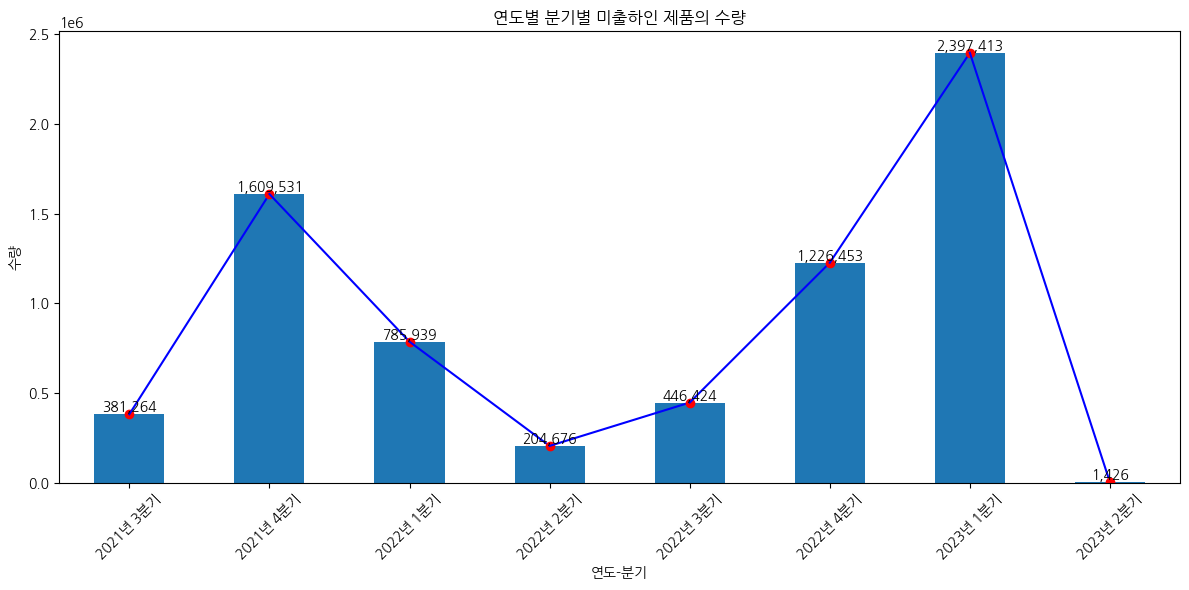

In [87]:
# '출하완료여부'가 'N'인 경우의 그룹별 수량 계산
grouped_n_quantity = df_booking[df_booking['출하완료여부'] == 'N'].groupby(['연도', '분기'])['수량'].sum()

# 데이터로 바 그래프 시각화
grouped_n_quantity.plot(kind='bar', figsize=(12, 6))

# 각 막대 위에 수량 표시 (천 단위 구분, 소수점 없음)
for index, value in enumerate(grouped_n_quantity):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

# 각 바의 상단 중앙에 점 찍기 및 연결하는 선 그리기
indices = list(range(len(grouped_n_quantity)))
for index, value in zip(indices, grouped_n_quantity):
    plt.plot(index, value, 'o', color='red')
    if index < indices[-1]:
        next_index = indices[indices.index(index) + 1]
        next_value = grouped_n_quantity.iloc[indices.index(index) + 1]
        plt.plot([index, next_index], [value, next_value], color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('연도별 분기별 미출하인 제품의 수량')
plt.xlabel('연도-분기')
plt.ylabel('수량')

# x 축 레이블 설정
xticks_labels = [f'{year}년 {quarter}분기' for year, quarter in grouped_n_quantity.index]
plt.xticks(indices, xticks_labels, rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()

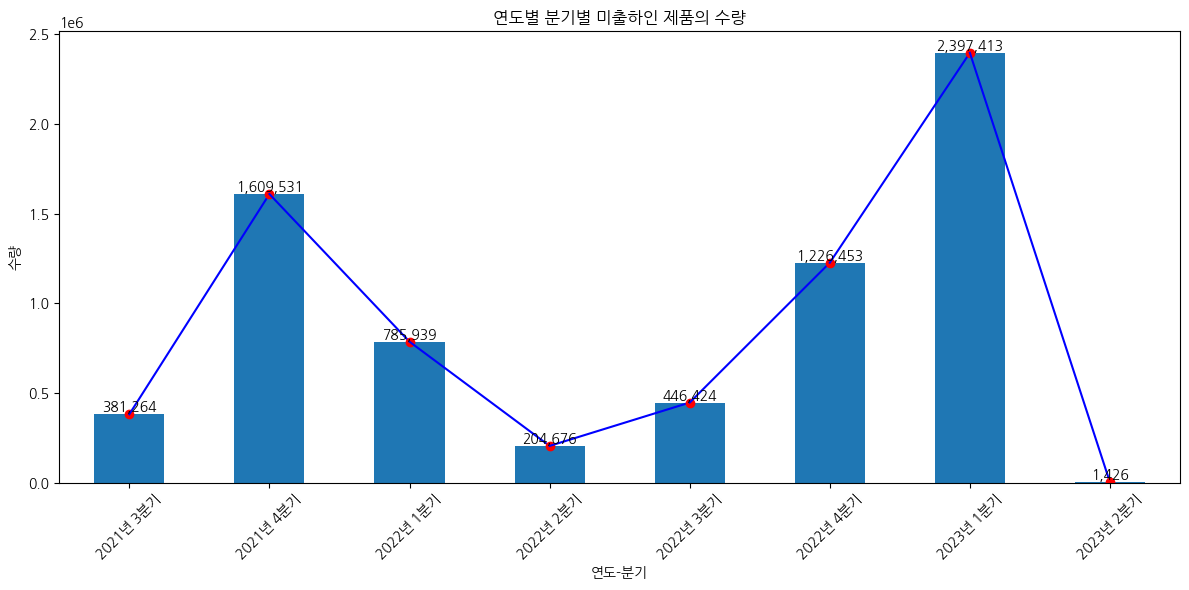

In [88]:
# '출하완료여부'가 'N'인 경우의 그룹별 수량 계산
grouped_n_quantity = df_booking[df_booking['출하완료여부'] == 'N'].groupby(['연도', '분기'])['수량'].sum()

# 데이터로 바 그래프 시각화
grouped_n_quantity.plot(kind='bar', figsize=(12, 6))

# 각 막대 위에 수량 표시 (천 단위 구분, 소수점 없음)
for index, value in enumerate(grouped_n_quantity):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

# 각 바의 상단 중앙에 점 찍기 및 연결하는 선 그리기
indices = list(range(len(grouped_n_quantity)))
for index, value in zip(indices, grouped_n_quantity):
    plt.plot(index, value, 'o', color='red')
    if index < indices[-1]:
        next_index = indices[indices.index(index) + 1]
        next_value = grouped_n_quantity.iloc[indices.index(index) + 1]
        plt.plot([index, next_index], [value, next_value], color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('연도별 분기별 미출하인 제품의 수량')
plt.xlabel('연도-분기')
plt.ylabel('수량')

# x 축 레이블 설정
xticks_labels = [f'{year}년 {quarter}분기' for year, quarter in grouped_n_quantity.index]
plt.xticks(indices, xticks_labels, rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()

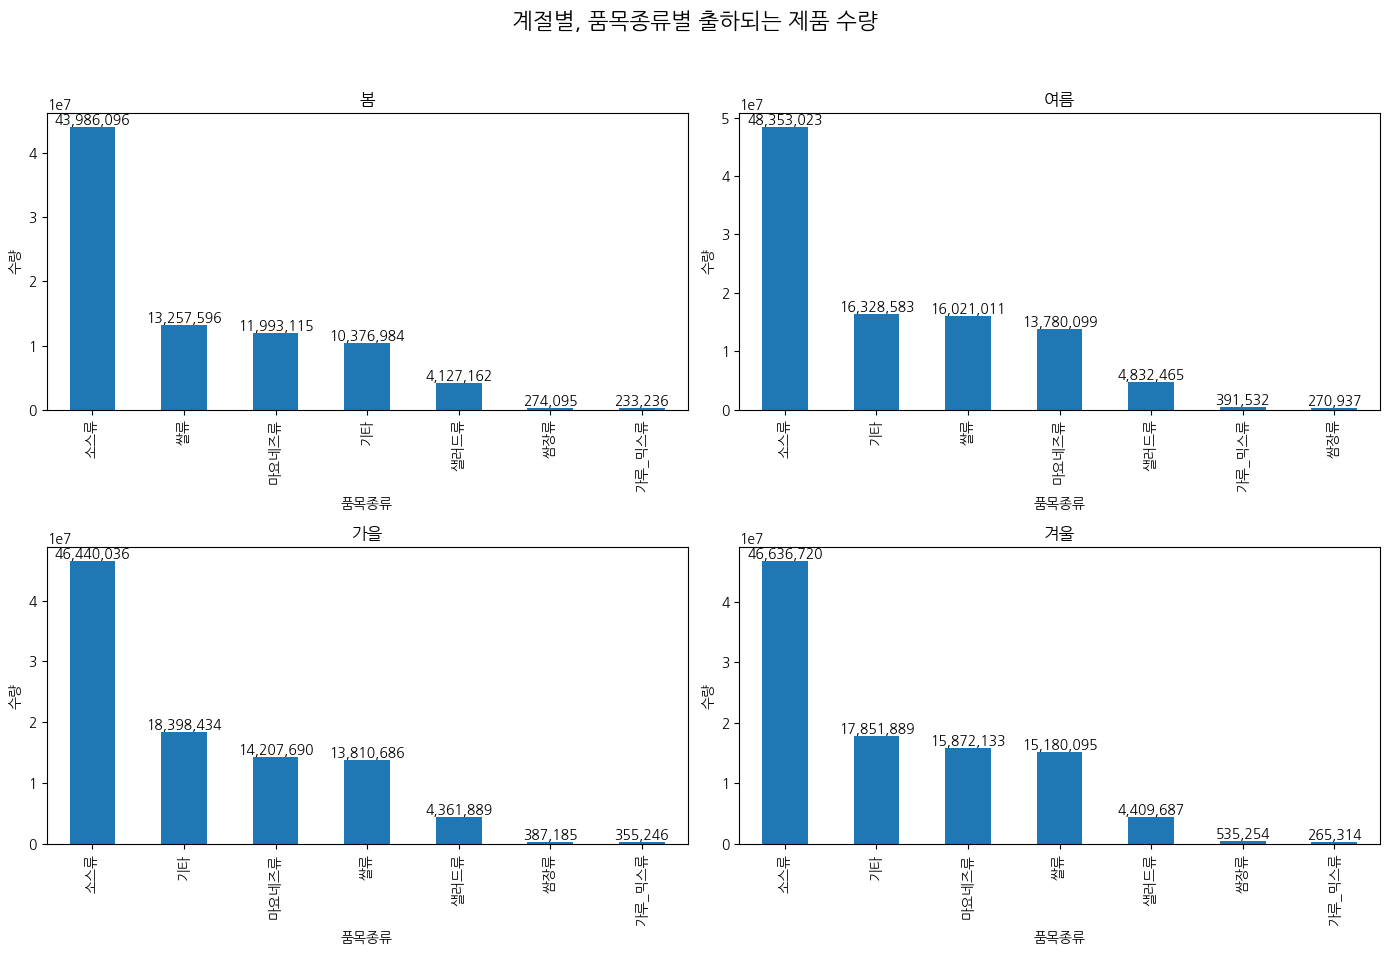

In [89]:

# 계절 리스트
seasons = ['봄', '여름', '가을', '겨울']

# 계절별, 품목종류별 출하완료여부가 N인 제품의 수량을 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('계절별, 품목종류별 출하되는 제품 수량', fontsize=16)

for i, season in enumerate(seasons):
    # 해당 계절의 데이터 필터링
    seasonal_data = df_booking[df_booking['계절'] == season]
    
    # 품목종류별 수량 계산 및 내림차순 정렬
    item_quantity = seasonal_data.groupby('품목종류')['수량'].sum().sort_values(ascending=False)
    
    # 그래프 그리기
    ax = axes[i // 2, i % 2]
    item_quantity.plot(kind='bar', ax=ax)
    
    # 각 막대 위에 수량 표시, 천 단위 구분 및 소수점 제거
    for index, value in enumerate(item_quantity):
        ax.text(index, value, f'{value:,.0f}', ha='center', va='bottom')
    
    ax.set_title(f'{season}')
    ax.set_xlabel('품목종류')
    ax.set_ylabel('수량')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [90]:
import matplotlib.pyplot as plt

# 비율이 0보다 크고 1보다 작은 데이터만 필터링
grouped_ratio_filtered = grouped_ratio[(grouped_ratio > 0) & (grouped_ratio < 1)]

# 필터링된 데이터로 바 그래프 시각화
grouped_ratio_filtered.plot(kind='bar', figsize=(12, 6))

# 각 막대 위에 비율 표시 (필터링된 데이터에 대해)
for index, value in enumerate(grouped_ratio_filtered):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')

# 각 바의 상단 중앙에 점 찍기 및 연결하는 선 그리기 (필터링된 데이터에 대해)
indices = list(range(len(grouped_ratio_filtered)))
for index, value in zip(indices, grouped_ratio_filtered):
    plt.plot(index, value, 'o', color='red')
    if index < indices[-1]:  # 마지막 인덱스가 아닌 경우에만
        next_index = indices[indices.index(index) + 1]
        next_value = grouped_ratio_filtered.iloc[indices.index(index) + 1]
        plt.plot([index, next_index], [value, next_value], color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('연도별 분기별 출하하지 않은 제품 비율 (0% 및 100% 구간 제외)')
plt.xlabel('연도-분기')
plt.ylabel('비율')

# x 축 레이블 설정 (필터링된 데이터에 대해)
xticks_labels = [f'{year}년 {quarter}분기' for year, quarter in grouped_ratio_filtered.index]
plt.xticks(indices, xticks_labels, rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()


NameError: name 'grouped_ratio' is not defined

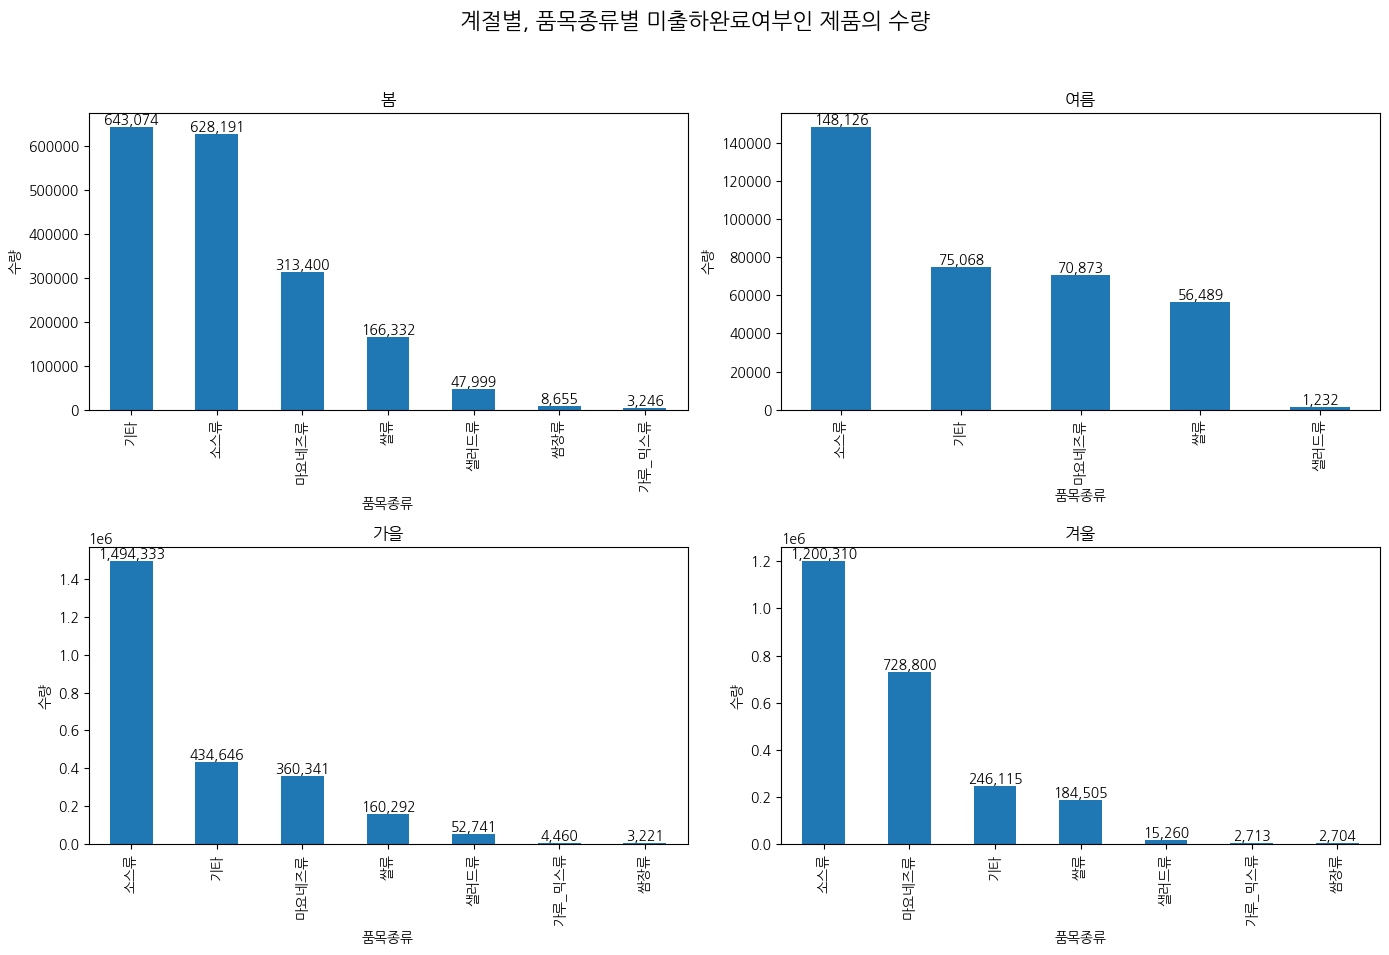

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# 계절 리스트
seasons = ['봄', '여름', '가을', '겨울']

# 계절별, 품목종류별 출하완료여부가 N인 제품의 수량을 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('계절별, 품목종류별 미출하완료여부인 제품의 수량', fontsize=16)

for i, season in enumerate(seasons):
    # 해당 계절의 데이터 필터링
    seasonal_data = df_booking[(df_booking['계절'] == season) & (df_booking['출하완료여부'] == 'N')]
    
    # 품목종류별 수량 계산 및 내림차순 정렬
    item_quantity = seasonal_data.groupby('품목종류')['수량'].sum().sort_values(ascending=False)
    
    # 그래프 그리기
    ax = axes[i // 2, i % 2]
    item_quantity.plot(kind='bar', ax=ax)
    
    # 각 막대 위에 수량 표시, 천 단위 구분 및 소수점 제거
    for index, value in enumerate(item_quantity):
        ax.text(index, value, f'{value:,.0f}', ha='center', va='bottom')
    
    ax.set_title(f'{season}')
    ax.set_xlabel('품목종류')
    ax.set_ylabel('수량')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 계절 리스트
seasons = ['봄', '여름', '가을', '겨울']

# 계절별, 품목종류별 출하완료여부가 N인 제품의 비율을 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('계절별, 품목종류별 미출하완료인 제품의 비율', fontsize=16)

for i, season in enumerate(seasons):
    # 해당 계절의 데이터 필터링
    seasonal_data = df_booking[(df_booking['계절'] == season) & (df_booking['출하완료여부'] == 'N')]
    
    # 품목종류별 수량 계산 및 전체 수량으로 나누어 비율 계산
    item_quantity = seasonal_data.groupby('품목종류')['수량'].sum()
    total_quantity = item_quantity.sum()
    item_ratio = item_quantity / total_quantity
    
    # 정렬된 데이터로 바 그래프 시각화
    item_ratio_sorted = item_ratio.sort_values(ascending=False)
    ax = axes[i // 2, i % 2]
    item_ratio_sorted.plot(kind='bar', ax=ax)
    
    # 각 막대 위에 비율 표시, 백분율 형식
    for index, value in enumerate(item_ratio_sorted):
        ax.text(index, value, f'{value:.2%}', ha='center', va='bottom')
    
    ax.set_title(f'{season}')
    ax.set_xlabel('품목종류')
    ax.set_ylabel('비율')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# # 2022년 데이터 필터링
# df_2022 = df_booking[df_booking['연도'] == 2022]


# # 계절별, 품목종류별 출하완료여부가 N인 제품의 수량을 시각화
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# fig.suptitle('2022년 계절별, 품목종류별 출하되는 제품 수량', fontsize=16)

# for i, season in enumerate(seasons):
#     # 해당 계절의 데이터 필터링
#     seasonal_data = df_2022[df_2022['계절'] == season]
    
#     # 품목종류별 수량 계산 및 내림차순 정렬
#     item_quantity = seasonal_data.groupby('품목종류')['수량'].sum().sort_values(ascending=False)
    
#     # 그래프 그리기
#     ax = axes[i // 2, i % 2]
#     item_quantity.plot(kind='bar', ax=ax)
    
#     # 각 막대 위에 수량 표시, 천 단위 구분 및 소수점 제거
#     for index, value in enumerate(item_quantity):
#         ax.text(index, value, f'{value:,.0f}', ha='center', va='bottom')
    
#     ax.set_title(f'{season}')
#     ax.set_xlabel('품목종류')
#     ax.set_ylabel('수량')

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()


In [ ]:
# 2022년 데이터 필터링
df_2022 = df_booking[df_booking['연도'] == 2022]

# 계절별, 품목종류별 출하완료여부가 N인 제품의 비율을 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('2022년 계절별, 품목종류별 미출하완료인 제품의 비율', fontsize=16)

for i, season in enumerate(seasons):
    # 해당 계절과 연도의 데이터 필터링
    seasonal_data = df_2022[(df_2022['계절'] == season) & (df_2022['출하완료여부'] == 'N')]
    
    # 품목종류별 수량 계산 및 전체 수량으로 나누어 비율 계산
    item_quantity = seasonal_data.groupby('품목종류')['수량'].sum()
    total_quantity = item_quantity.sum()
    item_ratio = item_quantity / total_quantity if total_quantity > 0 else 0
    
    # 정렬된 데이터로 바 그래프 시각화
    item_ratio_sorted = item_ratio.sort_values(ascending=False)
    ax = axes[i // 2, i % 2]
    item_ratio_sorted.plot(kind='bar', ax=ax)
    
    # 각 막대 위에 비율 표시, 백분율 형식
    for index, value in enumerate(item_ratio_sorted):
        ax.text(index, value, f'{value:.2%}', ha='center', va='bottom')
    
    ax.set_title(f'{season}')
    ax.set_xlabel('품목종류')
    ax.set_ylabel('비율')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro

# 가정: df_booking 데이터프레임에서 '출하완료여부'가 'N'인 데이터의 수량 비율을 계산합니다.

# 전체 수량과 출하완료여부가 N인 수량 계산
total_quantity = df_booking['수량'].sum()
n_quantity = df_booking[df_booking['출하완료여부'] == 'N']['수량'].sum()

# 비율 계산을 위해 각 행에 대한 출하완료여부가 N인 비율을 계산
df_booking['n_ratio'] = np.where(df_booking['출하완료여부'] == 'N', df_booking['수량'] / total_quantity, 0)

# Shapiro-Wilk 검정 실행
stat, p = shapiro(df_booking['n_ratio'])

# 결과 출력
print('Shapiro-Wilk Statistic:', stat)
print('P-Value:', p)

# P-value 해석
if p > 0.05:
    print('샘플이 정규 분포를 따른다는 가설을 기각할 수 없습니다. (정규성을 가질 수 있음)')
else:
    print('샘플이 정규 분포를 따른다는 가설을 기각합니다. (정규성을 가지지 않음)')


In [ ]:
# 콜모고로프 검정 - 비율에 대해
from scipy.stats import ks_2samp

# 예제 데이터에 따라 주말과 평일 데이터 필터링
weekend_data = df_booking[df_booking['주말여부'] == '주말']
weekday_data = df_booking[df_booking['주말여부'] == '평일']

# 각 그룹에서 출고완료여부가 N인 경우의 수량과 전체 수량을 계산
weekend_n_sum = weekend_data[weekend_data['출하완료여부'] == 'N']['수량'].sum()
weekend_total_sum = weekend_data['수량'].sum()
weekday_n_sum = weekday_data[weekday_data['출하완료여부'] == 'N']['수량'].sum()
weekday_total_sum = weekday_data['수량'].sum()

# 출고 미완료 비율 계산 (실제 분석에서는 각 주문/기록 단위의 데이터 필요)
weekend_ratio = [weekend_n_sum / weekend_total_sum] * len(weekend_data)
weekday_ratio = [weekday_n_sum / weekday_total_sum] * len(weekday_data)


# 콜모고로프-스미르노프 검정 실행
stat, p = ks_2samp(weekend_ratio, weekday_ratio)

# 결과 출력
print(f'K-S Statistic: {stat}')
print(f'P-Value: {p}')

# P-value 해석
if p < 0.05:
    print("주말과 평일의 출하 미완료 비율 분포가 통계적으로 유의미하게 다릅니다.")
else:
    print("주말과 평일의 출하 미완료 비율 분포가 통계적으로 유의미하게 다르지 않습니다.")


In [ ]:
# 주말/평일 통계적 검정- 랭크썸 검정 사용

import pandas as pd
import numpy as np
from scipy.stats import ranksums

# 예제 데이터에 따라 주말과 평일 데이터 필터링
weekend_data = df_booking[df_booking['주말여부'] == '주말']
weekday_data = df_booking[df_booking['주말여부'] == '평일']

# 각 그룹에서 출고완료여부가 N인 경우의 수량과 전체 수량을 계산
weekend_n_sum = weekend_data[weekend_data['출하완료여부'] == 'N']['수량'].sum()
weekend_total_sum = weekend_data['수량'].sum()
weekday_n_sum = weekday_data[weekday_data['출하완료여부'] == 'N']['수량'].sum()
weekday_total_sum = weekday_data['수량'].sum()

# 출고 미완료 비율 계산 (실제 분석에서는 각 주문/기록 단위의 데이터 필요)
weekend_ratio = [weekend_n_sum / weekend_total_sum] * len(weekend_data)
weekday_ratio = [weekday_n_sum / weekday_total_sum] * len(weekday_data)

# ranksums 검정 실행
stat, p = ranksums(weekend_ratio, weekday_ratio)

# 결과 출력
print(f'Ranksums Statistic: {stat}')
print(f'P-Value: {p}')

# P-value 해석
if p < 0.05:
    print("주말과 평일 간의 출고 미완료 비율에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("주말과 평일 간의 출고 미완료 비율에는 통계적으로 유의미한 차이가 없습니다.")


### 시계열 그래프

In [ ]:
# 수량 예측

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# '수주일자' 열을 datetime 형식으로 변환
df_booking['수주일자'] = pd.to_datetime(df_booking['수주일자'])

# 일자별 '수량'의 합계를 계산
daily_quantity = df_booking.groupby('수주일자')['수량'].sum()

# 시계열 데이터 준비
ts = daily_quantity.asfreq('D').fillna(0)  # 비어있는 날짜에 대해 0으로 채움

# ARIMA 모델 학습
# p, d, q 값은 일반적으로 데이터와 ACF, PACF 그래프를 분석하여 결정해야 합니다.
# 여기서는 예시를 위해 (1, 1, 1)을 사용합니다.
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

# 예측 결과 출력
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts, label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model - Quantity Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# 예측을 더 진행하고 싶은 경우 다음 함수를 사용합니다.
# forecast_steps = 5  # 미래 5일간을 예측하고 싶은 경우
# forecast = model_fit.forecast(steps=forecast_steps)
# print(forecast)


In [ ]:
!pip install pmdarima


In [ ]:
df_booking.head()

In [ ]:
df_booking.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# '수주일자' 열을 datetime 형식으로 변환하고 2022년 데이터만 필터링
df_booking['수주일자'] = pd.to_datetime(df_booking['수주일자'])
df_2022 = df_booking[df_booking['수주일자'].dt.year == 2022]

# 일자별 데이터 행의 수를 계산 (즉, 2022년 일자별 거래 건수)
daily_counts_2022 = df_2022.groupby('수주일자').size()

# 시계열 데이터 준비
ts_counts_2022 = daily_counts_2022.asfreq('D').fillna(0)  # 비어있는 날짜에 대해 0으로 채움

# Auto ARIMA 모델 학습
auto_model_2022 = auto_arima(ts_counts_2022, seasonal=False, stepwise=True,
                             suppress_warnings=True, error_action="ignore", max_order=None, trace=True)

# 학습된 모델 요약 정보 출력
print(auto_model_2022.summary())

# 예측 결과 출력
plt.figure(figsize=(10, 6))
plt.plot(ts_counts_2022.index, ts_counts_2022, label='Original')
plt.plot(ts_counts_2022.index, auto_model_2022.predict_in_sample(), color='red', label='Predicted')
plt.title('Auto ARIMA Model - Daily Transaction Counts Forecast for 2022')
plt.xlabel('Date')
plt.ylabel('Transaction Counts')
plt.legend()
plt.show()

# 미래 예측을 진행하고 싶은 경우
# forecast_steps = 5  # 예를 들어 미래 5일을 예측하고 싶은 경우
# forecast = auto_model_2022.predict(n_periods=forecast_steps)
# print(forecast)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# # '수주일자' 열을 datetime 형식으로 변환
# df_booking['수주일자'] = pd.to_datetime(df_booking['수주일자'])

# 일자별 데이터 행의 수를 계산 (즉, 일자별 거래 건수)
daily_counts = df_booking.groupby('수주일자').size()

# 시계열 데이터 준비
ts_counts = daily_counts.asfreq('D').fillna(0)  # 비어있는 날짜에 대해 0으로 채움

# Auto ARIMA 모델 학습
auto_model = auto_arima(ts_counts, seasonal=False, stepwise=True,
                        suppress_warnings=True, error_action="ignore", max_order=None, trace=True)

# 학습된 모델 요약 정보 출력
print(auto_model.summary())

# 예측 결과 출력
plt.figure(figsize=(10, 6))
plt.plot(ts_counts.index, ts_counts, label='Original')
plt.plot(ts_counts.index, auto_model.predict_in_sample(), color='red', label='Predicted')
plt.title('Auto ARIMA Model - Daily Transaction Counts Forecast')
plt.xlabel('Date')
plt.ylabel('Transaction Counts')
plt.legend()
plt.show()

# 미래 예측을 진행하고 싶은 경우
# forecast_steps = 5  # 예를 들어 미래 5일을 예측하고 싶은 경우
# forecast = auto_model.predict(n_periods=forecast_steps)
# print(forecast)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# '수주일자' 열을 datetime 형식으로 변환하고, 월별로 그룹화하여 거래 건수를 집계
df_booking['수주일자'] = pd.to_datetime(df_booking['수주일자'])
monthly_counts = df_booking.groupby(df_booking['수주일자'].dt.to_period('M')).size()

# 시계열 데이터 준비
ts_monthly_counts = monthly_counts.asfreq('M').fillna(0)

# Auto ARIMA 모델 학습
auto_model = auto_arima(ts_monthly_counts, seasonal=True, m=12, stepwise=True,
                        suppress_warnings=True, error_action="ignore", max_order=None, trace=True)

# 학습된 모델 요약 정보 출력
print(auto_model.summary())

# 예측 결과 출력
plt.figure(figsize=(10, 6))
plt.plot(ts_monthly_counts.index, ts_monthly_counts, label='Original')
plt.plot(ts_monthly_counts.index, auto_model.predict_in_sample(), color='red', label='Predicted')
plt.title('Auto ARIMA Model - Monthly Transaction Counts Forecast')
plt.xlabel('Month')
plt.ylabel('Transaction Counts')
plt.legend()
plt.show()

# 필요한 경우, 미래 예측
forecast_steps = 3  # 예를 들어 미래 3개월을 예측하고 싶은 경우
forecast = auto_model.predict(n_periods=forecast_steps)
print(forecast)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# '수주일자' 열을 datetime 형식으로 변환하고 필터링
df_booking['수주일자'] = pd.to_datetime(df_booking['수주일자'])

# 첫 번째 그래프: 2022년 일자별 '수량' 합계와 Auto ARIMA 예측
df_2022 = df_booking[df_booking['수주일자'].dt.year == 2022]
daily_quantity_2022 = df_2022.groupby('수주일자')['수량'].sum()
ts_quantity_2022 = daily_quantity_2022.asfreq('D').fillna(0)

auto_model_quantity_2022 = auto_arima(ts_quantity_2022, seasonal=False, stepwise=True,
                                      suppress_warnings=True, error_action="ignore", max_order=None, trace=True)

forecast_steps = 93  # 2022년 말부터 2023년 2월까지 예측
forecast_index = pd.date_range(start=ts_quantity_2022.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_quantity = auto_model_quantity_2022.predict(n_periods=forecast_steps)

# 두 번째 그래프: 2022년부터 2023년 2월까지 일자별 '수량' 합계
start_date = '2022-01-01'
end_date = '2023-02-28'
mask = (df_booking['수주일자'] >= start_date) & (df_booking['수주일자'] <= end_date)
df_period = df_booking.loc[mask]
daily_quantity_period = df_period.groupby('수주일자')['수량'].sum()
ts_quantity_period = daily_quantity_period.asfreq('D').fillna(0)

# Subplot 구성
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# 첫 번째 그래프 (Auto ARIMA 예측)
axs[0].plot(ts_quantity_2022.index, ts_quantity_2022, label='Original 2022')
axs[0].plot(forecast_index, forecast_quantity, color='green', label='Forecast')
axs[0].set_title('Auto ARIMA Model - Daily Quantity Forecast for 2022')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Quantity')
axs[0].legend()

# 두 번째 그래프 (2022년부터 2023년 2월까지)
axs[1].plot(ts_quantity_period.index, ts_quantity_period, label='Daily Quantity (2022 - Feb 2023)')
axs[1].set_title('Daily Quantity from 2022 to February 2023')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Quantity')
axs[1].legend()

plt.tight_layout()
plt.show()


# Error Message

In [ ]:
error = pd.read_csv("/home/piai/간편식 생산성/A1_간편식/Error_Message.csv",encoding = "cp949", usecols=lambda column: not column.startswith('Unnamed')) 

error.head()

In [ ]:
def classify_item(code):
    if isinstance(code, str):
        if code.startswith('13'):
            return '소스류'
        elif code.startswith('14'):
            return '양념류'
        # 기타 경우에는 '기타'로 분류합니다.
        else:
            return '기타'
    else:
        return 'NaN'

# '품목종류' 열을 생성하고 classify_item 함수를 적용하여 분류합니다.
error['품목종류'] = error['품목코드'].fillna('NaN').astype(str).apply(classify_item)
error.head()


In [ ]:
# 품목 그래프화
# 13-: 소스류, 14: 가루_믹스류, 16A: 샐러드류, 16B: 마요네즈류, 1BA: 쌀류, 1C3: 쌈장류(2개)

def classify_item(code):
    if code.startswith('13'):
        return '소스류'
    elif code.startswith('14'):
        return '가루_믹스류'
    elif code.startswith('16A'):
        return '샐러드류'
    elif code.startswith('16B'):
        return '마요네즈류'
    elif code.startswith('1BA'):
        return '쌀류'
    elif code.startswith('1C3'):
        return '쌈장류'
    else:
        return '기타'

# '품목종류' 열을 생성하고 classify_item 함수를 적용하여 분류합니다.
error['품목종류'] = error['품목코드'].apply(classify_item)

error.head()

In [ ]:
other_item_codes1 = error[error['품목종류'] == '기타']['품목코드'].nunique()
print(other_item_codes1)

In [ ]:
df_booking1 = pd.read_csv("/home/piai/간편식 생산성/A1_간편식/Booking_data.csv", encoding = "euc_kr", usecols=lambda column: not column.startswith('Unnamed')) 

df_booking1.head()

In [ ]:
df_booking1['매출액'] = df_booking1['수주금액']+ df_booking1['부가세금액']


df_booking1['수주일자'] = pd.to_datetime(df_booking1['수주일자'])

# '연도'와 '분기' 열을 추가하여 연도와 분기 데이터를 저장
df_booking1['연도'] = df_booking1['수주일자'].dt.year
df_booking1['분기'] = df_booking1['수주일자'].dt.quarter

df_booking1.head()

In [ ]:
# 연도와 분기별 매출액의 합 계산
sales_by_year_quarter = df_booking1.groupby(['연도', '분기'])['매출액'].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))
sales_by_year_quarter.plot(kind='bar')

# 그래프 제목과 축 레이블 설정
plt.title('연도별 분기별 매출액 합계')
plt.xlabel('연도-분기')
plt.ylabel('매출액 합계')

# 각 막대 위에 매출액 표시
for index, value in enumerate(sales_by_year_quarter):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

# 그래프 보여주기
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
df_booking.head()

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,수주단가,수주금액,부가세금액,출하완료여부,납기일자,...,품목종류,납기일수_구간,수량,연도,분기,수주월,수주일,수주요일,계절,주말여부
0,60.0,2021-10-03,115,SI0107,1BA03255,1450.0,237273.0,23727,Y,2021-10-04,...,쌀류,4일 이하,180.0,2021,4,10,3,6,가을,주말
1,60.0,2021-10-03,116,SI0107,16A02023,3550.0,161364.0,16136,Y,2021-10-06,...,샐러드류,4일 이하,50.0,2021,4,10,3,6,가을,주말
2,60.0,2021-10-03,117,IJ9449,13K02080,7040.0,153600.0,15360,Y,2021-10-04,...,소스류,4일 이하,24.0,2021,4,10,3,6,가을,주말
3,60.0,2021-10-03,118,IJ9449,13R01080,8800.0,144000.0,14400,Y,2021-10-04,...,소스류,4일 이하,18.0,2021,4,10,3,6,가을,주말
4,60.0,2021-10-03,121,SI0125,13D02212,7480.0,81600.0,8160,Y,2021-10-04,...,소스류,4일 이하,12.0,2021,4,10,3,6,가을,주말


In [25]:
df_booking['수주일자'] = pd.to_datetime(df_booking.수주일자,format = '%d%m%y')
df_booking['납기일자'] = pd.to_datetime(df_booking.납기일자,format = '%d%m%y')
# df_booking.info()
# 계절 추출 함수 정의
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'
# 주말여부 추출 함수 정의
def is_weekend(day):
    if day.weekday() in [5, 6]:
        return '주말'
    else:
        return '평일'
# 수주월, 수주일, 수주요일, 계절, 주말여부 열 추가
df_booking['수주월'] = df_booking['수주일자'].dt.month
df_booking['수주일'] = df_booking['수주일자'].dt.day
df_booking['수주요일'] = df_booking['수주일자'].dt.dayofweek
df_booking['계절'] = df_booking['수주월'].apply(get_season)
df_booking['주말여부'] = df_booking['수주일자'].apply(is_weekend)

--------------

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인
from statsmodels.api import qqplot
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [166]:
b_rice = df_booking[(df_booking['품목종류'] == '쌀류')]
b_sour = df_booking[(df_booking['품목종류'] == '소스류')]
b_mayo = df_booking[(df_booking['품목종류'] == '마요네즈류')]
 

In [167]:
b_rice = b_rice.dropna()

In [168]:
# # train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
# df_train, df_test = train_test_split(b_rice, # 데이터
#                                      test_size = 0.3, # test 데이터의 비율
#                                      random_state = 1234)  # random state

# print("train data size : {}".format(df_train.shape))
# print("test data size : {}".format(df_test.shape))

In [169]:
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# LabelEncoder를 사용하여 'N'을 0으로, 'Y'를 1로 변환



In [170]:


# '출하완료여부'를 목표 변수로 설정하여 LabelEncoder를 사용하여 'N'을 0으로, 'Y'를 1로 변환
label_encoder = LabelEncoder()
b_rice['출하완료여부'] = label_encoder.fit_transform(b_rice['출하완료여부'])

# 독립 변수와 종속 변수로 데이터 분할
X = b_rice.drop(columns=['출하완료여부', '거래처코드', '수주일자', '수주일련번호', '수주품목코드', '납기일자', '그룹_수주품목코드', '품목종류', '납기일수_구간','분기'])
y = b_rice['출하완료여부']

# 범주형 변수를 더미 변수로 변환
X_encoded = pd.get_dummies(X, columns=['수주사업장', '생산지시', '계절', '주말여부'])

# 훈련 세트와 테스트 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=1234)

# 모델 학습
xgb_model.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측
y_pred = xgb_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9965076325128147


In [171]:
# XGBoost 모델 생성
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=1234)

# 그리드 서치를 위한 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치로 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델을 이용한 예측
y_pred = grid_search.best_estimator_.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300}
Accuracy: 0.9968456035599617


In [172]:
# 최적의 하이퍼파라미터로 초기화된 XGBoost 모델 생성
final_xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                                     max_depth=grid_search.best_params_['max_depth'],
                                     learning_rate=grid_search.best_params_['learning_rate'],
                                     n_estimators=grid_search.best_params_['n_estimators'],
                                     min_child_weight=grid_search.best_params_['min_child_weight'],
                                     random_state=1234)

# 전체 훈련 데이터에 대해 모델 학습
final_xgb_model.fit(X_encoded, y)

# 최종 모델을 사용하여 예측
y_pred_final = final_xgb_model.predict(X_encoded)

# 정확도 평가
accuracy_final = accuracy_score(y, y_pred_final)
print("Final model accuracy:", accuracy_final)


Final model accuracy: 0.9982537572384579


In [173]:
print("Score on training set: {:.3f}".format(final_xgb_model.score(X_train, y_train)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(final_xgb_model.score(X_test, y_test)))

Score on training set: 0.998
Score on test set: 0.998


In [174]:
# feature_importances_: 설명변수의 중요도
v_feature_name = X_train.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = final_xgb_model.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,연도,0.169
13,수주사업장_60.0,0.127
15,계절_가을,0.123
6,수주월,0.120
11,수주사업장_20.0,0.103
8,수주요일,0.082
7,수주일,0.075
18,계절_여름,0.042
16,계절_겨울,0.033
3,납기일수,0.024


In [154]:
# # feature_importances_: 설명변수의 중요도//최종아님
# v_feature_name = X_train.columns

# # tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
# df_importance = pd.DataFrame()
# df_importance["Feature"] = v_feature_name
# df_importance["Importance"] = xgb_model.feature_importances_
# # df_feature_importance의 테이블을 중요도별로 정렬
# df_importance.sort_values("Importance", ascending=False, inplace = True)
# df_importance.round(3)

,Feature,Importance
12,수주사업장_20.0,0.216
5,연도,0.165
7,수주월,0.101
8,수주일,0.082
16,계절_가을,0.081
9,수주요일,0.078
6,분기,0.073
19,계절_여름,0.055
3,납기일수,0.028
0,수주단가,0.025


Text(0, 0.5, '변수')

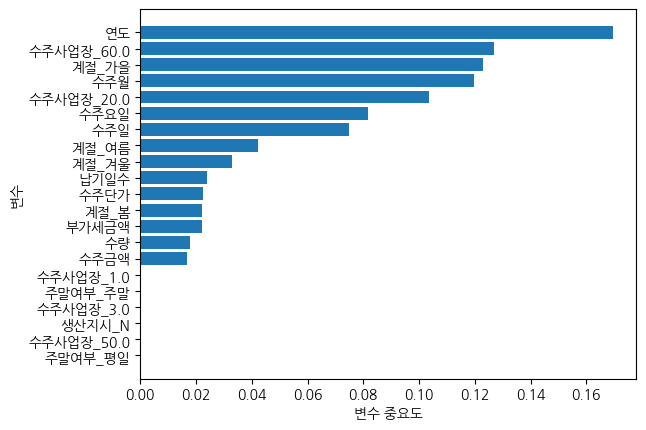

In [175]:
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

Text(0, 0.5, '변수')

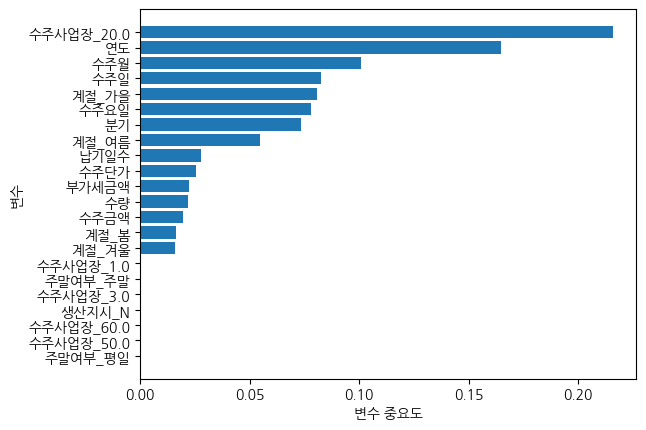

In [155]:
# # 중요도가 높은 변수를 상위에 그림. //최종아님.
# df_importance.sort_values("Importance", ascending=True, inplace = True)
# coordinates = range(len(df_importance))
# plt.barh(y = coordinates, width = df_importance["Importance"])
# plt.yticks(coordinates, df_importance["Feature"])
# plt.xlabel("변수 중요도")
# plt.ylabel("변수")

In [157]:
# print("Score on training set: {:.3f}".format(xgb_model.score(X_train, y_train)))
# # Test 데이터 설명력
# print("Score on test set: {:.3f}".format(xgb_model.score(X_test, y_test)))

Score on training set: 1.000
Score on test set: 0.997


###################################################################################
-------

In [140]:


# # LabelEncoder를 사용하여 'N'을 0으로, 'Y'를 1로 변환
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# # 종속 변수와 독립 변수 데이터 추출
# y_train = df_train['출하완료여부']  # 종속 변수
# X_train = df_train.drop(columns=['거래처코드','출하완료여부', '수주일자','수주월','품목종류', '수주일','납기일자','수주일련번호','수주품목코드'])

# # 판다스의 get_dummies 함수를 사용하여 범주형 변수를 더미 변수로 변환
# X_train_encoded = pd.get_dummies(X_train,columns=['수주사업장', '그룹_수주품목코드', '생산지시', '계절','주말여부', '납기일수_구간'])


In [141]:
# XGBoost 모델 생성
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=1234)

# 모델 학습
xgb_model.fit(X_train_encoded, y_train_encoded)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...)

In [144]:
# feature_importances_: 설명변수의 중요도
v_feature_name = X_train_encoded.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = xgb_model.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,연도,0.193
9,수주사업장_20.0,0.146
15,계절_겨울,0.109
14,계절_가을,0.101
17,계절_여름,0.092
7,수주요일,0.081
6,분기,0.048
24,납기일수_구간_4일 이하,0.039
0,수주단가,0.034
2,부가세금액,0.033


Text(0, 0.5, '변수')

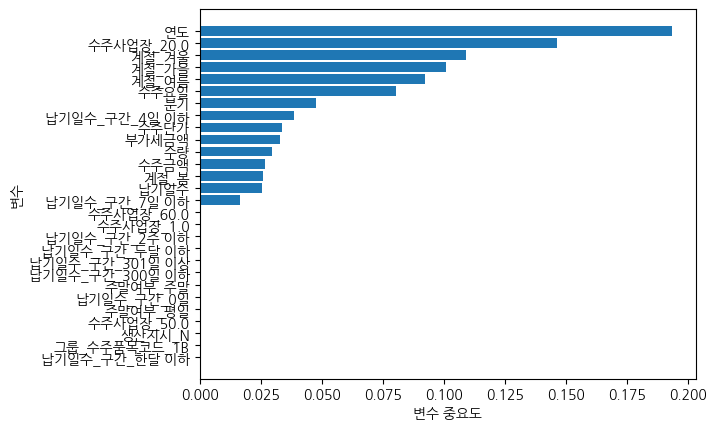

In [145]:
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [143]:

# # 종속 변수와 독립 변수 데이터 추출
# y_test = df_test['출하완료여부']  # 종속 변수
# X_test = df_test.drop(columns=['거래처코드','출하완료여부', '수주일자','수주월','품목종류', '수주일','납기일자','수주일련번호','수주품목코드'])
# X_test_encoded = pd.get_dummies(X_test, columns=['수주사업장', '그룹_수주품목코드', '생산지시', '계절','주말여부', '납기일수_구간'])

# # LabelEncoder를 사용하여 테스트 데이터의 'N'을 0으로, 'Y'를 1로 변환
# y_test_encoded = label_encoder.transform(y_test)

# # 예측
# y_pred = xgb_model.predict(X_test_encoded)

# # 정확도 평가
# accuracy = accuracy_score(y_test_encoded, y_pred)
# print("Accuracy:", accuracy)

ValueError: feature_names mismatch: ['수주단가', '수주금액', '부가세금액', '납기일수', '수량', '연도', '분기', '수주요일', '수주사업장_1.0', '수주사업장_20.0', '수주사업장_50.0', '수주사업장_60.0', '그룹_수주품목코드_1B', '생산지시_N', '계절_가을', '계절_겨울', '계절_봄', '계절_여름', '주말여부_주말', '주말여부_평일', '납기일수_구간_0일', '납기일수_구간_2주 이하', '납기일수_구간_300일 이하', '납기일수_구간_301일 이상', '납기일수_구간_4일 이하', '납기일수_구간_7일 이하', '납기일수_구간_두달 이하', '납기일수_구간_한달 이하'] ['수주단가', '수주금액', '부가세금액', '납기일수', '수량', '연도', '분기', '수주요일', '수주사업장_1.0', '수주사업장_3.0', '수주사업장_20.0', '수주사업장_50.0', '수주사업장_60.0', '그룹_수주품목코드_1B', '생산지시_N', '계절_가을', '계절_겨울', '계절_봄', '계절_여름', '주말여부_주말', '주말여부_평일', '납기일수_구간_0일', '납기일수_구간_2주 이하', '납기일수_구간_300일 이하', '납기일수_구간_301일 이상', '납기일수_구간_4일 이하', '납기일수_구간_7일 이하', '납기일수_구간_두달 이하', '납기일수_구간_한달 이하']
training data did not have the following fields: 수주사업장_3.0

In [85]:
# b_rice['납기일수_구간'].head()

0     4일 이하
16    4일 이하
17    4일 이하
21    4일 이하
22    4일 이하
Name: 납기일수_구간, dtype: object

In [86]:
print(b_rice.columns)

Index(['수주사업장', '수주일자', '수주일련번호', '거래처코드', '수주품목코드', '수주단가', '수주금액', '부가세금액',
       '출하완료여부', '납기일자', '생산지시', '납기일수', '그룹_수주품목코드', '품목종류', '납기일수_구간', '수량',
       '연도', '분기', '수주월', '수주일', '수주요일', '계절', '주말여부'],
      dtype='object')


In [87]:
# # 설명변수와 반응변수를 나누어 준비
# y, X = dmatrices("""출하완료여부 ~ C(거래처코드) + C(수주사업장) + C(그룹_수주품목코드) + 수주단가 + 수주금액  + C(생산지시)+ 납기일수 + C(계절)+C(납기일수_구간)""", df_train, return_type='dataframe')

# # VIF 계산
# vif = pd.DataFrame()
# vif["Variable"] = X.columns
# vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(vif)


In [88]:
# # from_formula 함수를 이용하여 변수 역할 지정
# #작업장코드 없애고, 실링온도 없애겠음 (다중공선성 너무 커용)
# #계절 뺌. 쿠킹온도
# log_model = Logit.from_formula("""오류발생여부 ~ 충전실온도  + C(품목코드_n)   + 쿠킹스팀압력 + 
#                     실링압력 + 생산시간""", df_train)
# # 적합
# log_result = log_model.fit()

# # 결과 출력
# print(log_result.summary())

In [89]:
print(df_train.columns)

Index(['수주사업장', '수주일자', '수주일련번호', '거래처코드', '수주품목코드', '수주단가', '수주금액', '부가세금액',
       '출하완료여부', '납기일자', '생산지시', '납기일수', '그룹_수주품목코드', '품목종류', '납기일수_구간', '수량',
       '연도', '분기', '수주월', '수주일', '수주요일', '계절', '주말여부'],
      dtype='object')


In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62133 entries, 38769 to 451278
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   수주사업장      62133 non-null  float64       
 1   수주일자       62133 non-null  datetime64[ns]
 2   수주일련번호     62133 non-null  int64         
 3   거래처코드      62133 non-null  object        
 4   수주품목코드     62133 non-null  object        
 5   수주단가       62133 non-null  float64       
 6   수주금액       62133 non-null  float64       
 7   부가세금액      62133 non-null  int64         
 8   출하완료여부     62133 non-null  object        
 9   납기일자       62133 non-null  datetime64[ns]
 10  생산지시       62133 non-null  object        
 11  납기일수       62133 non-null  int64         
 12  그룹_수주품목코드  62133 non-null  object        
 13  품목종류       62133 non-null  object        
 14  납기일수_구간    62133 non-null  object        
 15  수량         62133 non-null  float64       
 16  연도         62133 non-null  int64   

In [90]:
# X_train.columns

In [115]:
df_train['출하완료여부_binary'] = df_train['출하완료여부'].apply(lambda x: 1 if x == '완료' else 0)

log_model = Logit.from_formula("""출하완료여부_binary ~ C(품목종류) +C(그룹_수주품목코드) +C(생산지시) +C(계절) +C(주말여부) + 
                    C(납기일수_구간) +  수주단가+수량 """, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarni

         Current function value: 0.000000
         Iterations: 35


/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarni

                           Logit Regression Results                           
Dep. Variable:          출하완료여부_binary   No. Observations:                62133
Model:                          Logit   Df Residuals:                    62119
Method:                           MLE   Df Model:                           13
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                     inf
Time:                        03:52:53   Log-Likelihood:            -1.4318e-09
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -23.9179   3.86e+05   -6.2e-05      1.000   -7.57e+05    7.57e+05
C(계절)[T.겨울]              -1.2241   8.74e+04   -1.4e-05      1.000   -1.71e+05    1.71e+05
C(계절)[T.

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# 종속 변수와 독립 변수 생성
# y, X = dmatrices("""C(출하완료여부) ~ C(거래처코드) + C(수주사업장) + C(그룹_수주품목코드) + 수주단가 + 수주금액  + C(생산지시)+ 납기일수 + C(계절)+C(납기일수_구간)""", df_train, return_type='dataframe')

# 종속 변수와 독립 변수 데이터 추출
y_train = df_train['출하완료여부']  # 종속 변수
X_train = df_train.drop(columns=['출하완료여부', '수주일자','수주월', '수주일','납기일자','수주일련번호','수주품목코드'])

# 판다스의 get_dummies 함수를 사용하여 범주형 변수를 더미 변수로 변환
X_train_encoded = pd.get_dummies(X_train, columns=[ '수주사업장','품목종류', '그룹_수주품목코드', '생산지시', '계절','주말여부', '납기일수_구간'])

# 변환된 데이터 확인
print(X_train_encoded.head())



          수주단가       수주금액   부가세금액  납기일수      수량    연도  분기  수주요일  거래처코드_IA0103  \
38769   5850.0  7394400.0  739440     2  1390.4  2019   2     2             0   
300699  1480.0    80728.0    8072     2    60.0  2020   4     6             0   
296192  1400.0    76364.0    7636     4    60.0  2020   3     5             0   
714462  1230.0    33546.0    3354     5    30.0  2023   1     0             0   
756716  6000.0  1944000.0  108000     1   342.0  2023   1     2             0   

        거래처코드_IA1406  ...  주말여부_주말  주말여부_평일  납기일수_구간_0일  납기일수_구간_2주 이하  \
38769              0  ...        0        1           0              0   
300699             0  ...        1        0           0              0   
296192             0  ...        1        0           0              0   
714462             0  ...        0        1           0              0   
756716             0  ...        0        1           0              0   

        납기일수_구간_300일 이하  납기일수_구간_301일 이상  납기일수_구간_4일 이하  납기일수_구간_7일 

In [109]:
# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()

# 모델 학습
logistic_model.fit(X_train_encoded, y_train)


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [111]:
# 계수(coefficient) 확인
print("Coefficients:", logistic_model.coef_)

# 절편(intercept) 확인
print("Intercept:", logistic_model.intercept_)

Coefficients: [[-9.11003723e-05 -4.88217068e-08  3.83991261e-07  3.55152243e-06
   8.71147131e-06  2.85193991e-03  3.81651328e-06  5.03440240e-06
  -3.58587033e-10  7.84121730e-10  2.95496138e-10  4.22567299e-10
  -2.95582698e-11 -1.46824521e-08  5.57246004e-10  2.61802525e-10
   2.54220243e-10 -5.30760292e-11  3.64540577e-10 -7.64683354e-10
  -1.16851410e-08 -1.06694309e-06  7.60543230e-09 -4.74070196e-09
  -6.43393922e-08 -5.40745726e-09  3.66472900e-09  1.43404528e-11
  -8.19608717e-10 -4.29187154e-10  6.33223570e-10  1.25561774e-10
  -6.67506922e-11  9.70418393e-10  7.71093404e-10  3.76971733e-11
   1.40188477e-09  4.31281693e-10  1.54168091e-09  1.56557796e-10
  -2.30626196e-10  8.65286296e-08 -3.55056843e-10  3.66234488e-09
   2.37080821e-07  2.78604866e-10  2.90416138e-09  3.39916657e-09
  -4.62021637e-11  2.00353182e-10 -3.97244299e-09  5.56368084e-09
   2.00796355e-09 -2.70150490e-08 -4.82176171e-09  1.50004809e-09
   8.36082402e-10  1.31682462e-10  2.84134593e-08  2.14198870e

In [104]:
# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 규제 강도
    'penalty': ['l1', 'l2'],  # 규제 유형
    'solver': ['liblinear'],  # 최적화 알고리즘
    'max_iter': [100, 200, 300]  # 반복 횟수
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')

# 그리드 서치 수행
grid_search.fit(X_train_encoded, y_train)

# 최적의 하이퍼파라미터 및 평가 점수 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinea

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.995928091290866


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [108]:
# 테스트 데이터에 대한 더미 변수로 변환
X_test_encoded = pd.get_dummies(df_test.drop(columns=['출하완료여부', '수주일자','수주월', '수주일','납기일자','수주일련번호','수주품목코드']), 
                                 columns=['거래처코드', '수주사업장','품목종류', '그룹_수주품목코드', '생산지시', '계절','주말여부', '납기일수_구간'])

# 최적의 하이퍼파라미터를 사용하여 로지스틱 회귀 모델 생성
best_logistic_model = LogisticRegression(**grid_search.best_params_)

# 모델 학습
best_logistic_model.fit(X_train_encoded, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = best_logistic_model.predict(X_test_encoded)

# 정확도 평가
accuracy = accuracy_score(df_test['출하완료여부'], y_pred)
print("Accuracy:", accuracy)


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 거래처코드_IA9581
- 거래처코드_IA9654
- 거래처코드_IJ9282
- 거래처코드_IJ9437
- 거래처코드_IK2052
- ...
Feature names seen at fit time, yet now missing:
- 거래처코드_IA9683
- 거래처코드_IJ1667
- 거래처코드_IJ1693
- 거래처코드_IJ1748
- 거래처코드_IJ1978
- ...


# Modeling (Pipe Line)

In [178]:
b_rice.columns

Index(['수주사업장', '수주일자', '수주일련번호', '거래처코드', '수주품목코드', '수주단가', '수주금액', '부가세금액',
       '출하완료여부', '납기일자', '생산지시', '납기일수', '그룹_수주품목코드', '품목종류', '납기일수_구간', '수량',
       '연도', '분기', '수주월', '수주일', '수주요일', '계절', '주말여부'],
      dtype='object')

In [179]:
Y = b_rice['출하완료여부']
X = b_rice[['수주단가', '수주금액', '부가세금액','생산지시', '납기일수', '품목종류', '수량',
             '연도', '분기', '수주월', '수주일', '수주요일', '계절', '주말여부']]

In [223]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline # 특성공학(결측값 처리 + 스케일링 ...) + 학습 
from sklearn.impute import SimpleImputer # 숫자 -> 중앙값 / 문자 -> 최빈값 
from sklearn.preprocessing import MinMaxScaler # 숫자 데이터 스케일링 
from sklearn.preprocessing import OneHotEncoder #문자 인코딩 
from sklearn.compose import make_column_transformer # 숫자는 숫자끼리 문자는 문자끼리 처리 
from sklearn.linear_model import LogisticRegression #  학습 알고리즘
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTETomek

In [224]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3,random_state=1234)

In [225]:
# 숫자와 문자를 구분 짓는 리스트를 형성 
numeric_list  = X.describe().columns
category_list = X.describe(include='object').columns

In [226]:
# 숫자가 처리되는 파이프라인 구성 
numeric_pipe = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler())
# 문자가 처리되는 파이프라인 구성 
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [227]:
#숫자와 문자를 구분해 처리 
prepro_pipe = make_column_transformer( (numeric_pipe, numeric_list) , (category_pipe, category_list) )
model_pipe = make_pipeline(prepro_pipe , SMOTETomek() ,LogisticRegression())

In [ ]:
# 하이퍼파라미터 튜닝 + 교차검증
hyper_list = {'logisticregression__C':[0.5, 1.0, 1.5]}

grid_model = GridSearchCV(model_pipe, param_grid=hyper_list, cv=3, scoring='f1')
grid_model.fit(X_train, Y_train)

In [ ]:
best_model = grid_model.best_estimator_

In [ ]:
df_coef = pd.DataFrame()
df_coef['Coef'] = best_model['logisticregression'].coef_[0]

In [ ]:
df_coef['Feature'] = best_model['columntransformer'].get_feature_names_out()

In [ ]:
import plotly.express as px 

In [ ]:
px.bar(df_coef, y='Feature', x='Coef')

In [ ]:
import pickle

In [ ]:
pickle.dump(best_model, open('model.sav','wb'))

In [ ]:
pickle.load(open('model.sav','rb'))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [ ]:
print(classification_report(Y_train, Y_train_pred))

In [ ]:
print(classification_report(Y_test, Y_test_pred))